In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from scipy.stats import kurtosis, skew  

# Read the data
BASE_DIR = Path(os.getcwd()).parents[2]
FILE_PATH = BASE_DIR / "backend/data/Cleaned/gas_automated_meter_cleaned.csv"
gas_df = pd.read_csv(FILE_PATH)

# Melt the dataframe and convert to datetime
melted_df = gas_df.melt(id_vars=['meter_description'], 
                        var_name='month', 
                        value_name='consumption')

# Convert month column to datetime
melted_df['month'] = melted_df['month'].apply(lambda x: pd.to_datetime(x.replace('_', ' ') + ' 01'))

# Sort by meter and date
melted_df = melted_df.sort_values(['meter_description', 'month'])

# Calculate statistics by meter using scipy.stats functions
meter_stats = melted_df.groupby('meter_description')['consumption'].agg([
 'mean', 'std', 'min', 'max' ,
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75),
    lambda x: skew(x),  
    lambda x: kurtosis(x)  
]).round(2)

meter_stats.columns = [ 'mean', 'std', 'min',  'max', 'q25', 'q75', 'skewness', 'kurtosis']
print("\nDescriptive Statistics by Meter:")
print(meter_stats)


Descriptive Statistics by Meter:
                                                         mean       std  \
meter_description                                                         
56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH       336.44    155.18   
AQUINAS 74 GLADSTONE ROAD,DUNEDIN                     9472.96   6307.64   
ARANA 110 CLYDE STREET,DUNEDIN                        8978.24   3735.35   
CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN            6158.93   7804.65   
DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUNEDIN    4574.15   9083.68   
E213,PARKER BUILDING,344 GREAT KING                   7139.70   2613.17   
ECCLES GREAT KING STREET,UNIVERSITY OF              301592.60  68556.15   
G601,UNIVERSITY COLLEGE (KITCHEN),315 LEITH            776.53    446.69   
MARSH STUDY CENTRE,CASTLE STREET,DUNEDIN               156.95    248.45   
PHYSIO BUILDING, 325 GREAT KING ST                     681.26   1078.05   

                                                          min    

/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_94579/1774692037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=eccles_reading, x='meter_description', y='consumption',


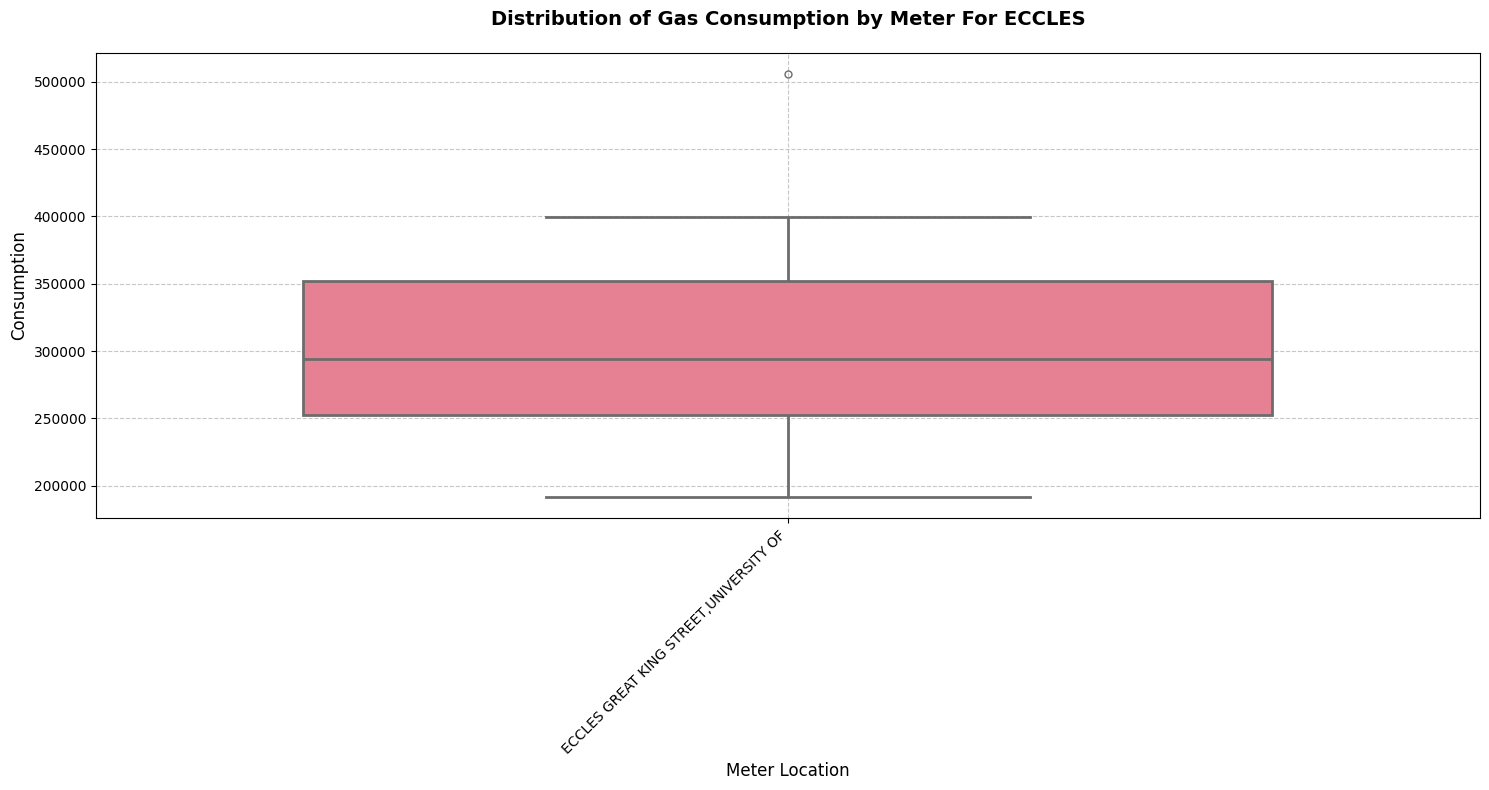

In [181]:
eccles_reading = melted_df[melted_df['meter_description'] == 'ECCLES GREAT KING STREET,UNIVERSITY OF']

plt.figure(figsize=(15, 8))
sns.boxplot(data=eccles_reading, x='meter_description', y='consumption',
            width=0.7,
            linewidth=2,
            fliersize=5,
            palette='husl')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Gas Consumption by Meter For ECCLES', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Meter Location', fontsize=12)
plt.ylabel('Consumption', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_94579/1070634773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gas_reading_f, x='meter_description', y='consumption',


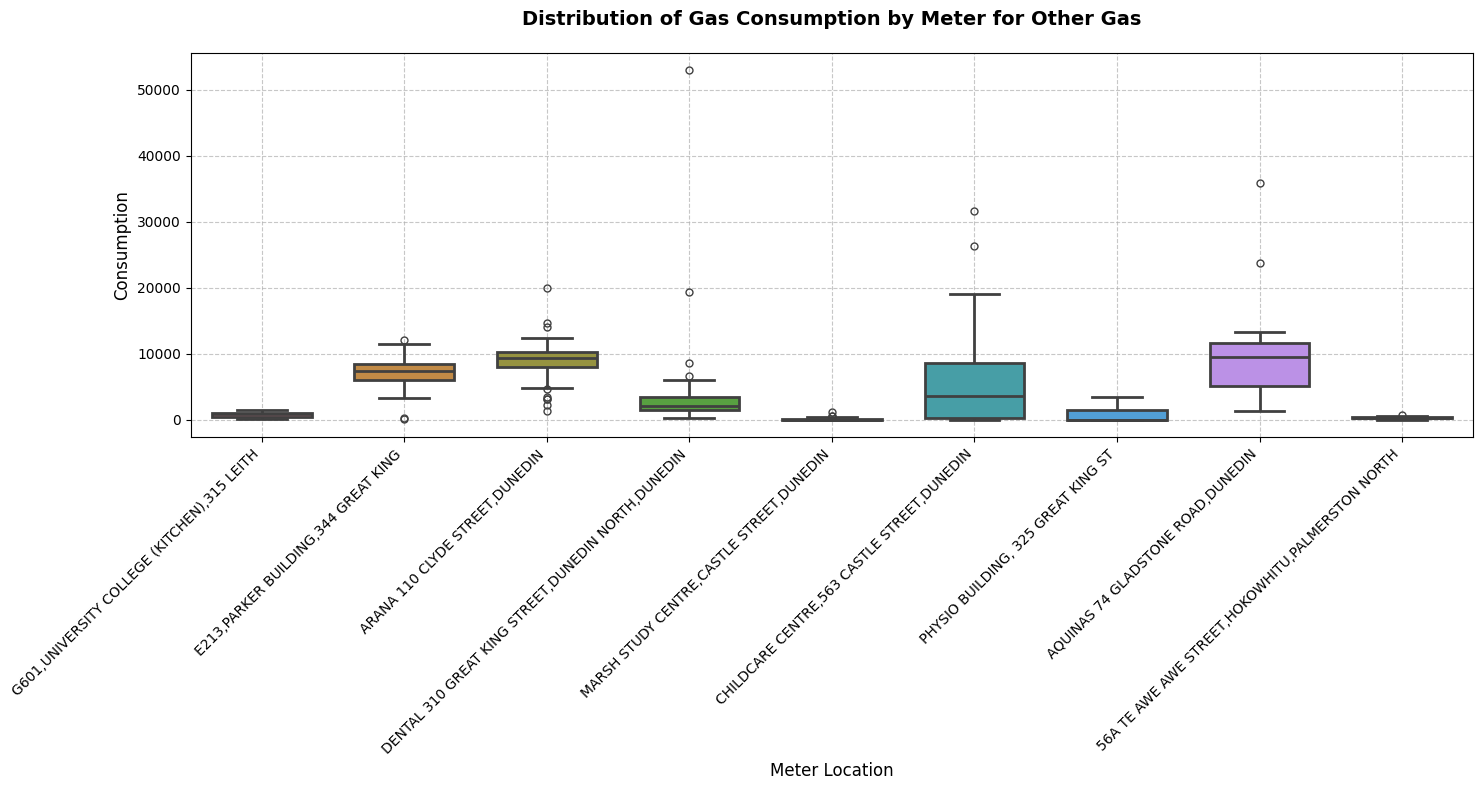

In [182]:
gas_reading_f  = melted_df[melted_df['meter_description'] != 'ECCLES GREAT KING STREET,UNIVERSITY OF']


plt.figure(figsize=(15, 8))
sns.boxplot(data=gas_reading_f, x='meter_description', y='consumption',
            width=0.7,
            linewidth=2,
            fliersize=5,
            palette='husl')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Gas Consumption by Meter for Other Gas', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Meter Location', fontsize=12)
plt.ylabel('Consumption', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

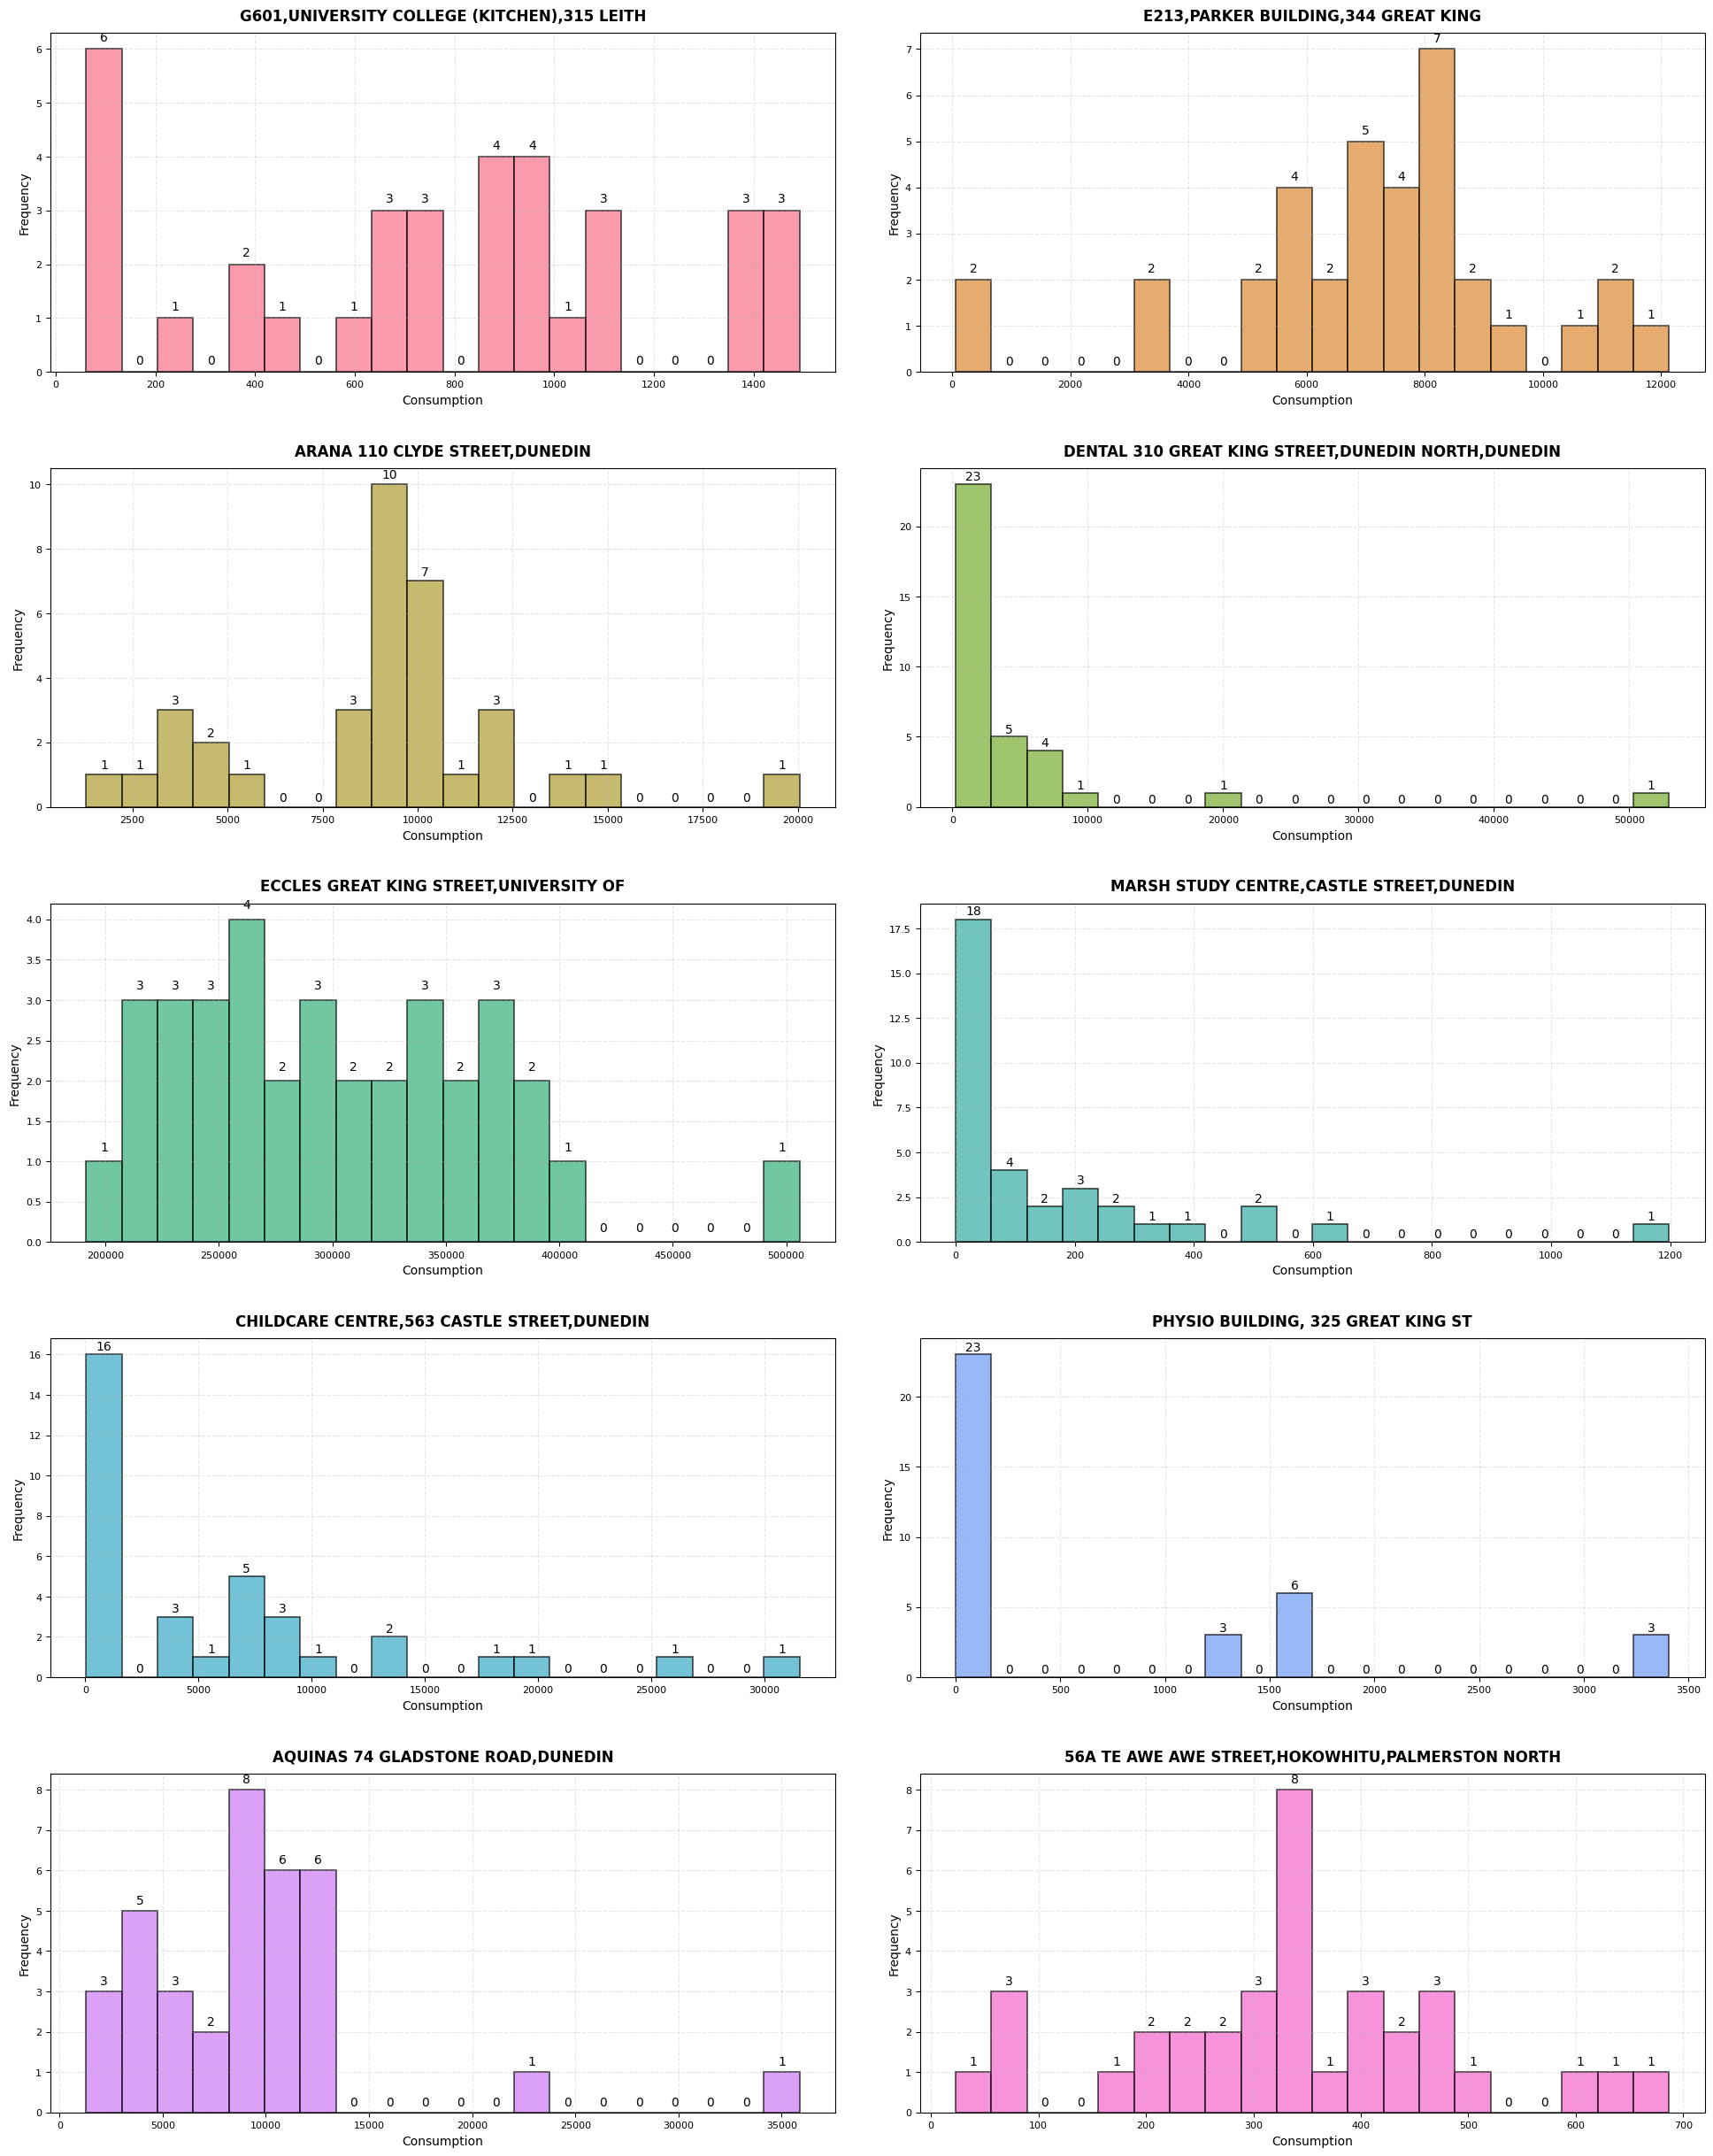

In [183]:
# Improved Histograms with 5x2 subplot layout
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.ravel()

colors = sns.color_palette('husl', n_colors=10)

for idx, meter in enumerate(gas_df['meter_description'].unique()):
    meter_data = melted_df[melted_df['meter_description'] == meter]['consumption']
    
    # Create histogram with clear borders and colors
    n, bins, patches = axes[idx].hist(meter_data, bins=20,
                                    edgecolor='black',
                                    linewidth=1.2,
                                    color=colors[idx],
                                    alpha=0.7)
    
    # Add frequency labels on top of each bar
    for i in range(len(patches)):
        height = patches[i].get_height()
        axes[idx].text(patches[i].get_x() + patches[i].get_width()/2.,
                      height +0.1,
                      f'{int(height)}',
                      ha='center',
                      va='bottom',
                      fontsize=10)
    
    axes[idx].set_title(f'{meter}', fontsize=12, pad=10, fontweight='bold')
    axes[idx].set_xlabel('Consumption', fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(True, linestyle='--', alpha=0.3)
    axes[idx].tick_params(labelsize=8)

plt.tight_layout(pad=3.0)
plt.show()


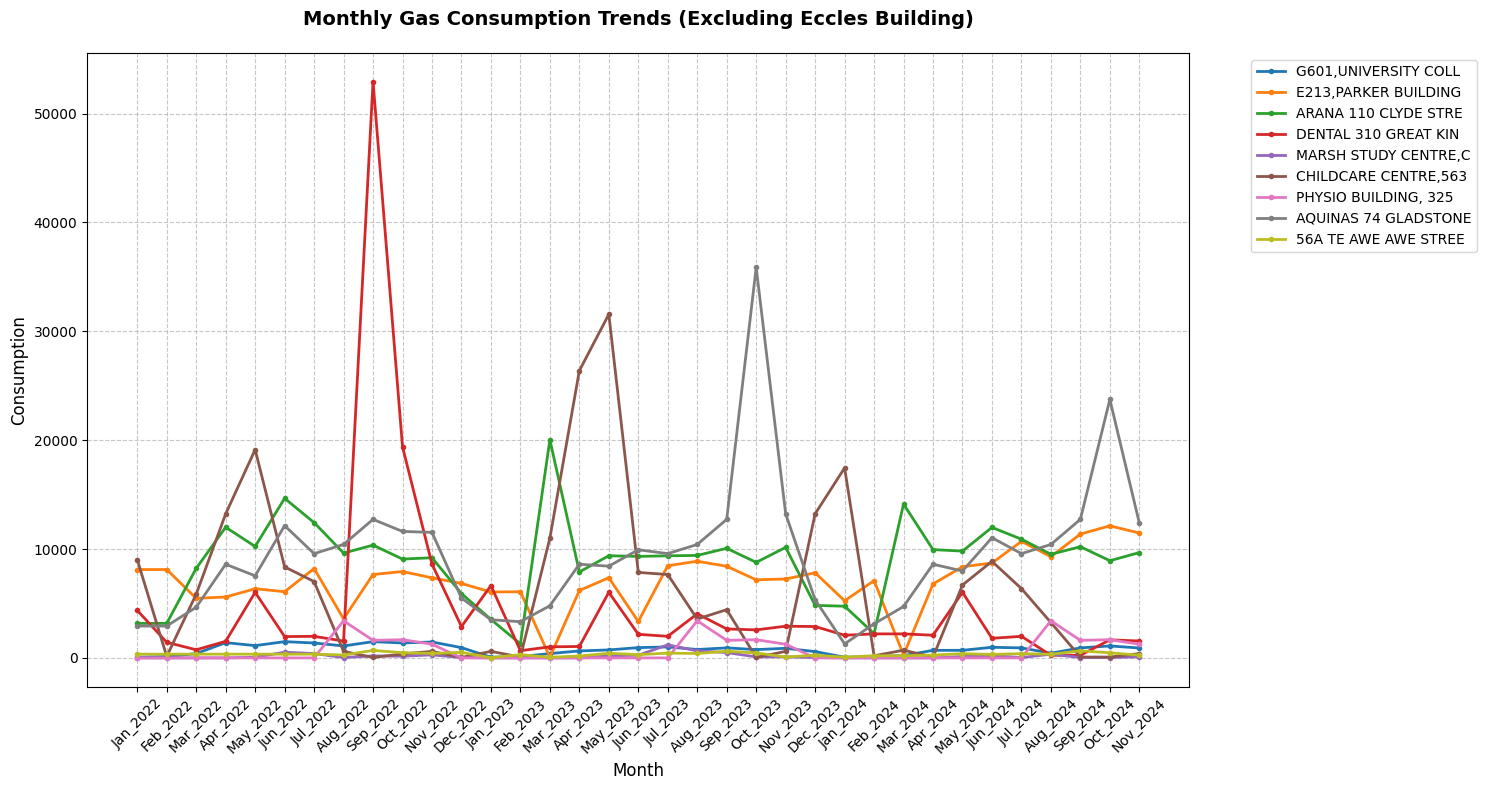

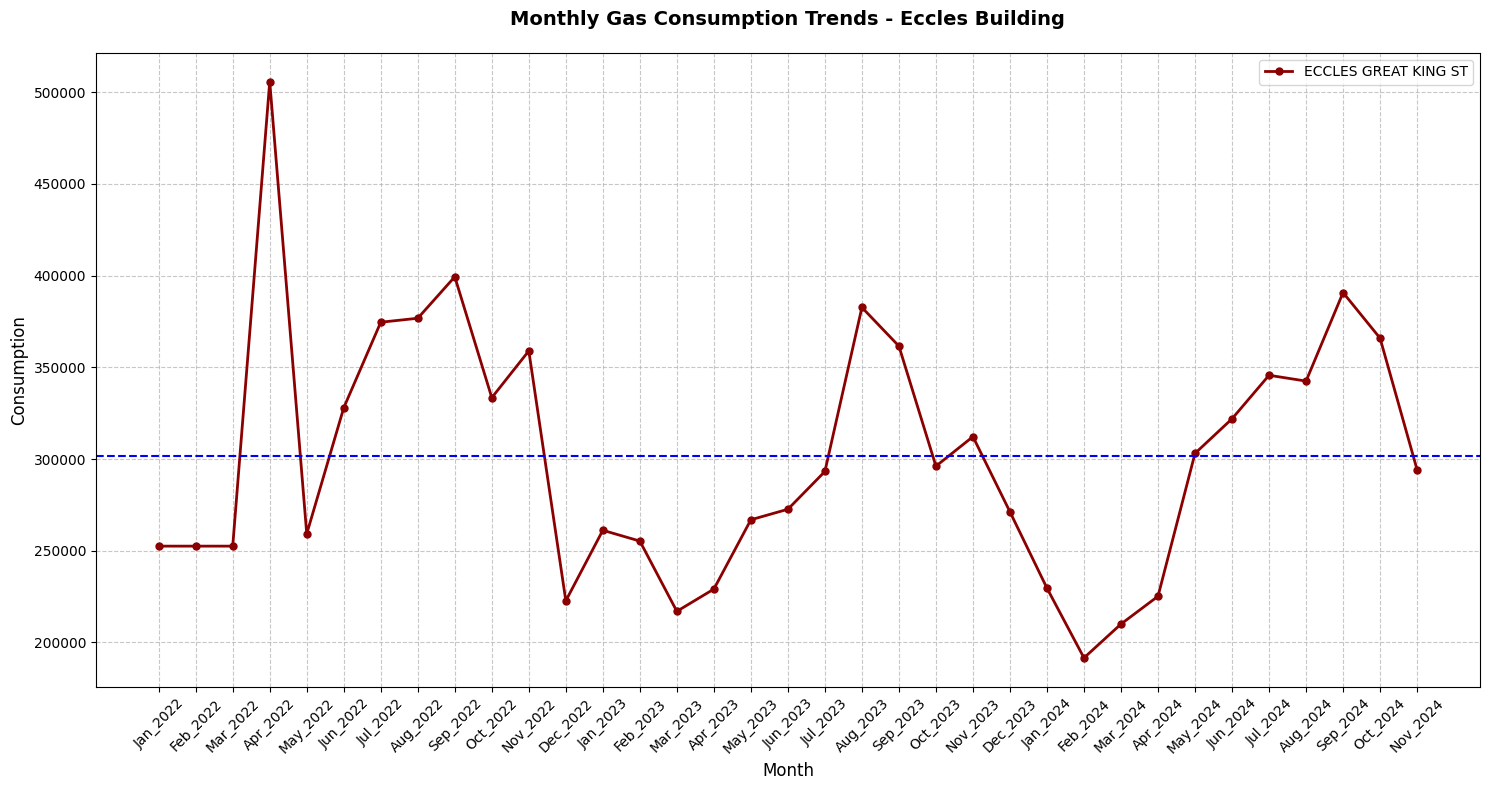


Key Insights:
1. Highest average consumption: ECCLES GREAT KING STREET,UNIVERSITY OF
2. Most variable consumption (highest std): ECCLES GREAT KING STREET,UNIVERSITY OF


In [184]:
# Create the plot
plt.figure(figsize=(15, 8))
for meter in gas_reading_f['meter_description'].unique():
    plt.plot(gas_df.columns[1:], 
             gas_df[gas_df['meter_description'] == meter].iloc[:, 1:].values.flatten(), 
             label=meter[:20],
             linewidth=2,
             marker='o',
             markersize=3)

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Monthly Gas Consumption Trends (Excluding Eccles Building)', 
         pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Consumption', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create plot for Eccles building only
plt.figure(figsize=(15, 8))
plt.plot(gas_df.columns[1:], 
         gas_df[gas_df['meter_description'] == 'ECCLES GREAT KING STREET,UNIVERSITY OF'].iloc[:, 1:].values.flatten(), 
         label='ECCLES GREAT KING ST',
         linewidth=2,
         marker='o',
         markersize=5,
         color='darkred')  # Using distinct color for visibility

plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.title('Monthly Gas Consumption Trends - Eccles Building', 
         pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Consumption', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add mean line for reference
mean_consumption = gas_df[gas_df['meter_description'] == 'ECCLES GREAT KING STREET,UNIVERSITY OF'].iloc[:, 1:].mean().mean()
plt.axhline(y=mean_consumption, color='blue', linestyle='--', label='Mean Consumption')

plt.tight_layout()
plt.show()

# Print summary insights
print("\nKey Insights:")
print(f"1. Highest average consumption: {meter_stats['mean'].idxmax()}")
print(f"2. Most variable consumption (highest std): {meter_stats['std'].idxmax()}")

/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_94579/2035708945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas_reading_f['month'] = pd.to_datetime(gas_reading_f['month']).dt.strftime('%b')  # Convert to month abbreviation
/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_94579/2035708945.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=meter_data,
/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_94579/2035708945.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

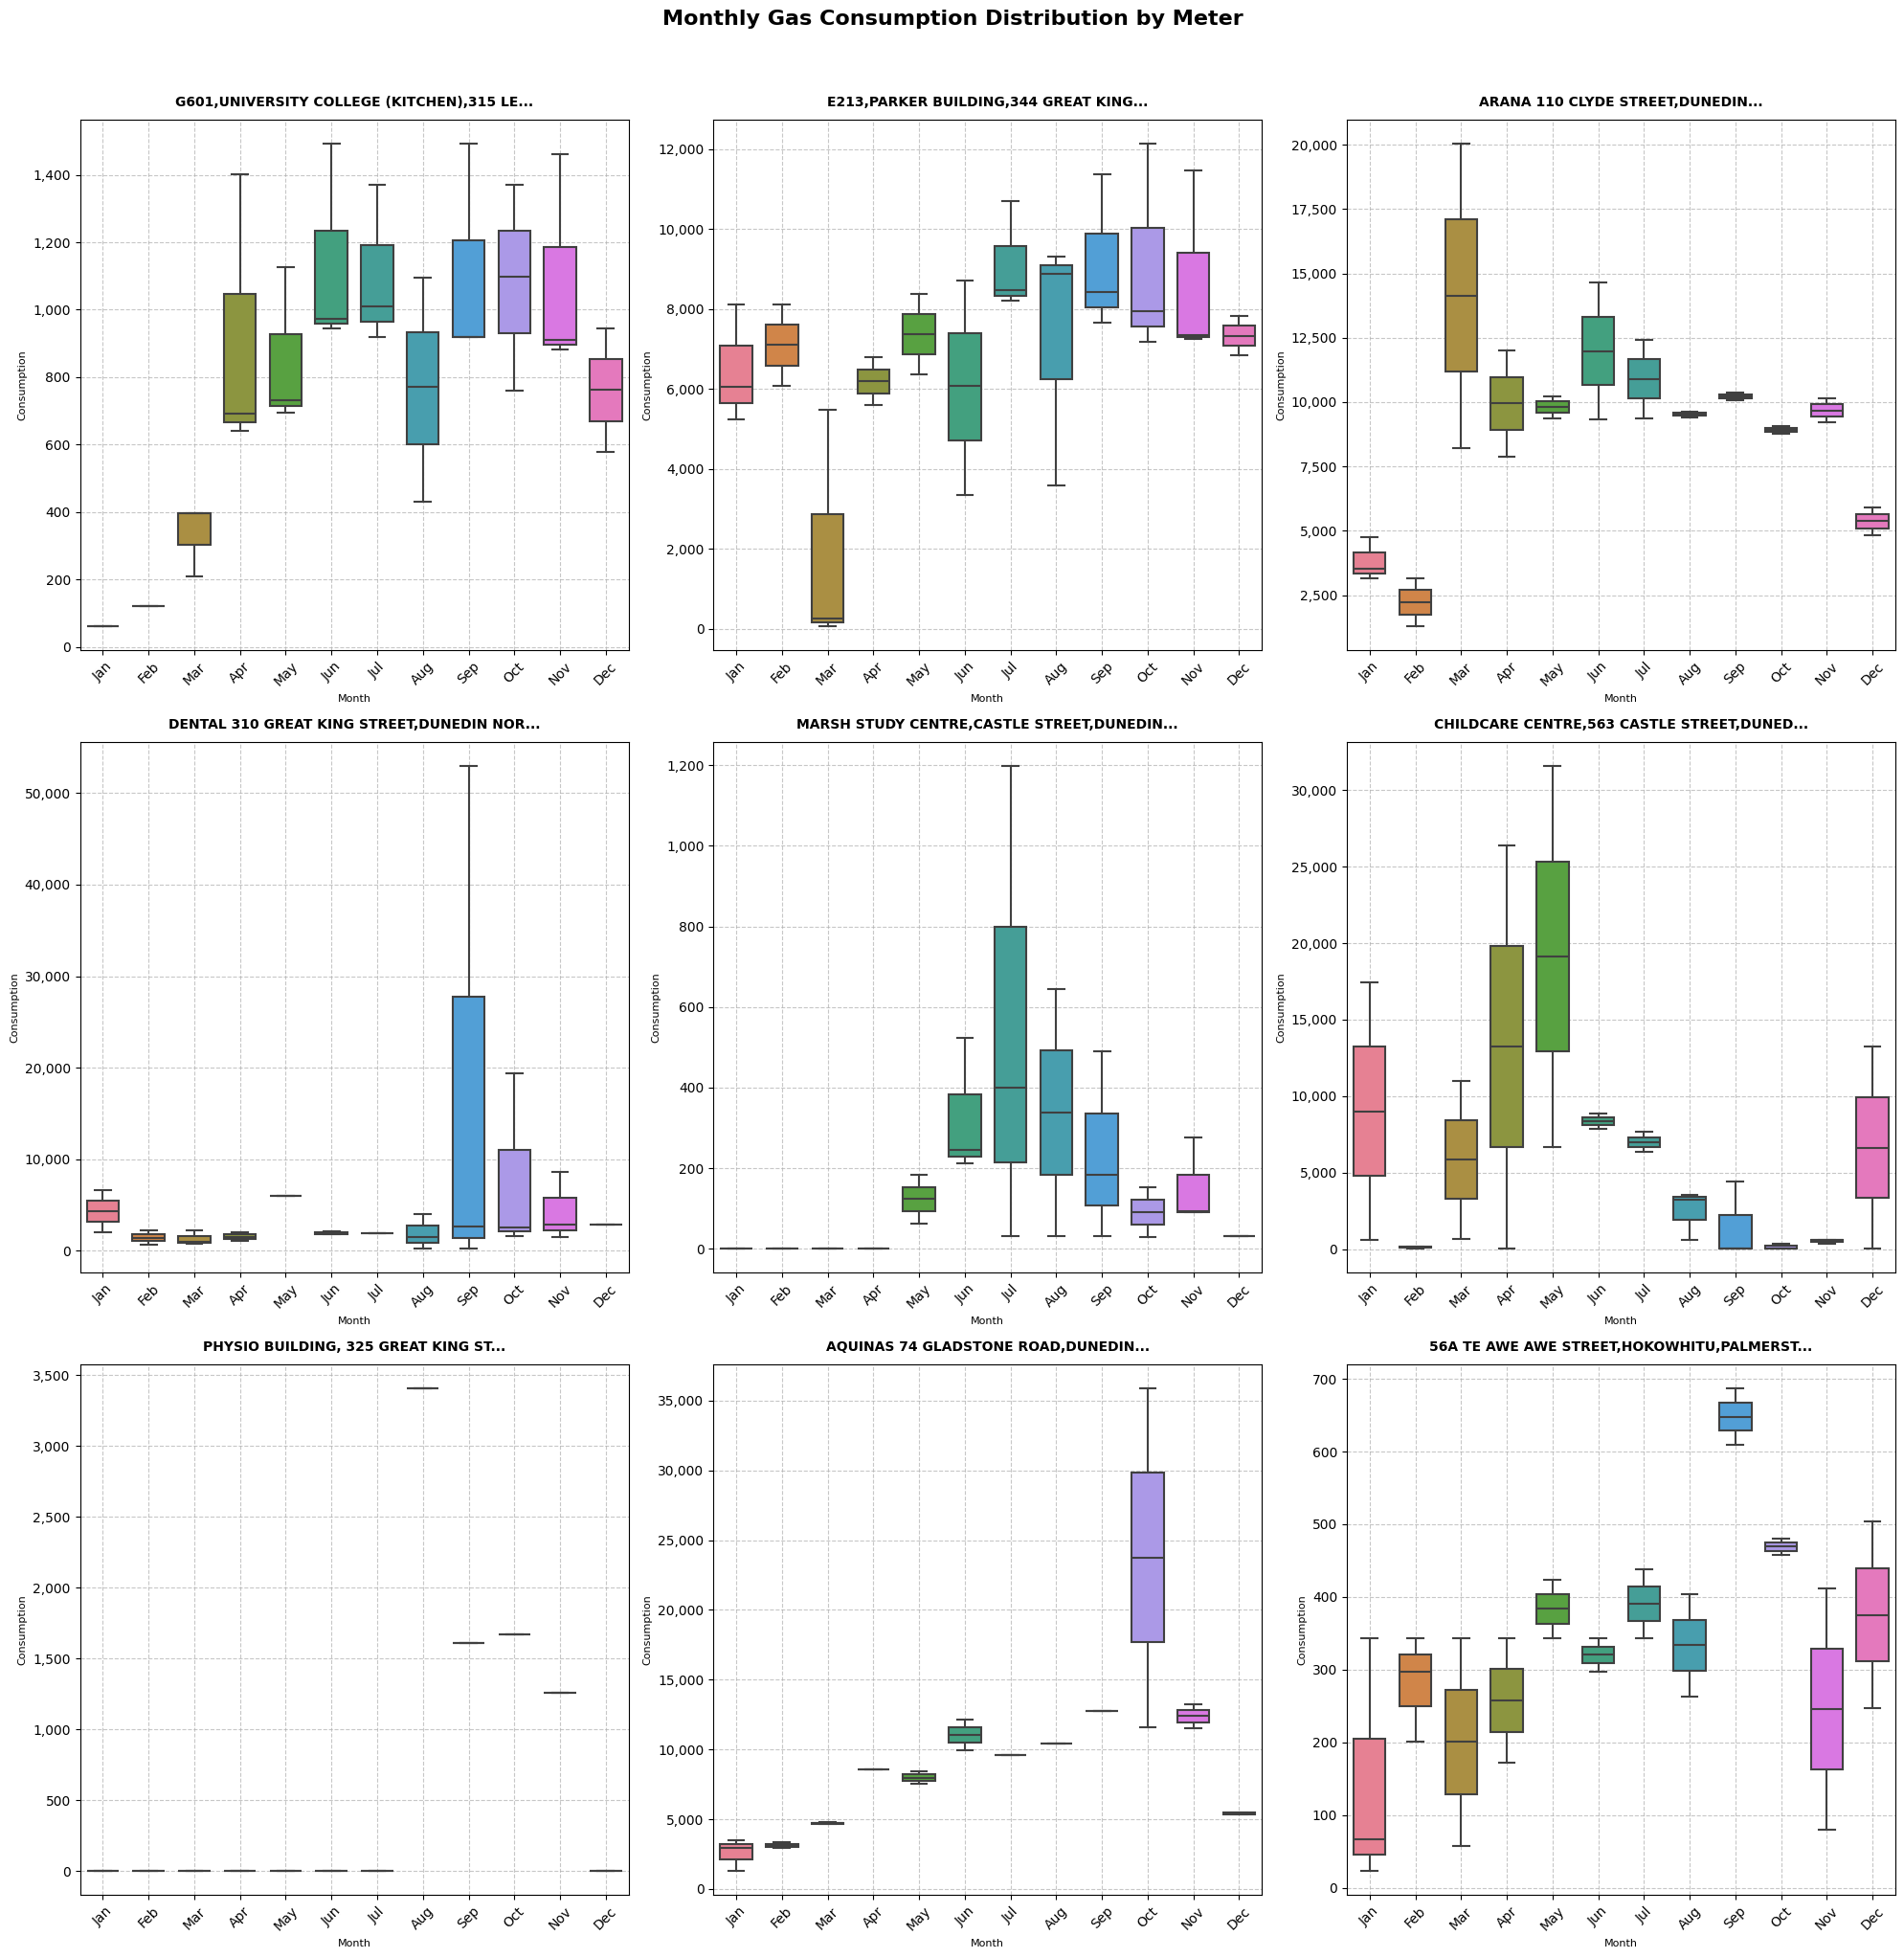

In [185]:
# First, let's create a month column from the date
gas_reading_f['month'] = pd.to_datetime(gas_reading_f['month']).dt.strftime('%b')  # Convert to month abbreviation

# Create subplots for each meter
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

# List of meters (excluding Eccles)
meters = gas_reading_f['meter_description'].unique()

# Create box plot for each meter
for idx, meter in enumerate(meters):
    meter_data = gas_reading_f[gas_reading_f['meter_description'] == meter]
    
    sns.boxplot(data=meter_data, 
                x='month', 
                y='consumption',
                ax=axes[idx],
                palette='husl',
                width=0.7,
                linewidth=1.5)
    
    # Customize each subplot
    axes[idx].set_title(f'{meter[:40]}...', fontsize=10, pad=10, fontweight='bold')
    axes[idx].set_xlabel('Month', fontsize=8)
    axes[idx].set_ylabel('Consumption', fontsize=8)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, linestyle='--', alpha=0.7)
    
    # Format y-axis for better readability
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.suptitle('Monthly Gas Consumption Distribution by Meter', 
             fontsize=16, 
             fontweight='bold', 
             y=1.02)

plt.tight_layout()
plt.show()


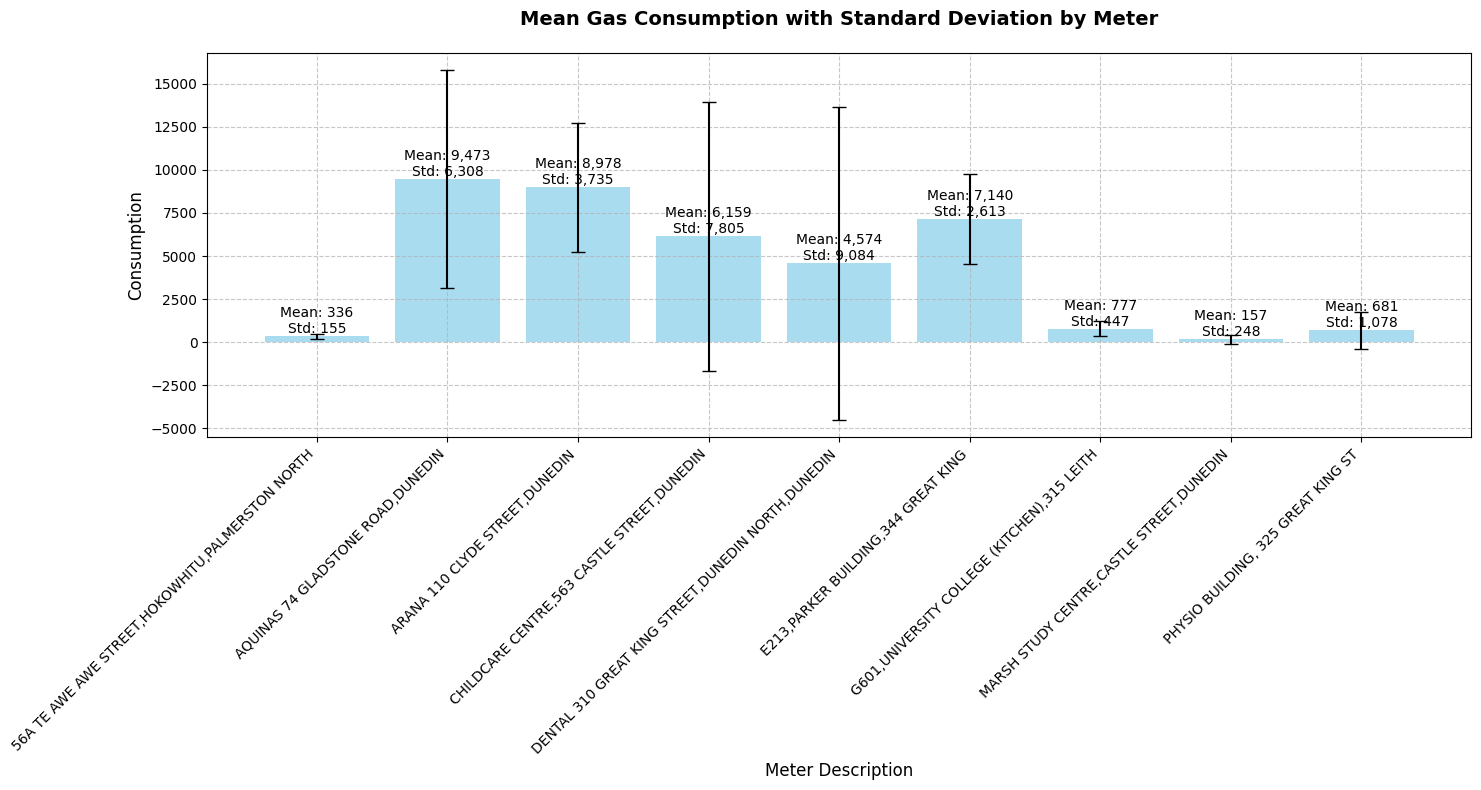

In [175]:
gas_new_df = pd.read_csv(FILE_PATH)
gas_new_df = gas_new_df[gas_new_df['meter_description'] != 'ECCLES GREAT KING STREET,UNIVERSITY OF']

melted_new_df = gas_new_df.melt(id_vars=['meter_description'], 
                        var_name='month', 
                        value_name='consumption')

melted_new_df['month'] = melted_new_df['month'].apply(lambda x: pd.to_datetime(x.replace('_', ' ') + ' 01'))

# Calculate mean and std for each meter
stats_df = melted_new_df.groupby('meter_description').agg({
    'consumption': ['mean', 'std']
}).reset_index()
stats_df.columns = ['meter_description', 'mean', 'std']

# Create the visualization
plt.figure(figsize=(15, 8))

# Plot mean values as bars
bars = plt.bar(stats_df['meter_description'], stats_df['mean'], 
               yerr=stats_df['std'],
               capsize=5,
               color='skyblue',
               alpha=0.7)

# Customize the plot
plt.title('Mean Gas Consumption with Standard Deviation by Meter', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Meter Description', fontsize=12)
plt.ylabel('Consumption', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'Mean: {height:,.0f}\nStd: {stats_df["std"].iloc[idx]:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()





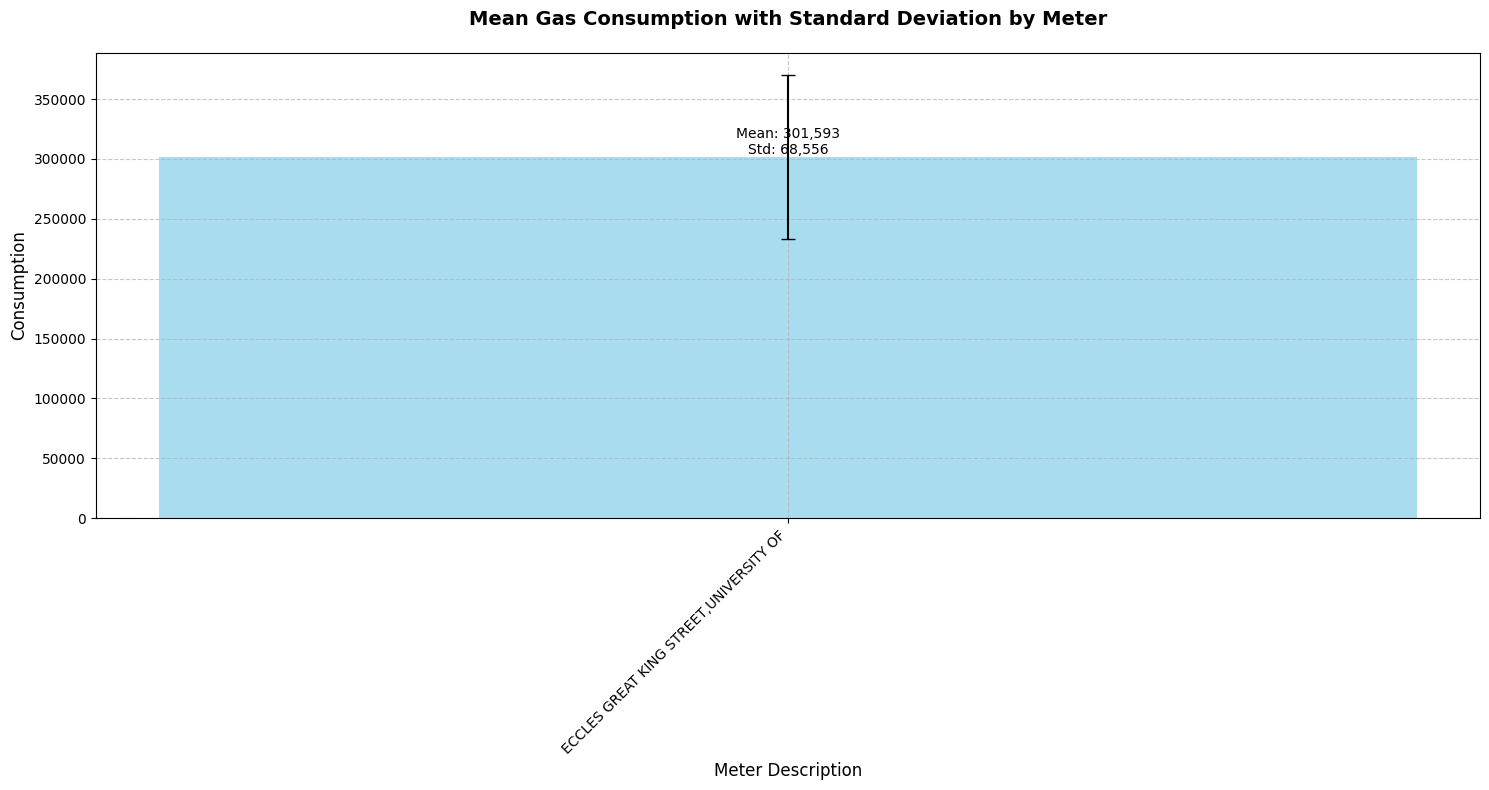

In [177]:
gas_new_df = pd.read_csv(FILE_PATH)
gas_new_df = gas_new_df[gas_new_df['meter_description'] == 'ECCLES GREAT KING STREET,UNIVERSITY OF']

melted_new_df = gas_new_df.melt(id_vars=['meter_description'], 
                        var_name='month', 
                        value_name='consumption')

melted_new_df['month'] = melted_new_df['month'].apply(lambda x: pd.to_datetime(x.replace('_', ' ') + ' 01'))

# Calculate mean and std for each meter
stats_df = melted_new_df.groupby('meter_description').agg({
    'consumption': ['mean', 'std']
}).reset_index()
stats_df.columns = ['meter_description', 'mean', 'std']

# Create the visualization
plt.figure(figsize=(15, 8))

# Plot mean values as bars
bars = plt.bar(stats_df['meter_description'], stats_df['mean'], 
               yerr=stats_df['std'],
               capsize=5,
               color='skyblue',
               alpha=0.7)

# Customize the plot
plt.title('Mean Gas Consumption with Standard Deviation by Meter', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Meter Description', fontsize=12)
plt.ylabel('Consumption', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'Mean: {height:,.0f}\nStd: {stats_df["std"].iloc[idx]:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [187]:
def find_rolling_outliers_by_meter_yearly(data):
    outliers_all = []
    
    # Process each meter separately
    for meter in data['meter_description'].unique():
        meter_data = data[data['meter_description'] == meter].copy()
        meter_data['year'] = meter_data['month'].dt.year
        
        # Calculate overall statistics for this meter
        meter_mean = meter_data['consumption'].mean()
        meter_std = meter_data['consumption'].std()
        
        # Process each year separately
        for year in meter_data['year'].unique():
            year_data = meter_data[meter_data['year'] == year].copy()
            year_data = year_data.sort_values('month')
            
            if len(year_data) >= 3:
                # Calculate rolling statistics
                rolling_mean = year_data['consumption'].rolling(window=3, min_periods=2).mean()
                
                # Calculate percentage change
                pct_change = year_data['consumption'].pct_change().abs()
                
                # Find outliers using multiple criteria
                outliers = year_data[
                    ((year_data['consumption'] > meter_mean + 2 * meter_std) | 
                     (year_data['consumption'] < meter_mean - 2 * meter_std)) &
                    (pct_change > 0.8)  # 80% change threshold
                ]
                
                # Add previous month and percentage change to outliers
                if not outliers.empty:
                    outliers['previous_month_value'] = year_data['consumption'].shift(1)
                    outliers['pct_change'] = pct_change
                    outliers_all.append(outliers)
    
    if outliers_all:
        result = pd.concat(outliers_all)
        return result[['meter_description', 'month', 'consumption', 
                      'previous_month_value', 'pct_change']].sort_values(['meter_description', 'month'])
    return pd.DataFrame(columns=['meter_description', 'month', 'consumption', 
                               'previous_month_value', 'pct_change'])




In [188]:
# Test the function
gas_df = pd.read_csv(FILE_PATH)
melted_df = gas_df.melt(id_vars=['meter_description'], 
                        var_name='month', 
                        value_name='consumption')
melted_df['month'] = melted_df['month'].apply(lambda x: pd.to_datetime(x.replace('_', ' ') + ' 01'))

# Run the analysis
outliers = find_rolling_outliers_by_meter_yearly(melted_df)
print("Outliers detected with context:")
print(outliers)


Outliers detected with context:
                                     meter_description      month  \
89    56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH 2022-09-01   
329   56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH 2024-09-01   
218                  AQUINAS 74 GLADSTONE ROAD,DUNEDIN 2023-10-01   
338                  AQUINAS 74 GLADSTONE ROAD,DUNEDIN 2024-10-01   
142                     ARANA 110 CLYDE STREET,DUNEDIN 2023-03-01   
156         CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN 2023-04-01   
83   DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUN... 2022-09-01   
141                E213,PARKER BUILDING,344 GREAT KING 2023-03-01   
261                E213,PARKER BUILDING,344 GREAT KING 2024-03-01   
34              ECCLES GREAT KING STREET,UNIVERSITY OF 2022-04-01   
185           MARSH STUDY CENTRE,CASTLE STREET,DUNEDIN 2023-07-01   
77                  PHYSIO BUILDING, 325 GREAT KING ST 2022-08-01   
197                 PHYSIO BUILDING, 325 GREAT KING ST 2023-08-01   
31

/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_94579/1749793192.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['previous_month_value'] = year_data['consumption'].shift(1)
/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_94579/1749793192.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['pct_change'] = pct_change
/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_94579/1749793192.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

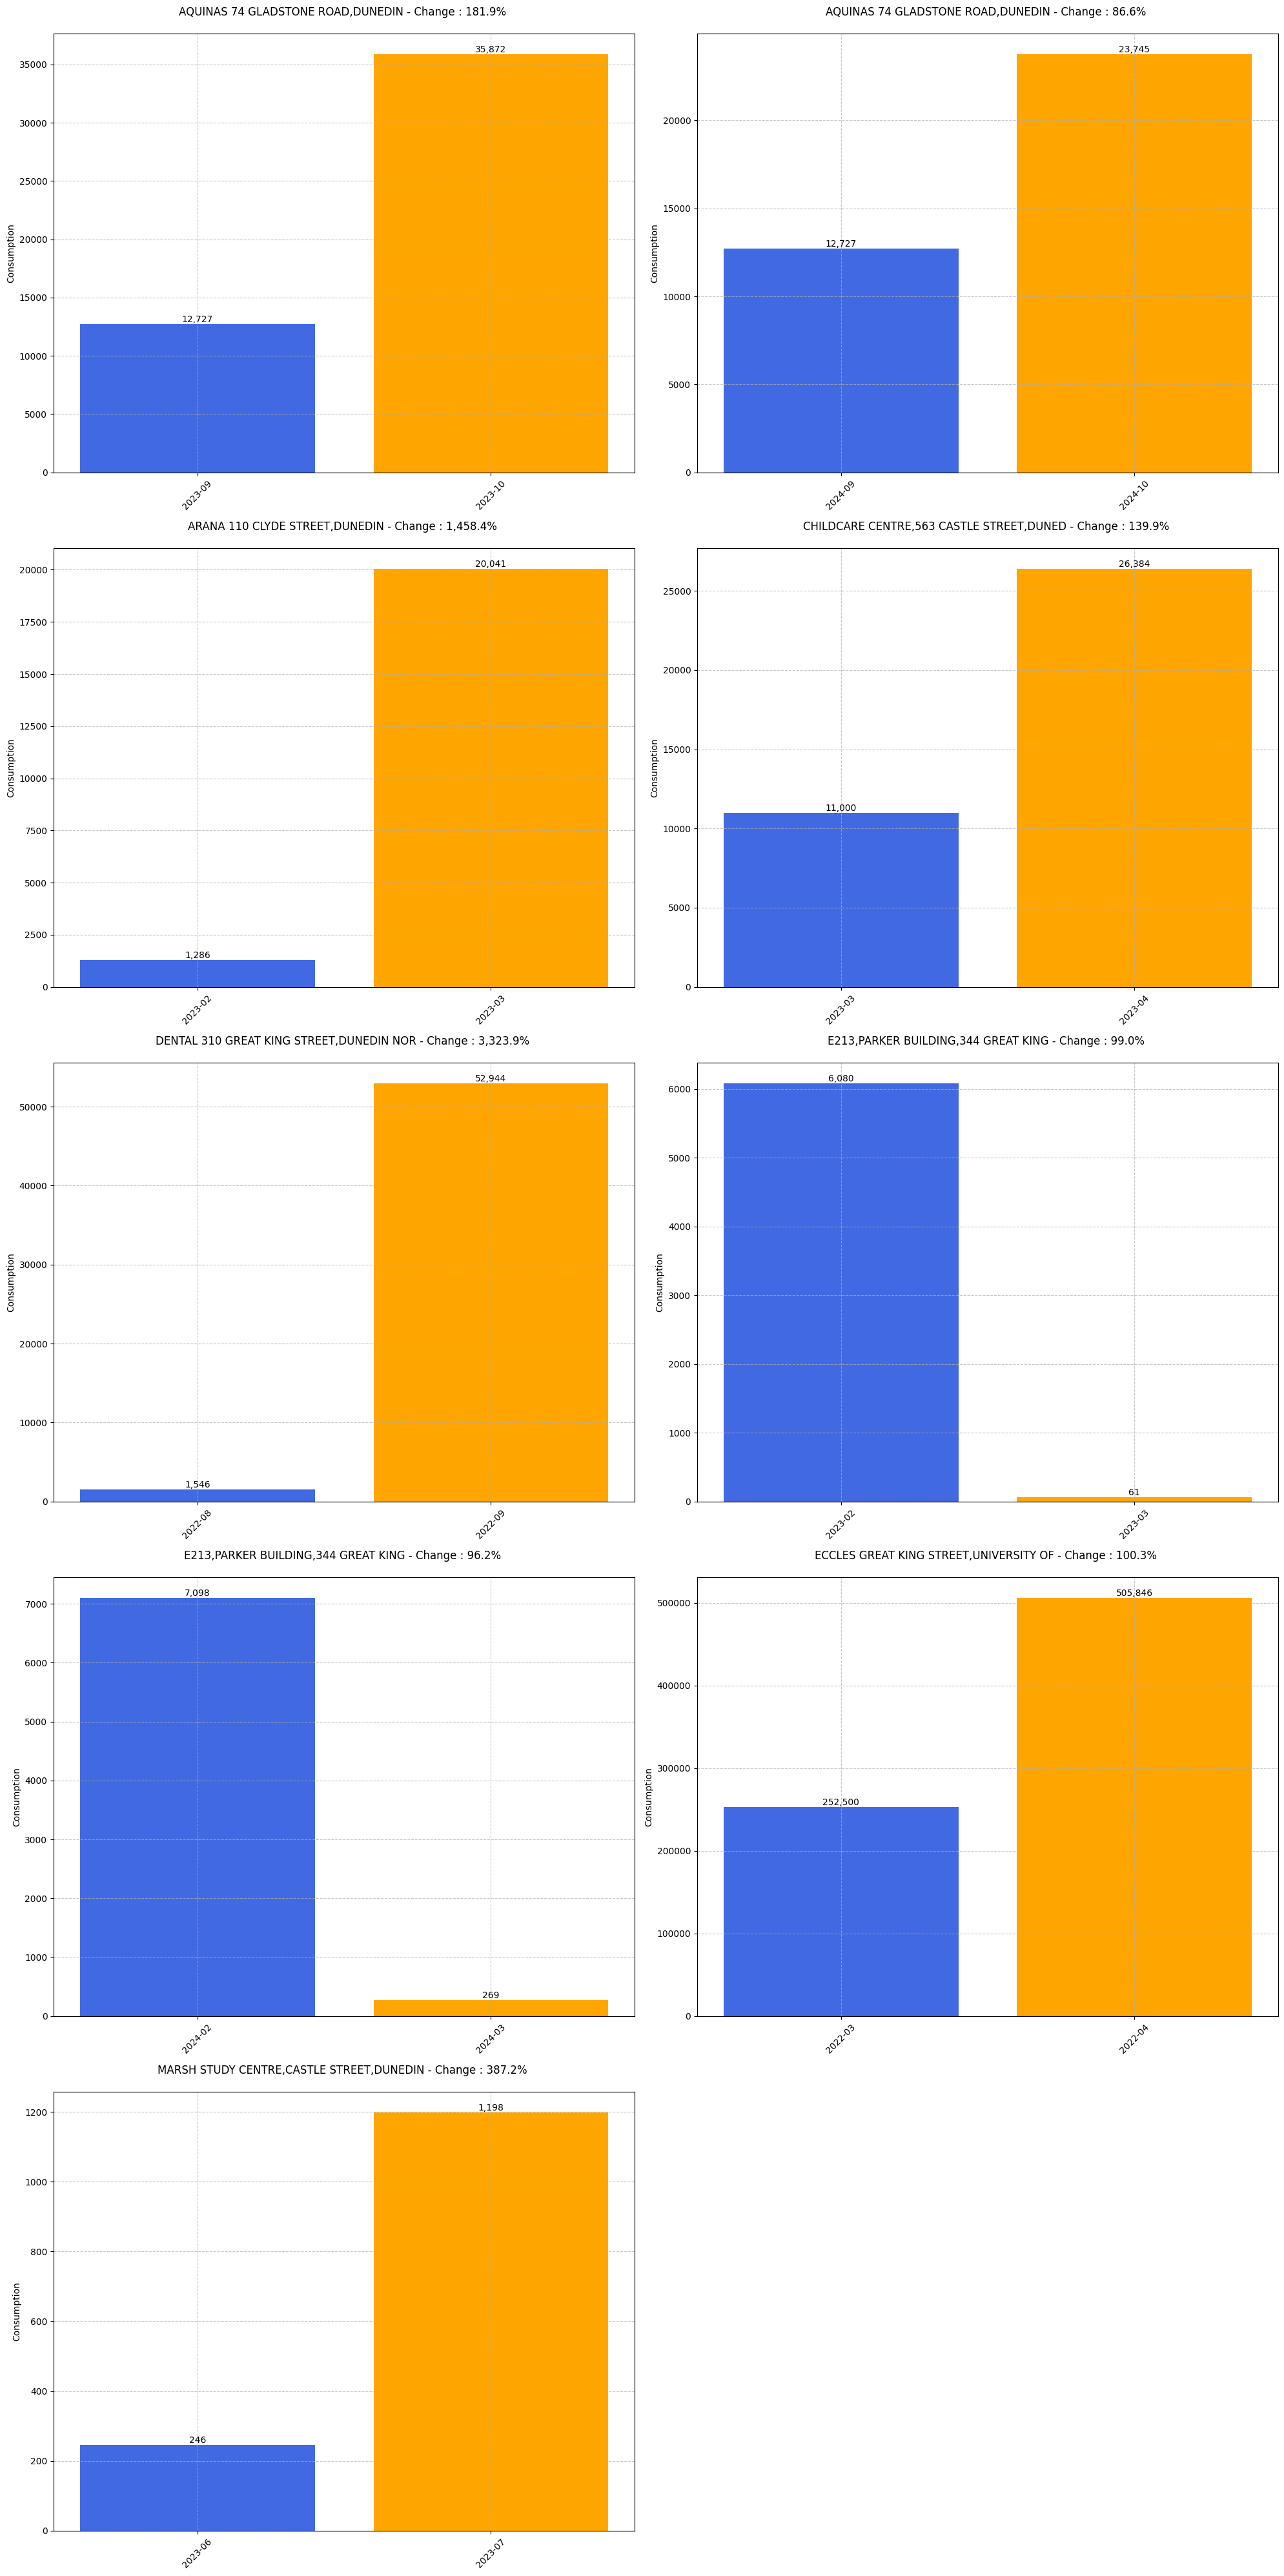

In [189]:
outliers=outliers[~outliers['meter_description'].isin(['56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH','PHYSIO BUILDING, 325 GREAT KING ST'])]

def plot_consumption_differences(outliers_df):
    # Calculate number of rows and columns for subplots
    n_outliers = len(outliers_df)
    n_rows = (n_outliers + 1) // 2  # Ceiling division to get number of rows
    n_cols = 2
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8*n_rows))
    axes = axes.ravel()  # Flatten axes array for easier indexing
    
    for idx, (_, row) in enumerate(outliers_df.iterrows()):
        # Get the actual months for labels
        current_month = row['month'].strftime('%Y-%m')
        previous_month = (row['month'] - pd.DateOffset(months=1)).strftime('%Y-%m')
        
        # Data for plotting
        ax = axes[idx]
        bars = ax.bar([previous_month, current_month], 
                     [row['previous_month_value'], row['consumption']],
                     color=['royalblue', 'orange'])
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:,.0f}',
                   ha='center', va='bottom')
        
        # Add percentage change annotation
        max_height = max(row['previous_month_value'], row['consumption'])
        pct_change = row['pct_change'] * 100
        '''ax.text(0.5, max_height * 1.1,
                f'Change: {pct_change:,.1f}%',
                ha='center', va='bottom',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))'''
        
        # Customize plot
        ax.set_title(f"{row['meter_description'][:40]} - Change : {pct_change:,.1f}% ",
                    pad=20)
        ax.set_ylabel('Consumption')
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.tick_params(axis='x', rotation=45)
    
    # Hide empty subplots if any
    for idx in range(n_outliers, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Call the function with your outliers dataframe
plot_consumption_differences(outliers)



/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_26813/2395266683.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')


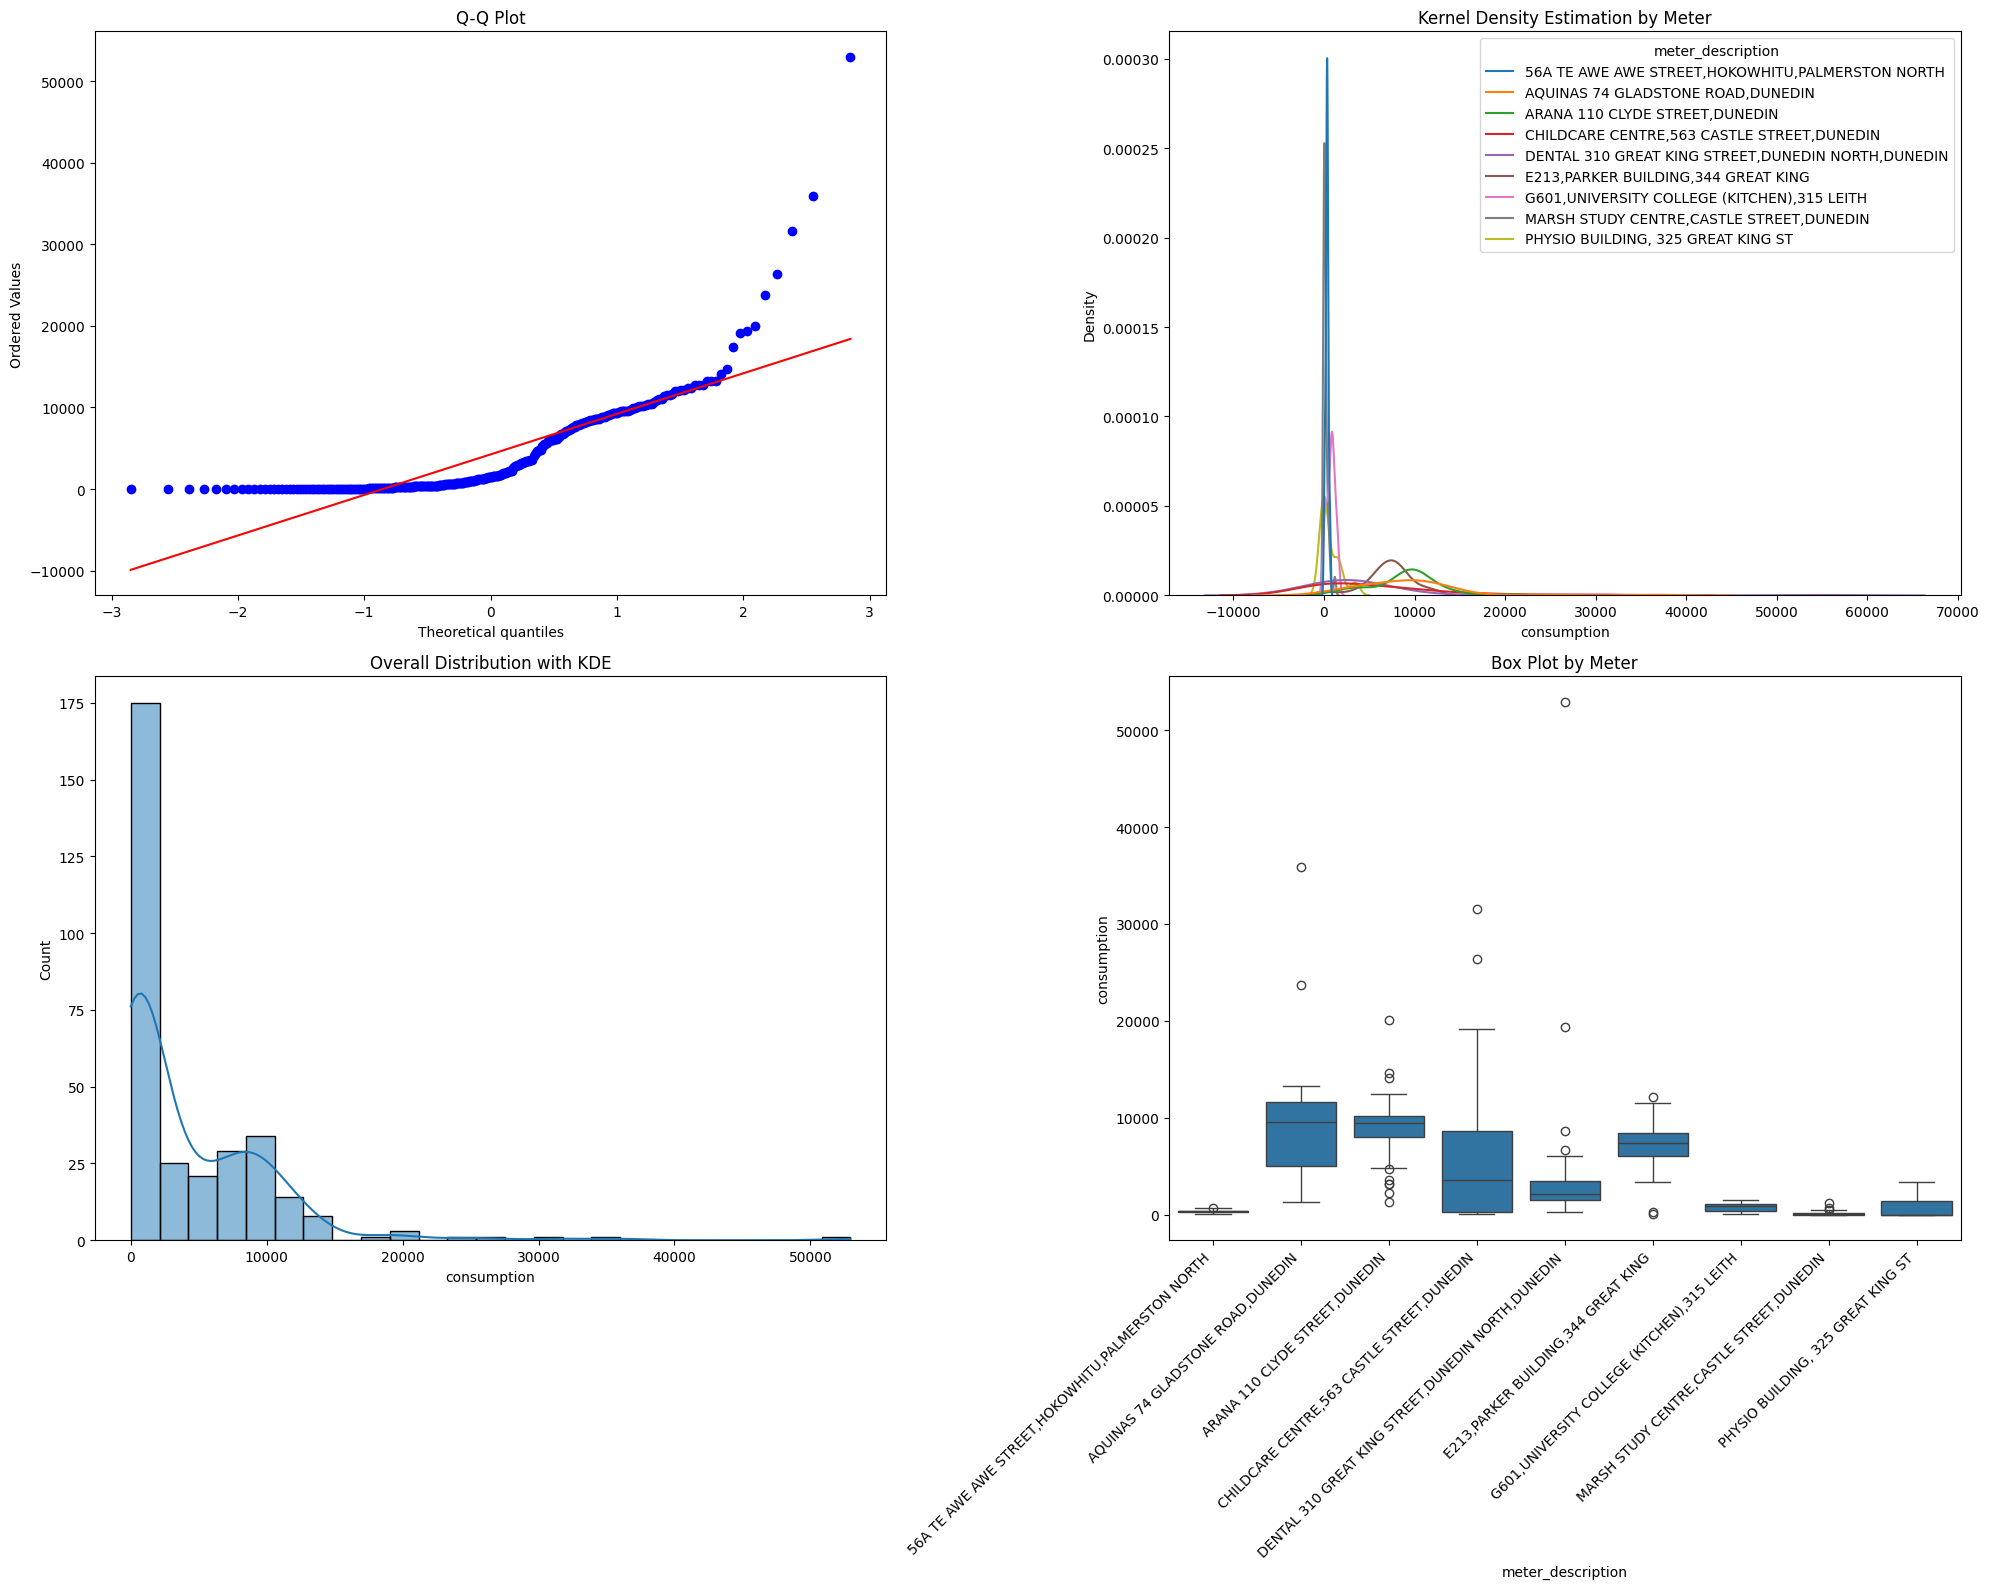


Analysis for 56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH:
Skewness: 0.0569
Kurtosis: 0.0779
Shapiro-Wilk test:
Statistic: 0.9695
p-value: 0.4304

Anderson-Darling test:
Statistic: 0.4397
Critical values: [0.527 0.6   0.719 0.839 0.998]

Analysis for AQUINAS 74 GLADSTONE ROAD,DUNEDIN:
Skewness: 2.2892
Kurtosis: 7.3755
Shapiro-Wilk test:
Statistic: 0.7733
p-value: 0.0000

Anderson-Darling test:
Statistic: 1.8695
Critical values: [0.527 0.6   0.719 0.839 0.998]

Analysis for ARANA 110 CLYDE STREET,DUNEDIN:
Skewness: 0.1688
Kurtosis: 1.1217
Shapiro-Wilk test:
Statistic: 0.9186
p-value: 0.0130

Anderson-Darling test:
Statistic: 1.3530
Critical values: [0.527 0.6   0.719 0.839 0.998]

Analysis for CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN:
Skewness: 1.6244
Kurtosis: 2.3330
Shapiro-Wilk test:
Statistic: 0.7814
p-value: 0.0000

Anderson-Darling test:
Statistic: 2.4613
Critical values: [0.527 0.6   0.719 0.839 0.998]

Analysis for DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUNEDIN:
Skewn

In [13]:
# Import required libraries
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

# Prepare data (excluding ECCLES)
gas_filtered = melted_df[melted_df['meter_description'] != 'ECCLES GREAT KING STREET,UNIVERSITY OF']

# 1. Normality Tests
def run_normality_tests(data):
    # Shapiro-Wilk test
    statistic, p_value = shapiro(data)
    print(f"Shapiro-Wilk test:")
    print(f"Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    # Anderson-Darling test
    result = anderson(data)
    print("\nAnderson-Darling test:")
    print(f"Statistic: {result.statistic:.4f}")
    print("Critical values:", result.critical_values)

# 2. Skewness and Kurtosis
def calculate_distribution_stats(data):
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    return skewness, kurtosis

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Q-Q Plot
stats.probplot(gas_filtered['consumption'], dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot")

# 2. Kernel Density Plot
sns.kdeplot(data=gas_filtered, x='consumption', hue='meter_description', ax=ax2)
ax2.set_title("Kernel Density Estimation by Meter")

# 3. Histogram with KDE
sns.histplot(data=gas_filtered, x='consumption', kde=True, ax=ax3)
ax3.set_title("Overall Distribution with KDE")

# 4. Box Plot
sns.boxplot(data=gas_filtered, x='meter_description', y='consumption', ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
ax4.set_title("Box Plot by Meter")

plt.tight_layout()
plt.show()

# Calculate statistics for each meter
for meter in gas_filtered['meter_description'].unique():
    meter_data = gas_filtered[gas_filtered['meter_description'] == meter]['consumption']
    print(f"\nAnalysis for {meter}:")
    skewness, kurtosis = calculate_distribution_stats(meter_data)
    print(f"Skewness: {skewness:.4f}")
    print(f"Kurtosis: {kurtosis:.4f}")
    run_normality_tests(meter_data)


/var/folders/58/qxt37p251zn90grr221ql66m0000gn/T/ipykernel_26813/1963118826.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')


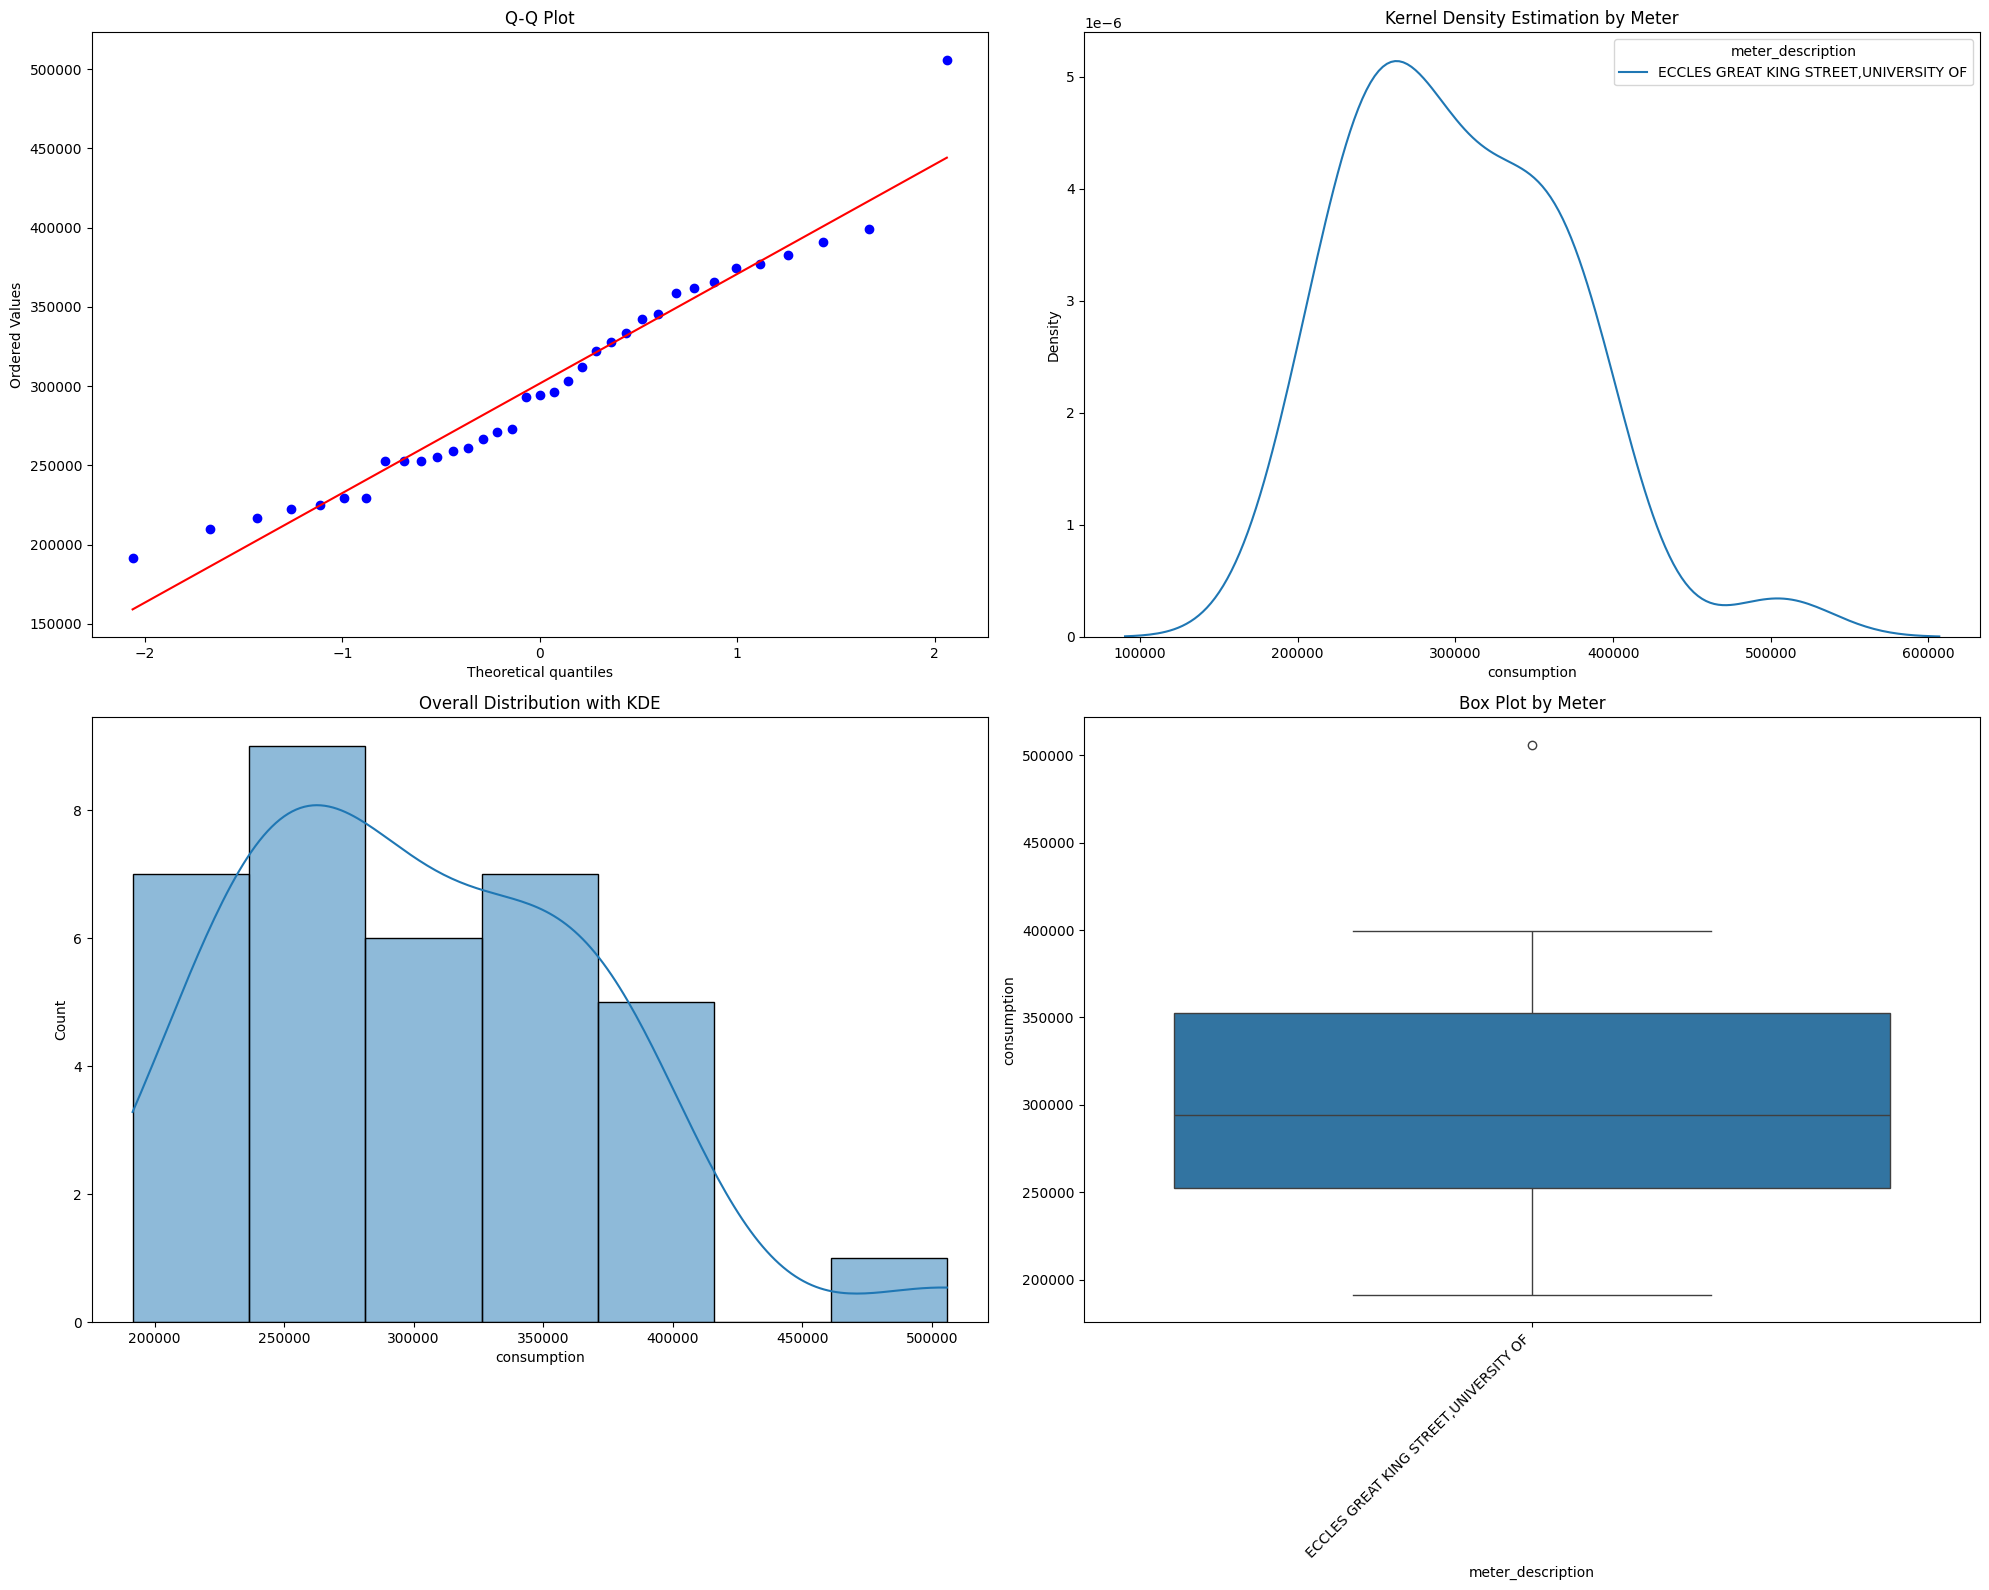


Analysis for ECCLES GREAT KING STREET,UNIVERSITY OF:
Skewness: 0.6768
Kurtosis: 0.3921
Shapiro-Wilk test:
Statistic: 0.9516
p-value: 0.1266

Anderson-Darling test:
Statistic: 0.4462
Critical values: [0.527 0.6   0.719 0.839 0.998]


In [10]:
# Import required libraries
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

# Prepare data (excluding ECCLES)
gas_filtered_e = melted_df[melted_df['meter_description']== 'ECCLES GREAT KING STREET,UNIVERSITY OF']

# 1. Normality Tests
def run_normality_tests(data):
    # Shapiro-Wilk test
    statistic, p_value = shapiro(data)
    print(f"Shapiro-Wilk test:")
    print(f"Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    # Anderson-Darling test
    result = anderson(data)
    print("\nAnderson-Darling test:")
    print(f"Statistic: {result.statistic:.4f}")
    print("Critical values:", result.critical_values)

# 2. Skewness and Kurtosis
def calculate_distribution_stats(data):
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    return skewness, kurtosis

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Q-Q Plot
stats.probplot(gas_filtered_e['consumption'], dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot")

# 2. Kernel Density Plot
sns.kdeplot(data=gas_filtered_e, x='consumption', hue='meter_description', ax=ax2)
ax2.set_title("Kernel Density Estimation by Meter")

# 3. Histogram with KDE
sns.histplot(data=gas_filtered_e, x='consumption', kde=True, ax=ax3)
ax3.set_title("Overall Distribution with KDE")

# 4. Box Plot
sns.boxplot(data=gas_filtered_e, x='meter_description', y='consumption', ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
ax4.set_title("Box Plot by Meter")

plt.tight_layout()
plt.show()

# Calculate statistics for each meter
for meter in gas_filtered_e['meter_description'].unique():
    meter_data = gas_filtered_e[gas_filtered_e['meter_description'] == meter]['consumption']
    print(f"\nAnalysis for {meter}:")
    skewness, kurtosis = calculate_distribution_stats(meter_data)
    print(f"Skewness: {skewness:.4f}")
    print(f"Kurtosis: {kurtosis:.4f}")
    run_normality_tests(meter_data)


In [16]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.tsa.stattools import adfuller

# 1. Kruskal-Wallis Test (Non-parametric alternative to ANOVA)
def perform_kruskal(data):
    statistic, p_value = stats.kruskal(*[group['consumption'].values 
                                       for name, group in data.groupby('meter_description')])
    return statistic, p_value

# 2. One-way ANOVA
def perform_anova(data):
    groups = [group['consumption'].values 
             for name, group in data.groupby('meter_description')]
    statistic, p_value = stats.f_oneway(*groups)
    return statistic, p_value

# 3. Structural Break Test (Augmented Dickey-Fuller)
def check_structural_breaks(data):
    result = adfuller(data)
    return result

# Perform tests
print("1. Kruskal-Wallis Test:")
kw_stat, kw_p = perform_kruskal(melted_df)
print(f"Statistic: {kw_stat:.4f}")
print(f"p-value: {kw_p:.4f}")

print("\n2. ANOVA Test:")
f_stat, f_p = perform_anova(melted_df)
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {f_p:.4f}")

# Structural Break Test for each building
print("\n3. Structural Break Test Results:")
for meter in melted_df['meter_description'].unique():
    meter_data = melted_df[melted_df['meter_description'] == meter]['consumption']
    result = check_structural_breaks(meter_data)
    print(f"\n{meter}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")


1. Kruskal-Wallis Test:
Statistic: 262.8602
p-value: 0.0000

2. ANOVA Test:
F-statistic: 631.7537
p-value: 0.0000

3. Structural Break Test Results:

56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH:
ADF Statistic: -3.9394
p-value: 0.0018

AQUINAS 74 GLADSTONE ROAD,DUNEDIN:
ADF Statistic: -3.6913
p-value: 0.0042

ARANA 110 CLYDE STREET,DUNEDIN:
ADF Statistic: -5.2540
p-value: 0.0000

CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN:
ADF Statistic: -3.8918
p-value: 0.0021

DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUNEDIN:
ADF Statistic: -1.6693
p-value: 0.4470

E213,PARKER BUILDING,344 GREAT KING:
ADF Statistic: -3.6316
p-value: 0.0052

ECCLES GREAT KING STREET,UNIVERSITY OF:
ADF Statistic: -1.9597
p-value: 0.3045

G601,UNIVERSITY COLLEGE (KITCHEN),315 LEITH:
ADF Statistic: -1.6312
p-value: 0.4668

MARSH STUDY CENTRE,CASTLE STREET,DUNEDIN:
ADF Statistic: -3.3714
p-value: 0.0120

PHYSIO BUILDING, 325 GREAT KING ST:
ADF Statistic: -68763059269.7255
p-value: 0.0000



Analyzing G601,UNIVERSITY COLLEGE (KITCHEN),315 LEITH


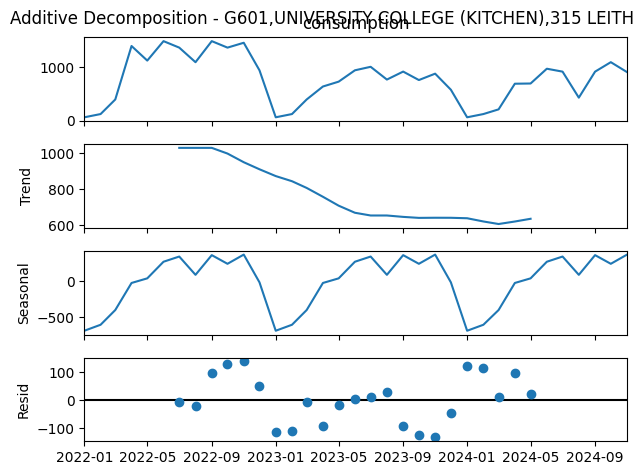

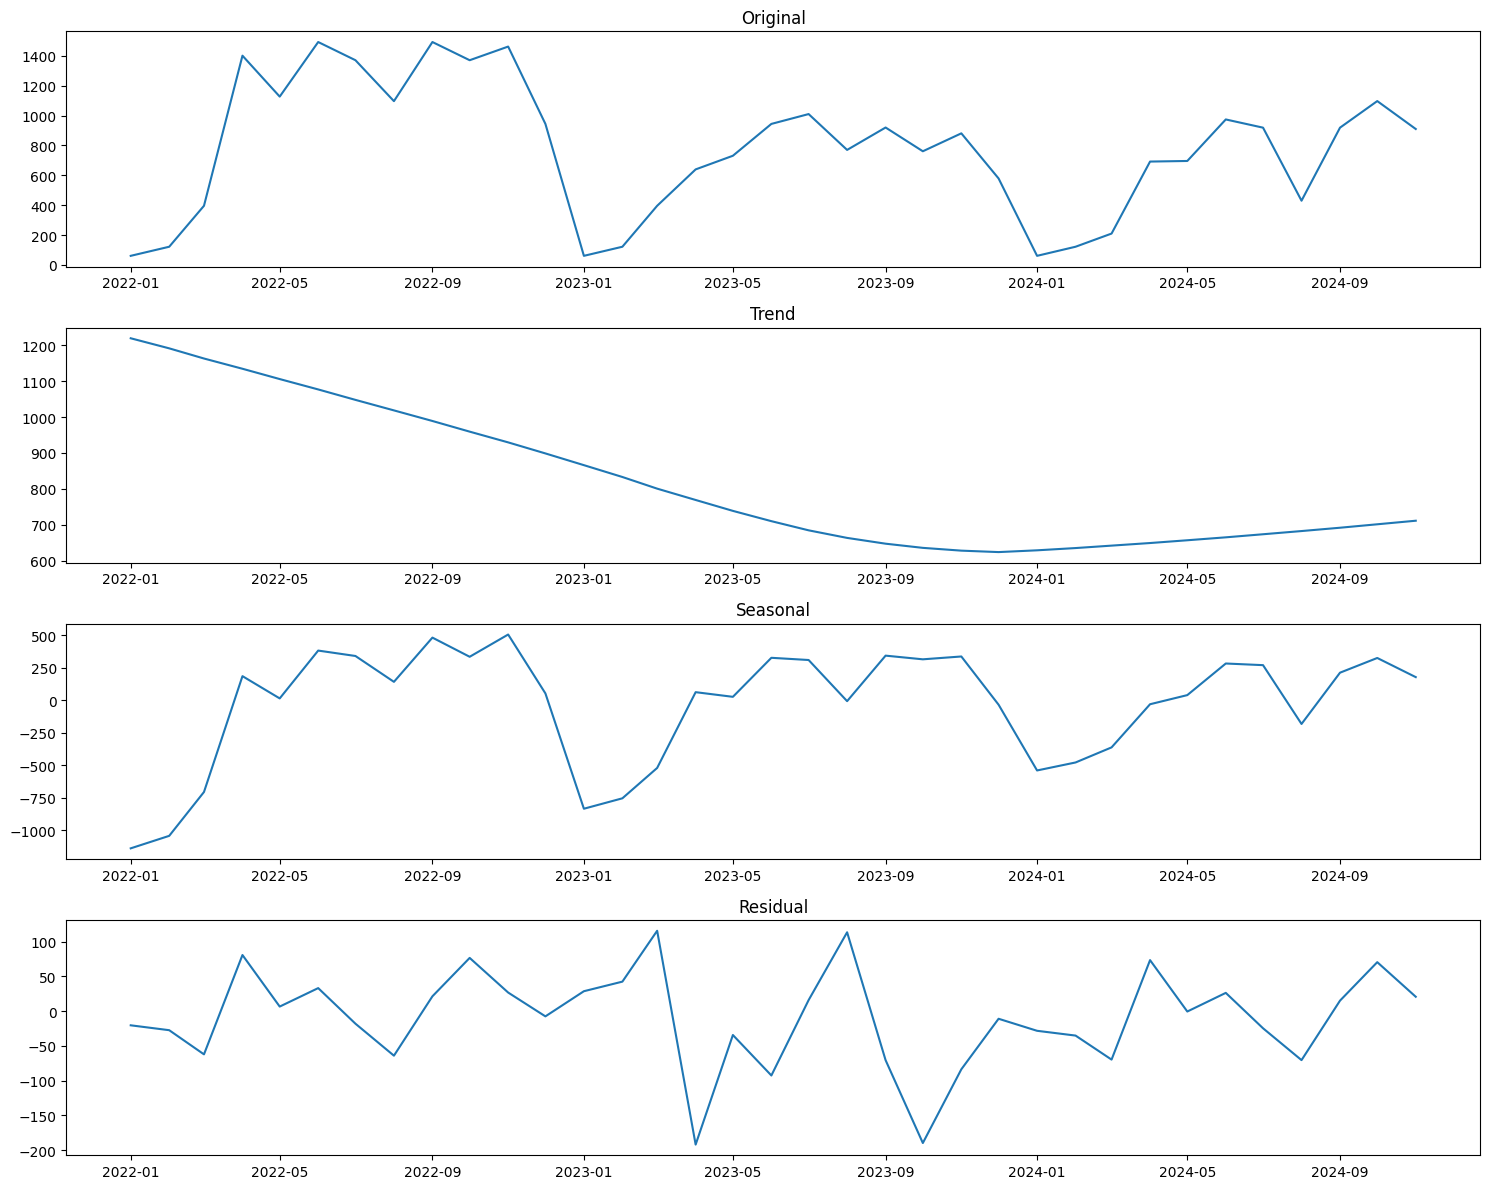


Analyzing E213,PARKER BUILDING,344 GREAT KING


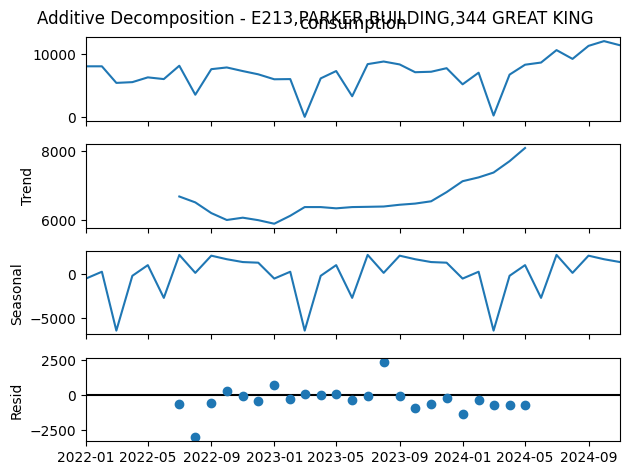

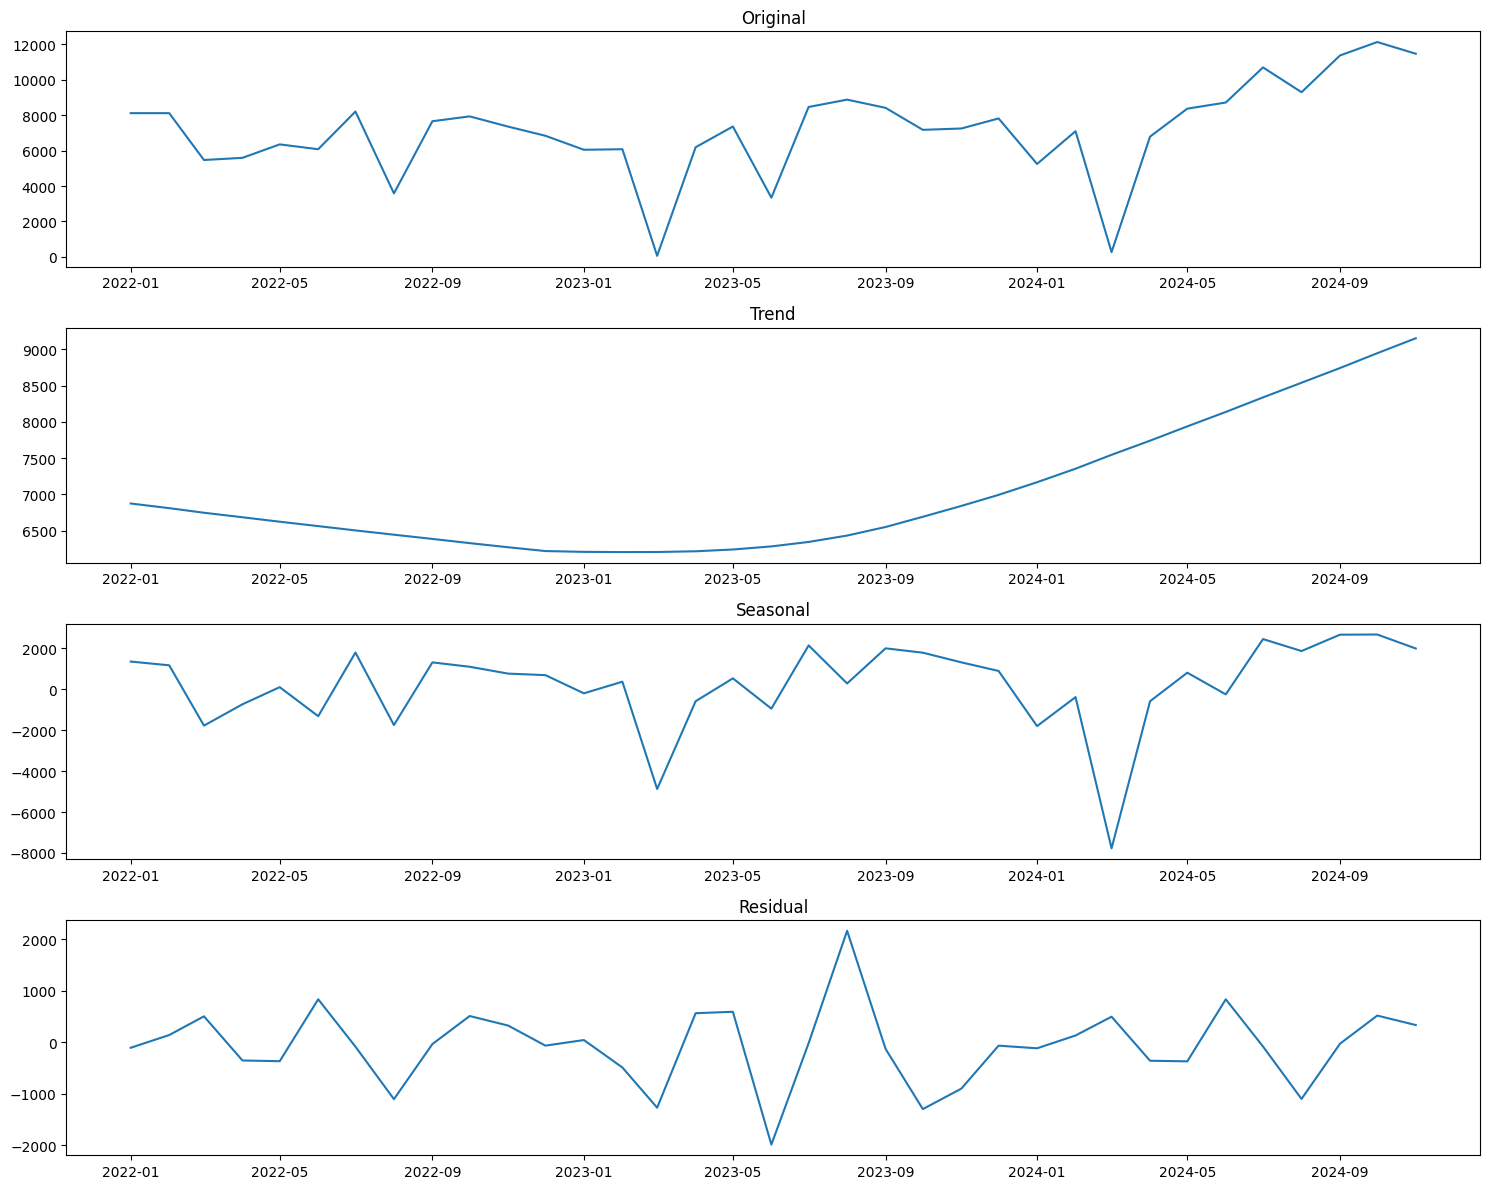


Analyzing ARANA 110 CLYDE STREET,DUNEDIN


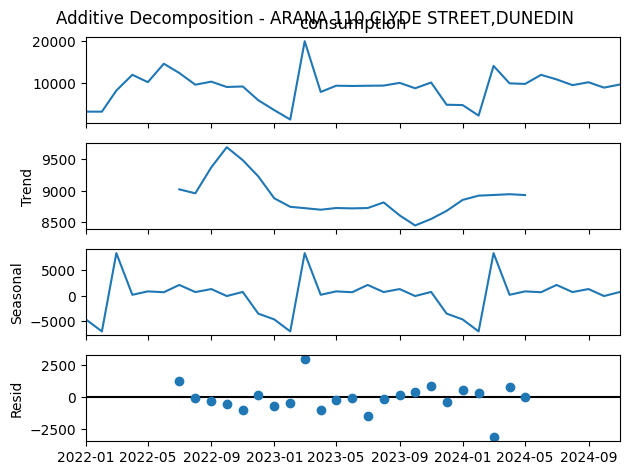

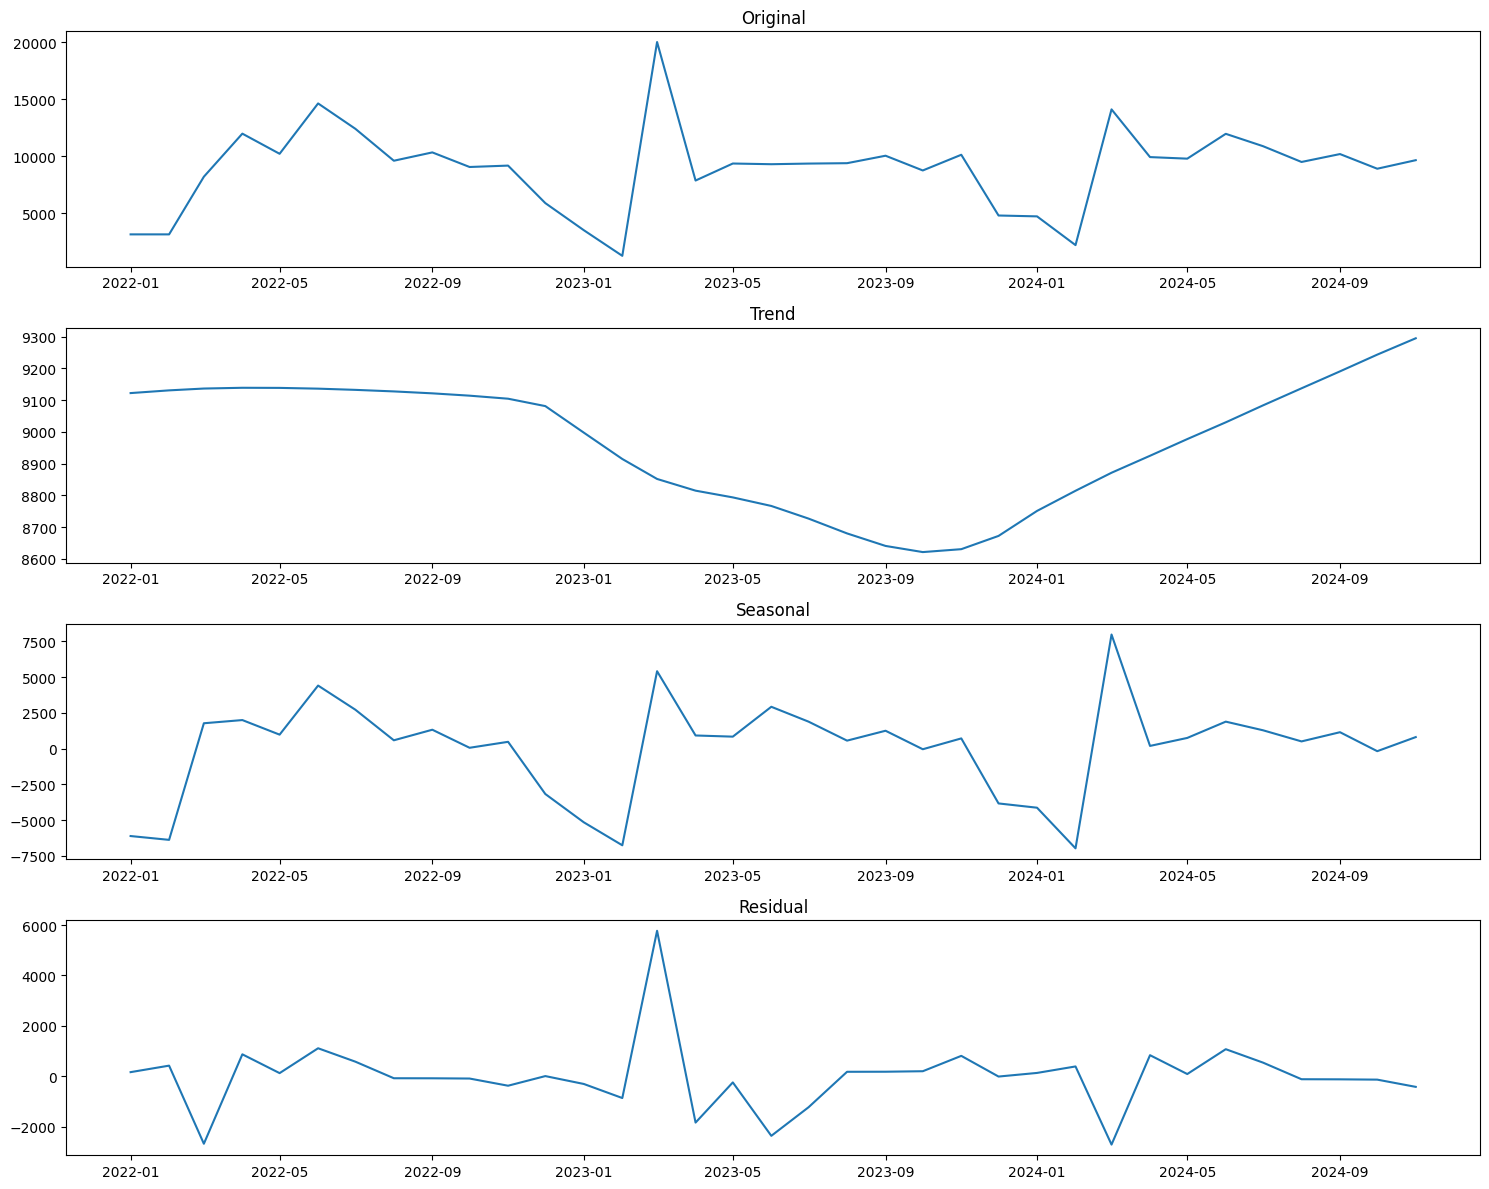


Analyzing DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUNEDIN


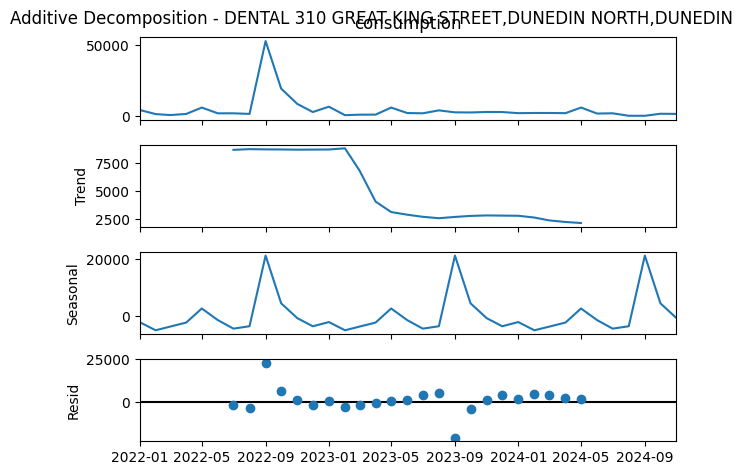

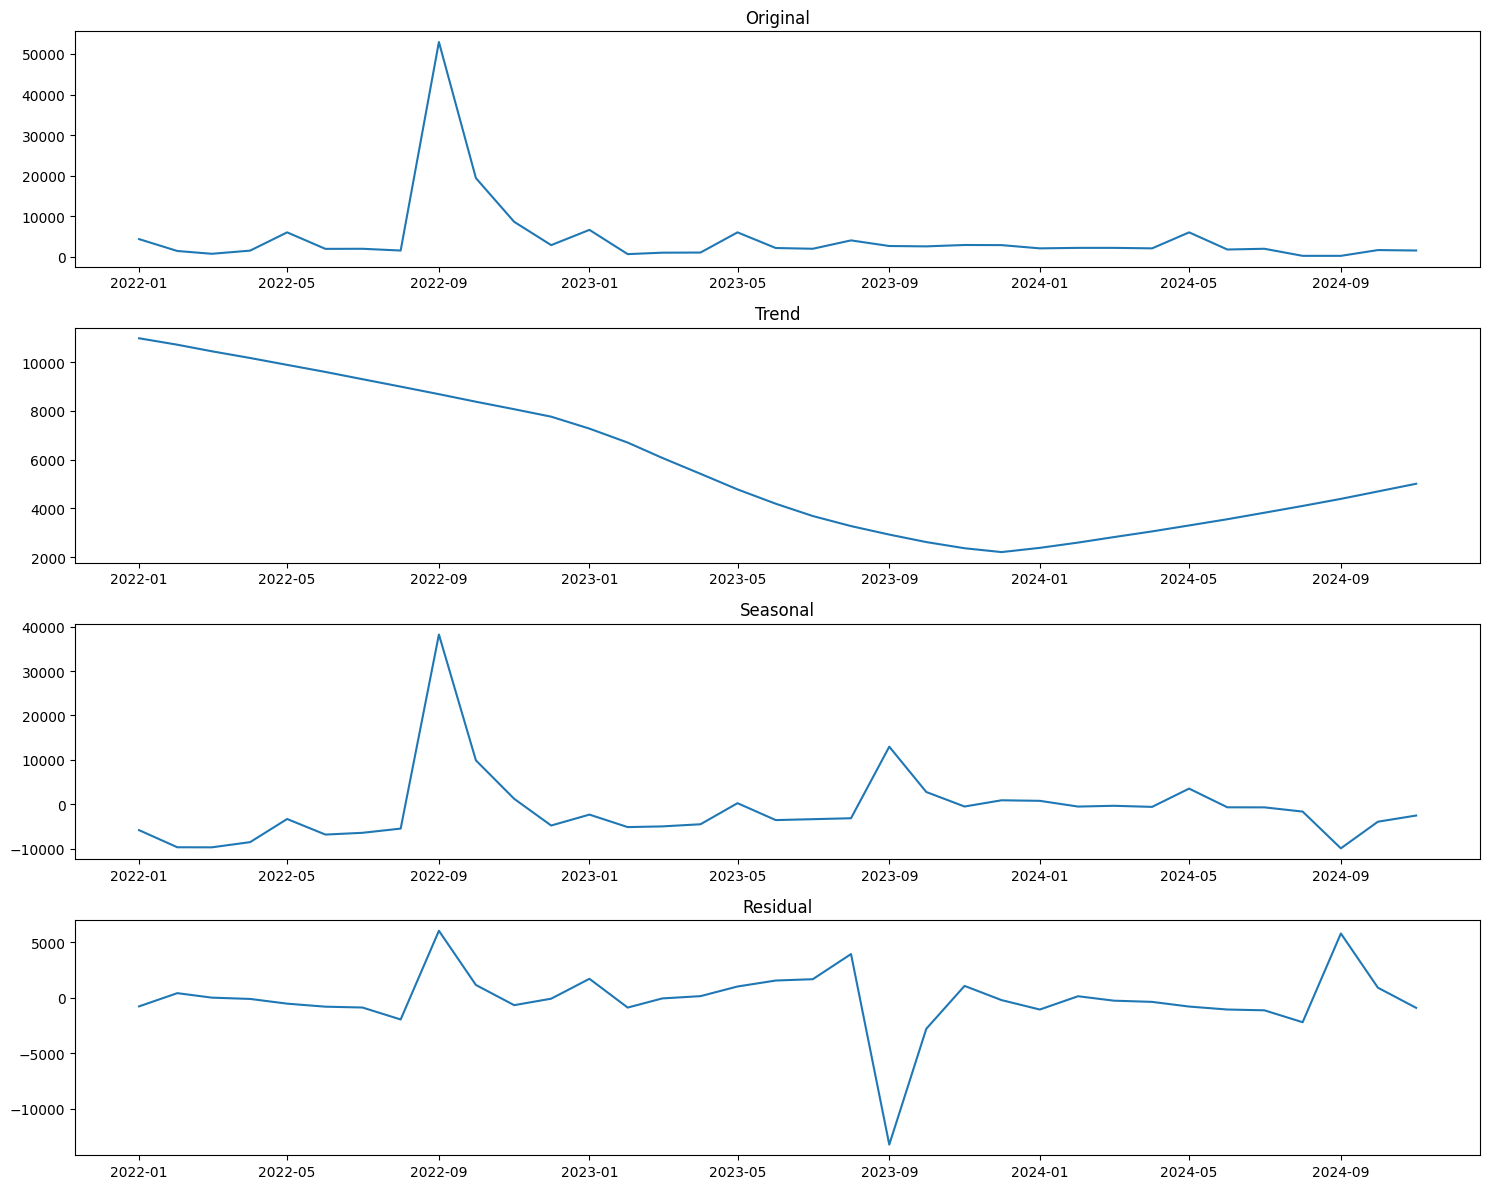


Analyzing MARSH STUDY CENTRE,CASTLE STREET,DUNEDIN


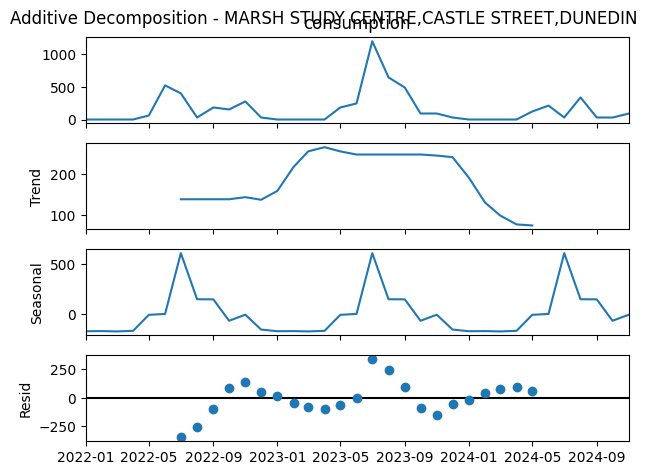

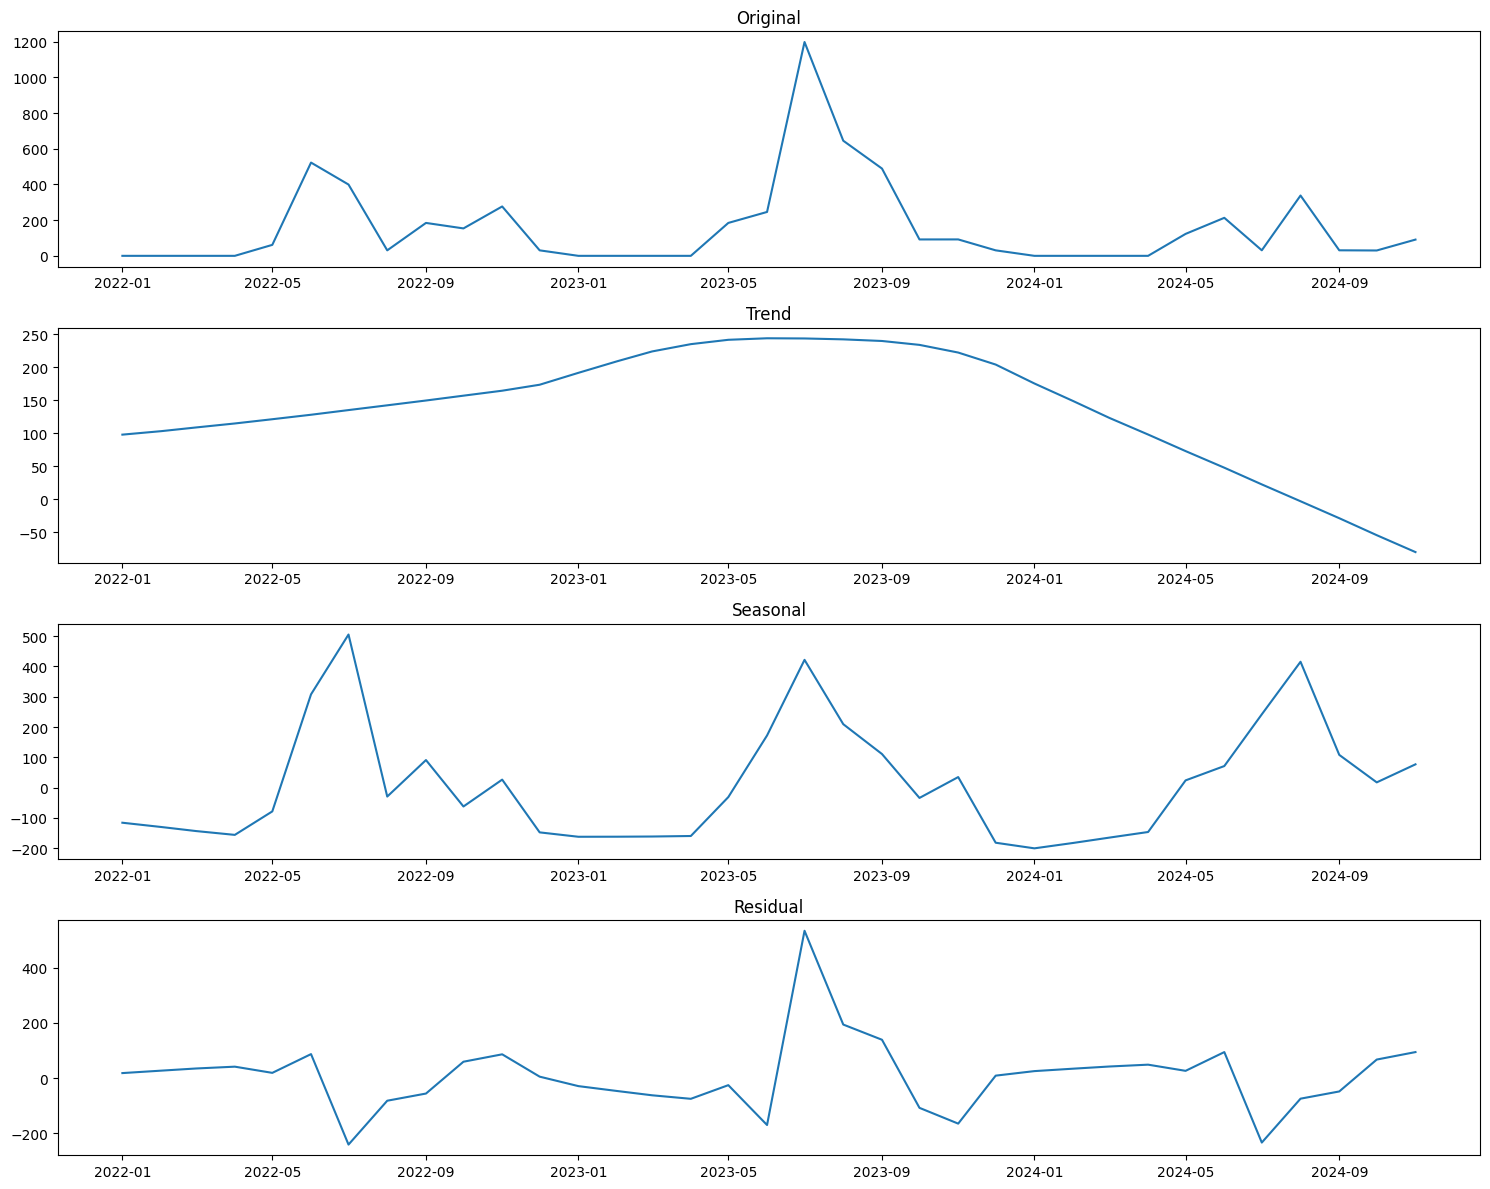


Analyzing CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN


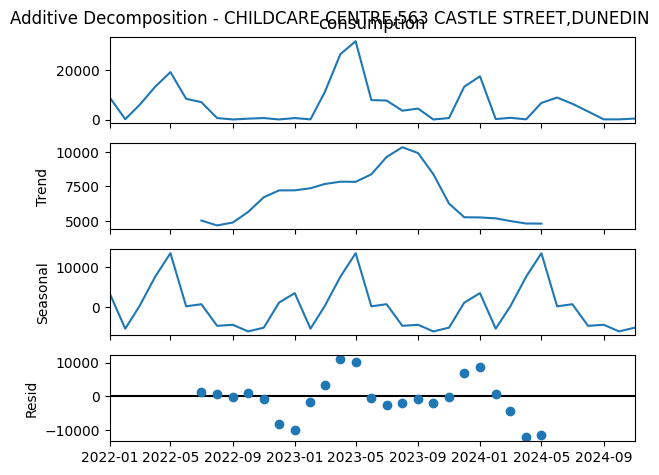

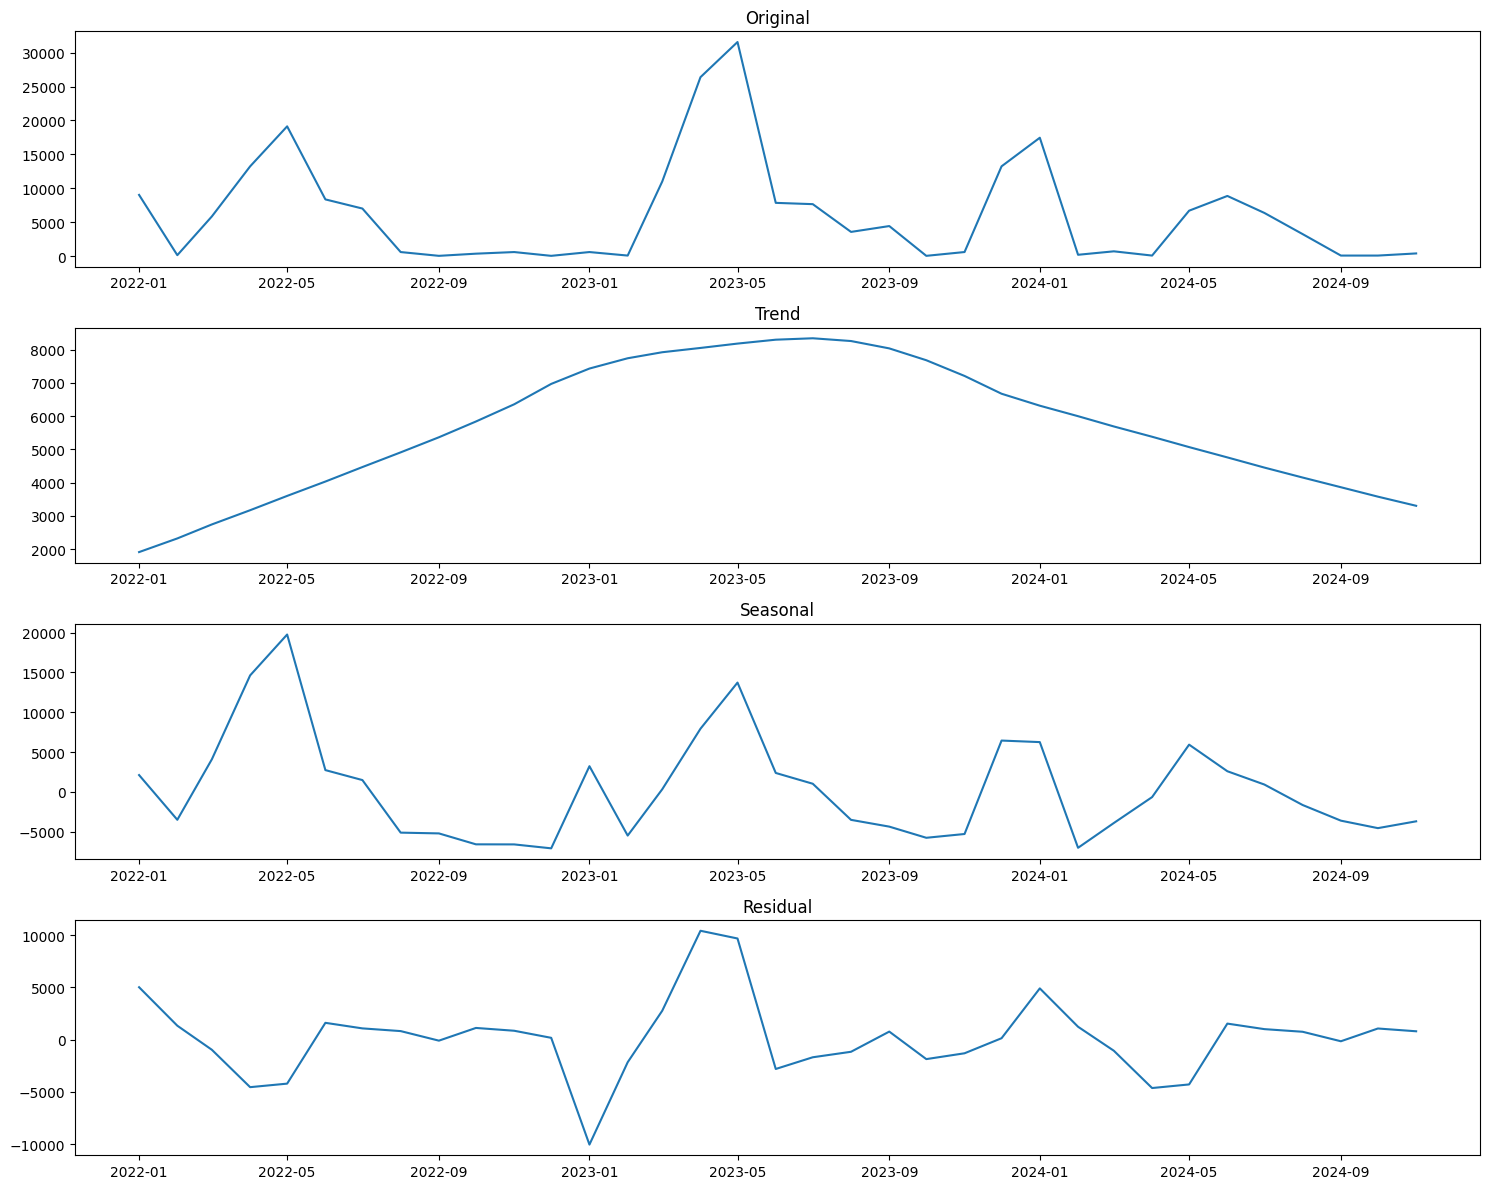


Analyzing PHYSIO BUILDING, 325 GREAT KING ST


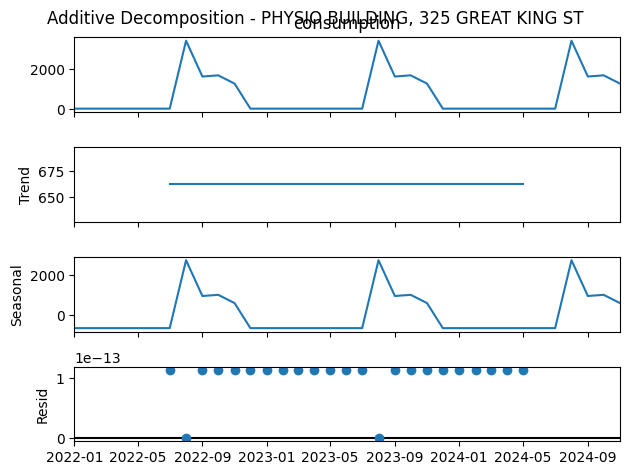

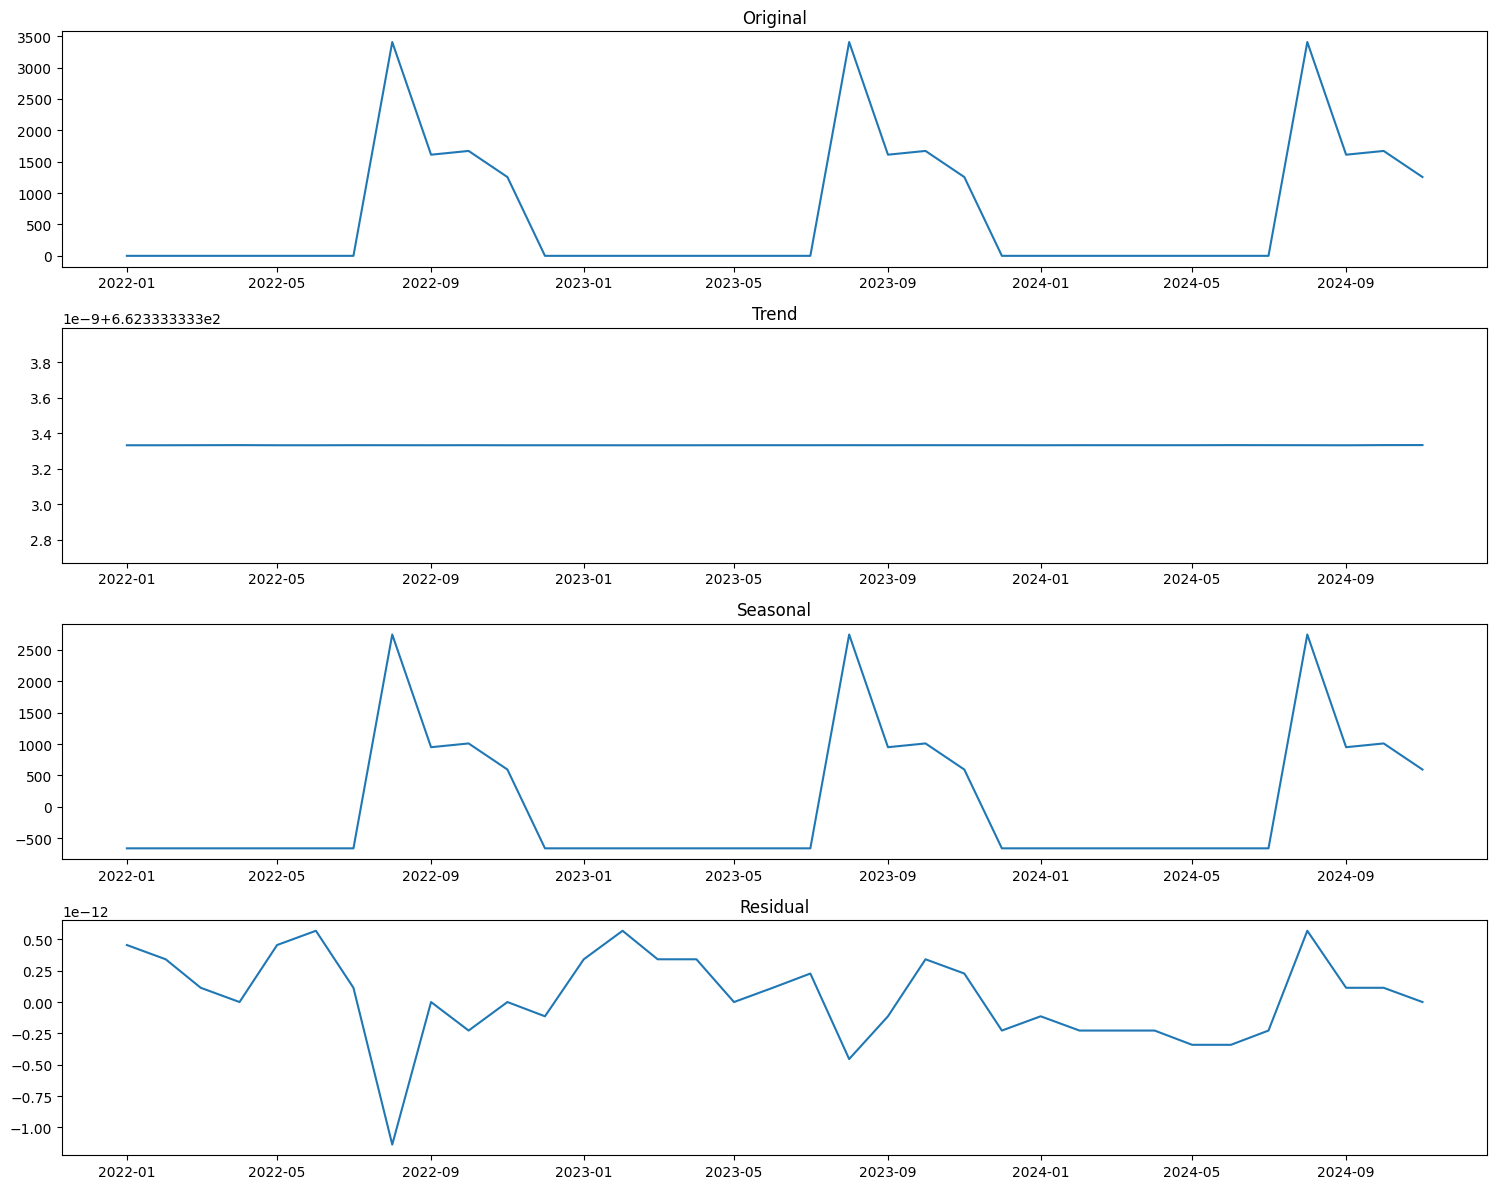


Analyzing AQUINAS 74 GLADSTONE ROAD,DUNEDIN


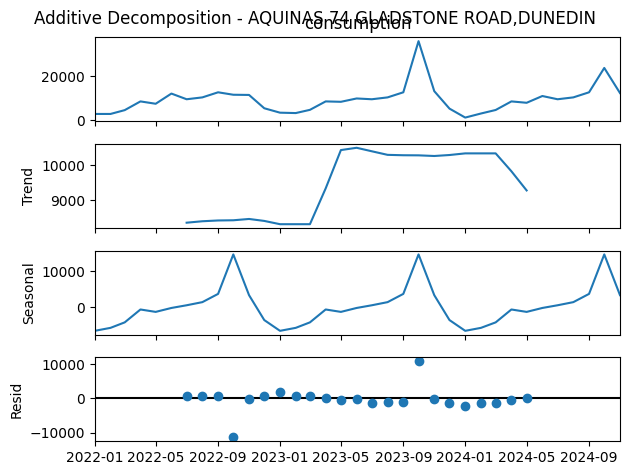

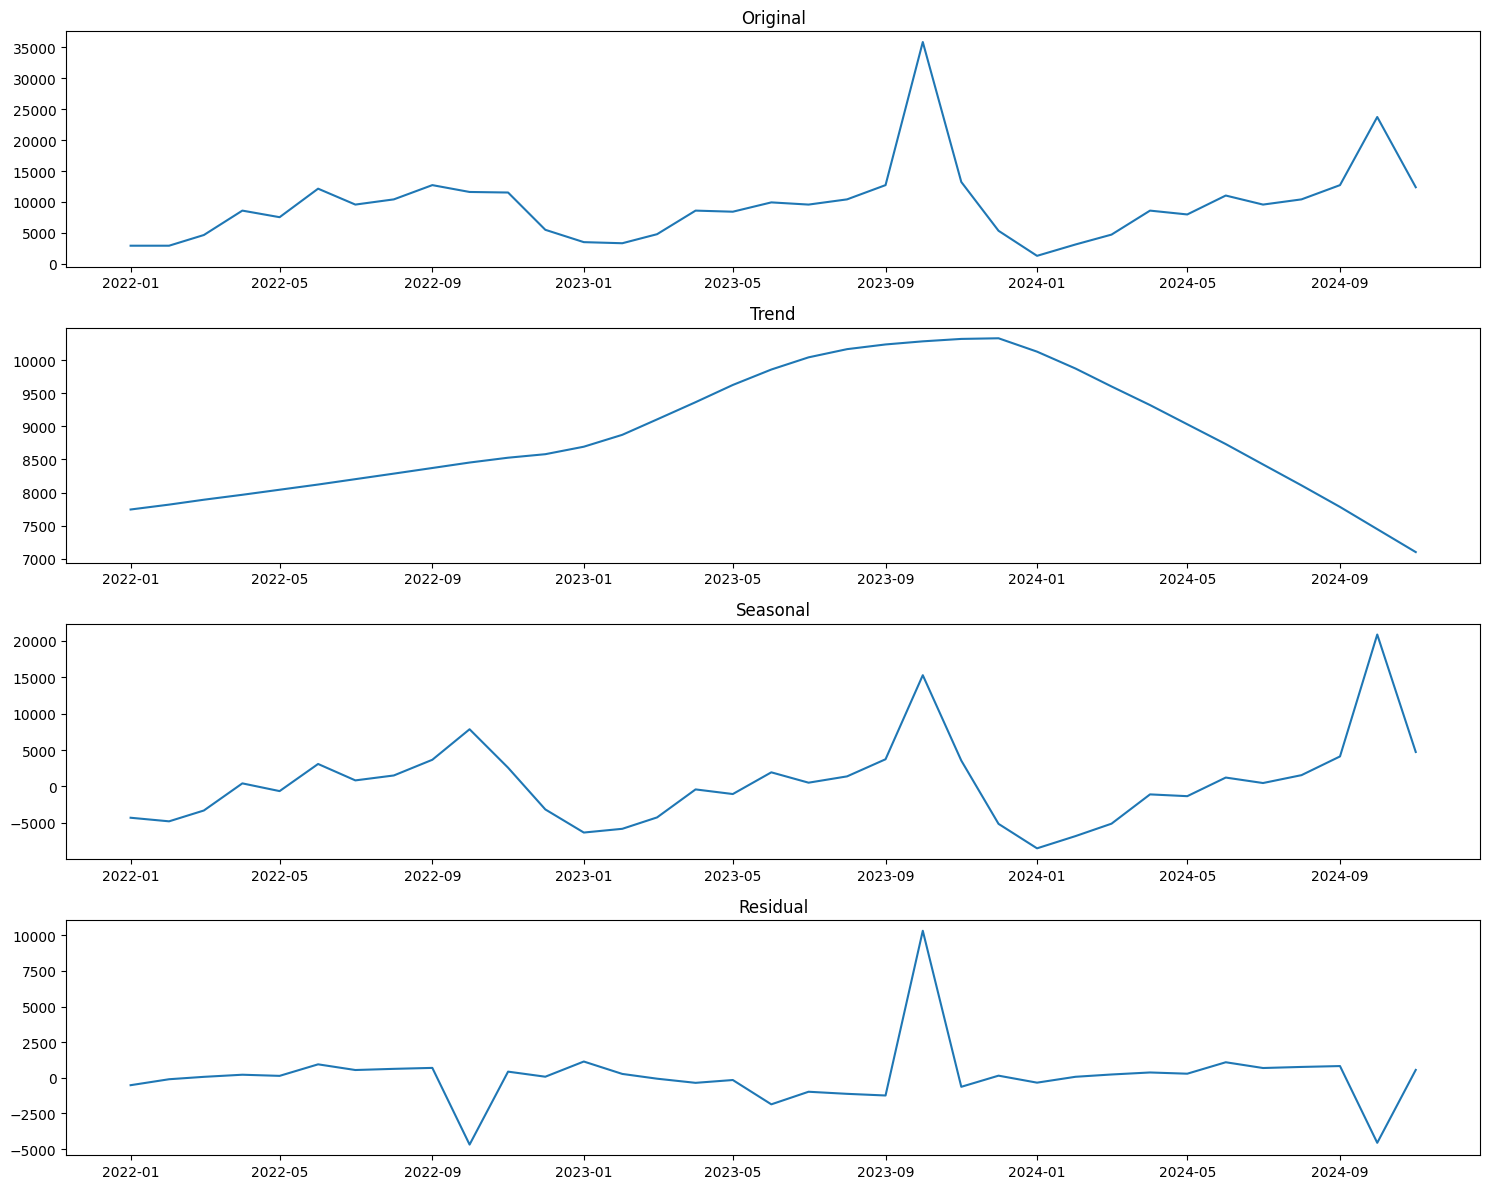


Analyzing 56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH


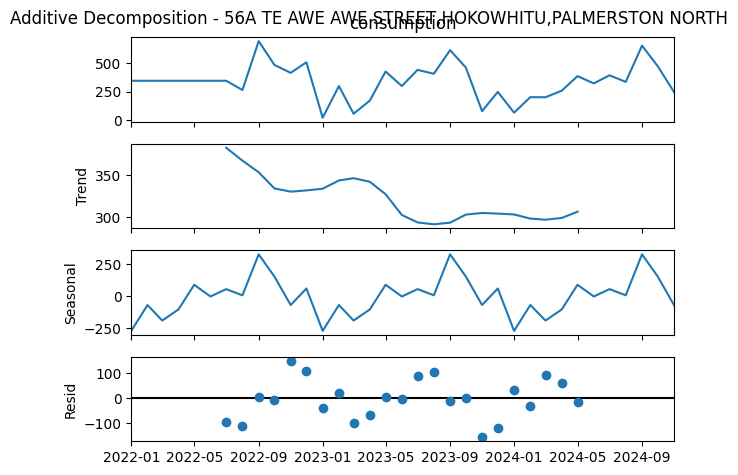

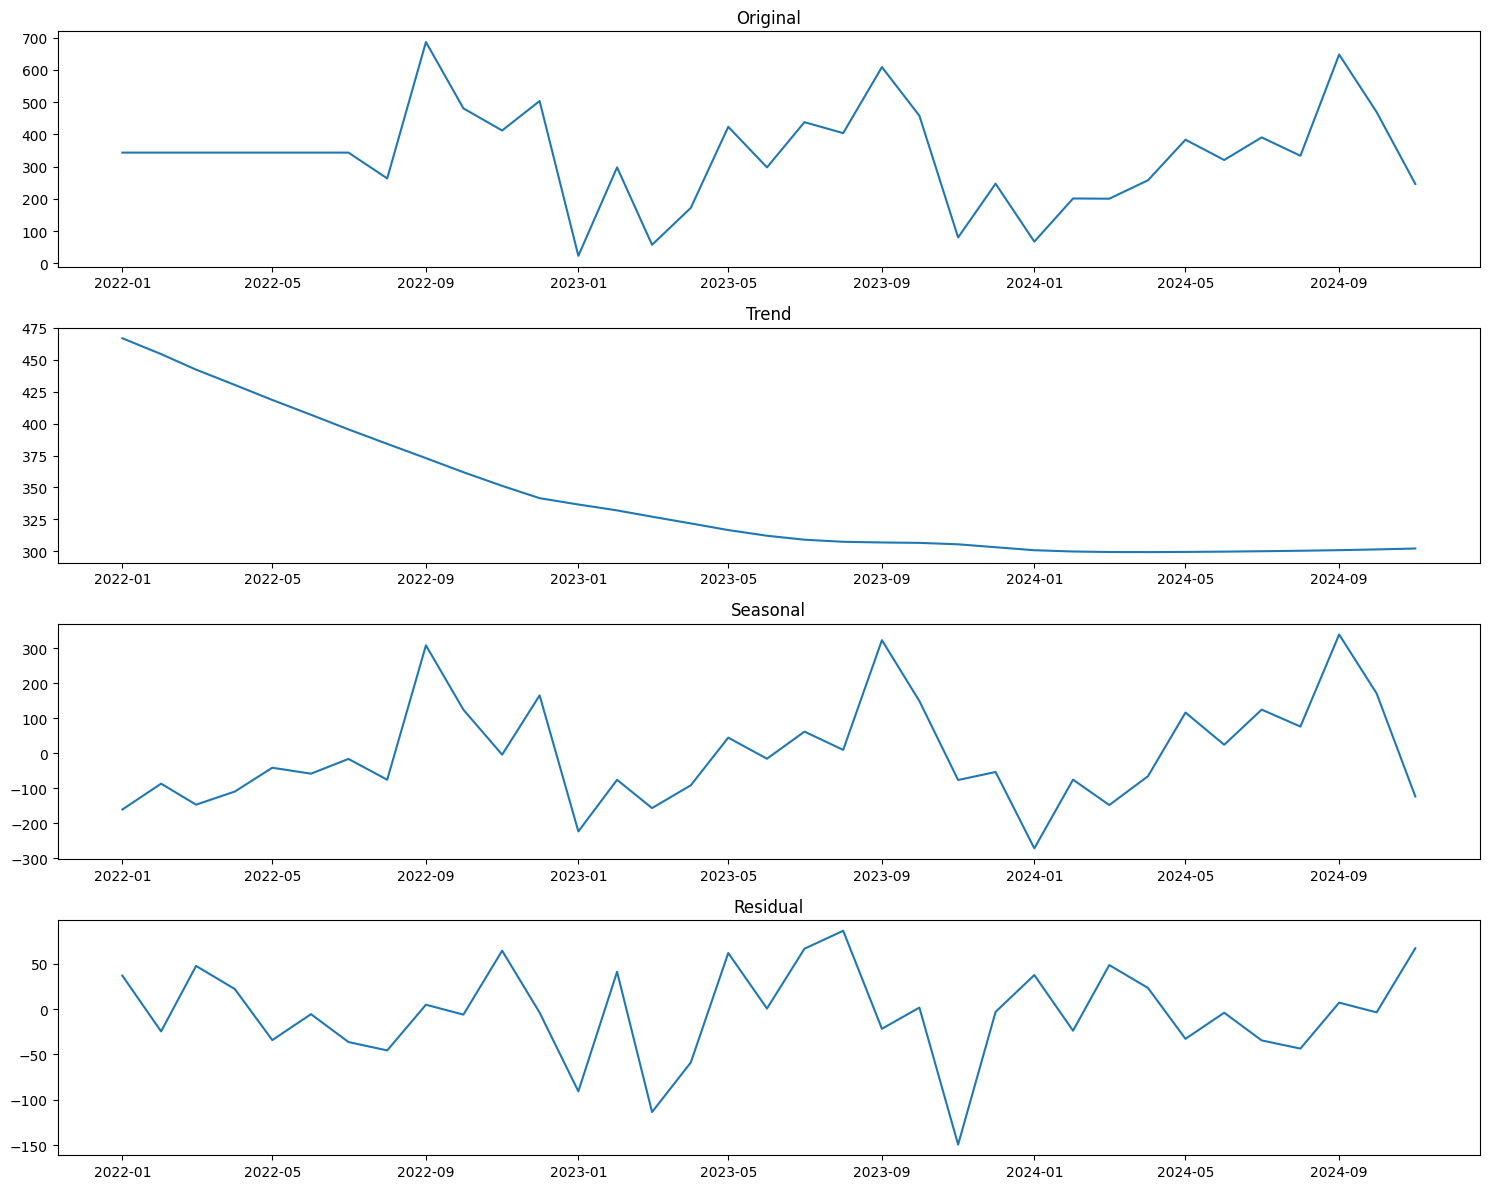

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

# Read the data
gas_df = pd.read_csv(FILE_PATH)

# Melt the dataframe for time series analysis
melted_df = gas_df.melt(id_vars=['meter_description'], 
                        var_name='month', 
                        value_name='consumption')

# Convert month column to datetime
melted_df['month'] = melted_df['month'].apply(lambda x: pd.to_datetime(x.replace('_', ' ') + ' 01'))

# Filter out Eccles building
gas_filtered = melted_df[melted_df['meter_description'] != 'ECCLES GREAT KING STREET,UNIVERSITY OF']


def perform_decomposition(data, meter_name):
    # Prepare time series data
    ts_data = data[data['meter_description'] == meter_name].set_index('month')['consumption']
    
    # 1. Additive Decomposition
    additive_decomp = seasonal_decompose(ts_data, period=12, model='additive')
    
    # 2. STL Decomposition
    stl = STL(ts_data, period=12)
    stl_decomp = stl.fit()
    
    # Plot decompositions
    # Additive Decomposition
    additive_decomp.plot().suptitle(f'Additive Decomposition - {meter_name}')
    plt.show()
    
    # STL Decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    ax1.plot(stl_decomp.observed)
    ax1.set_title('Original')
    ax2.plot(stl_decomp.trend)
    ax2.set_title('Trend')
    ax3.plot(stl_decomp.seasonal)
    ax3.set_title('Seasonal')
    ax4.plot(stl_decomp.resid)
    ax4.set_title('Residual')
    plt.tight_layout()
    plt.show()


# Example for a specific building (excluding Eccles)
for meter in gas_filtered['meter_description'].unique():
    if meter != 'ECCLES GREAT KING STREET,UNIVERSITY OF':
        print(f"\nAnalyzing {meter}")
        perform_decomposition(gas_filtered, meter)




# Example for a specific building (excluding Eccles)
for meter in gas_filtered['meter_description'].unique():
    if meter == 'ECCLES GREAT KING STREET,UNIVERSITY OF':
        print(f"\nAnalyzing {meter}")
        perform_decomposition(gas_filtered, meter)


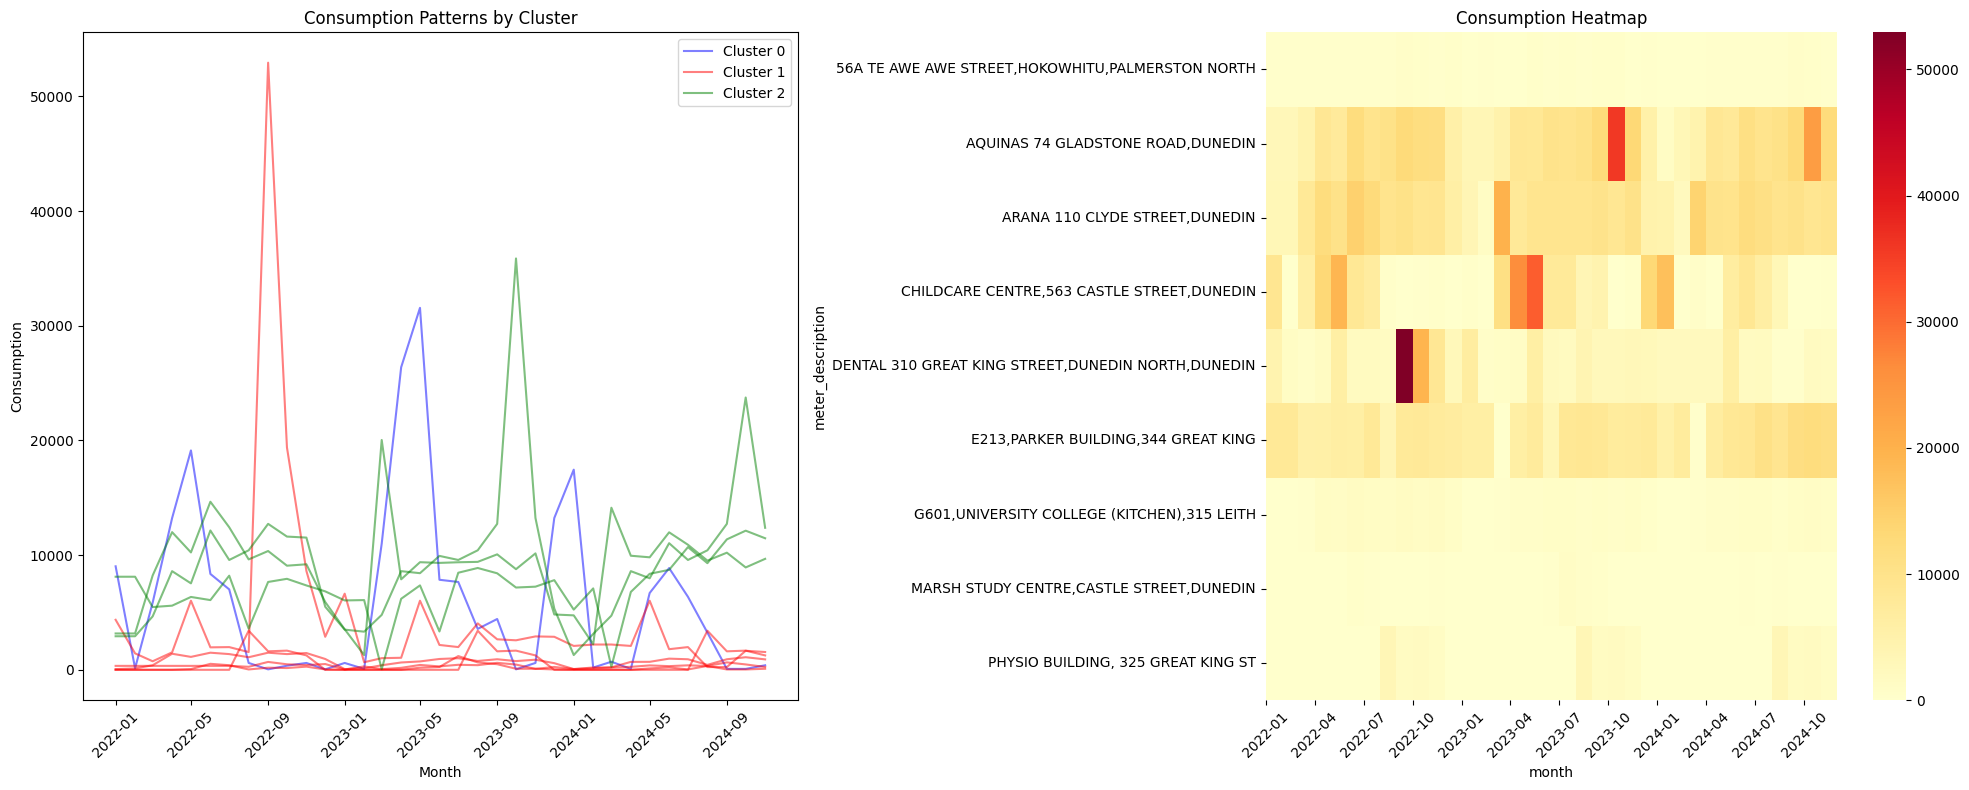


Cluster Assignments:
                                            Building  Cluster
0   56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH        1
1                  AQUINAS 74 GLADSTONE ROAD,DUNEDIN        2
2                     ARANA 110 CLYDE STREET,DUNEDIN        2
3         CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN        0
4  DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUN...        1
5                E213,PARKER BUILDING,344 GREAT KING        2
6        G601,UNIVERSITY COLLEGE (KITCHEN),315 LEITH        1
7           MARSH STUDY CENTRE,CASTLE STREET,DUNEDIN        1
8                 PHYSIO BUILDING, 325 GREAT KING ST        1


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_clustering_analysis(gas_filtered):
    # Prepare data
    pivot_data = gas_filtered.pivot(index='meter_description', 
                                  columns='month', 
                                  values='consumption')
    
    # Standardize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(pivot_data)
    
    # K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Define distinct colors for clusters
    cluster_colors = ['blue', 'red', 'green']
    
    # Plot 1: Consumption patterns by cluster with distinct colors
    for i in range(3):
        cluster_data = pivot_data[clusters == i]
        for idx in cluster_data.index:
            ax1.plot(cluster_data.loc[idx], 
                    color=cluster_colors[i],
                    alpha=0.5,
                    label=f'Cluster {i}' if idx == cluster_data.index[0] else "")
    
    ax1.set_title('Consumption Patterns by Cluster')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Consumption')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Consumption heatmap
    sns.heatmap(pivot_data, ax=ax2, cmap='YlOrRd')
    ax2.set_title('Consumption Heatmap')
    
    # Format x-axis labels for heatmap
    x_ticks = np.arange(0, len(pivot_data.columns), 3)
    x_labels = pd.to_datetime(pivot_data.columns[x_ticks]).strftime('%Y-%m')
    ax2.set_xticks(x_ticks)
    ax2.set_xticklabels(x_labels, rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return pd.DataFrame({
        'Building': pivot_data.index,
        'Cluster': clusters
    })



# Execute clustering
clusters = perform_clustering_analysis(gas_filtered)
print("\nCluster Assignments:")
print(clusters)


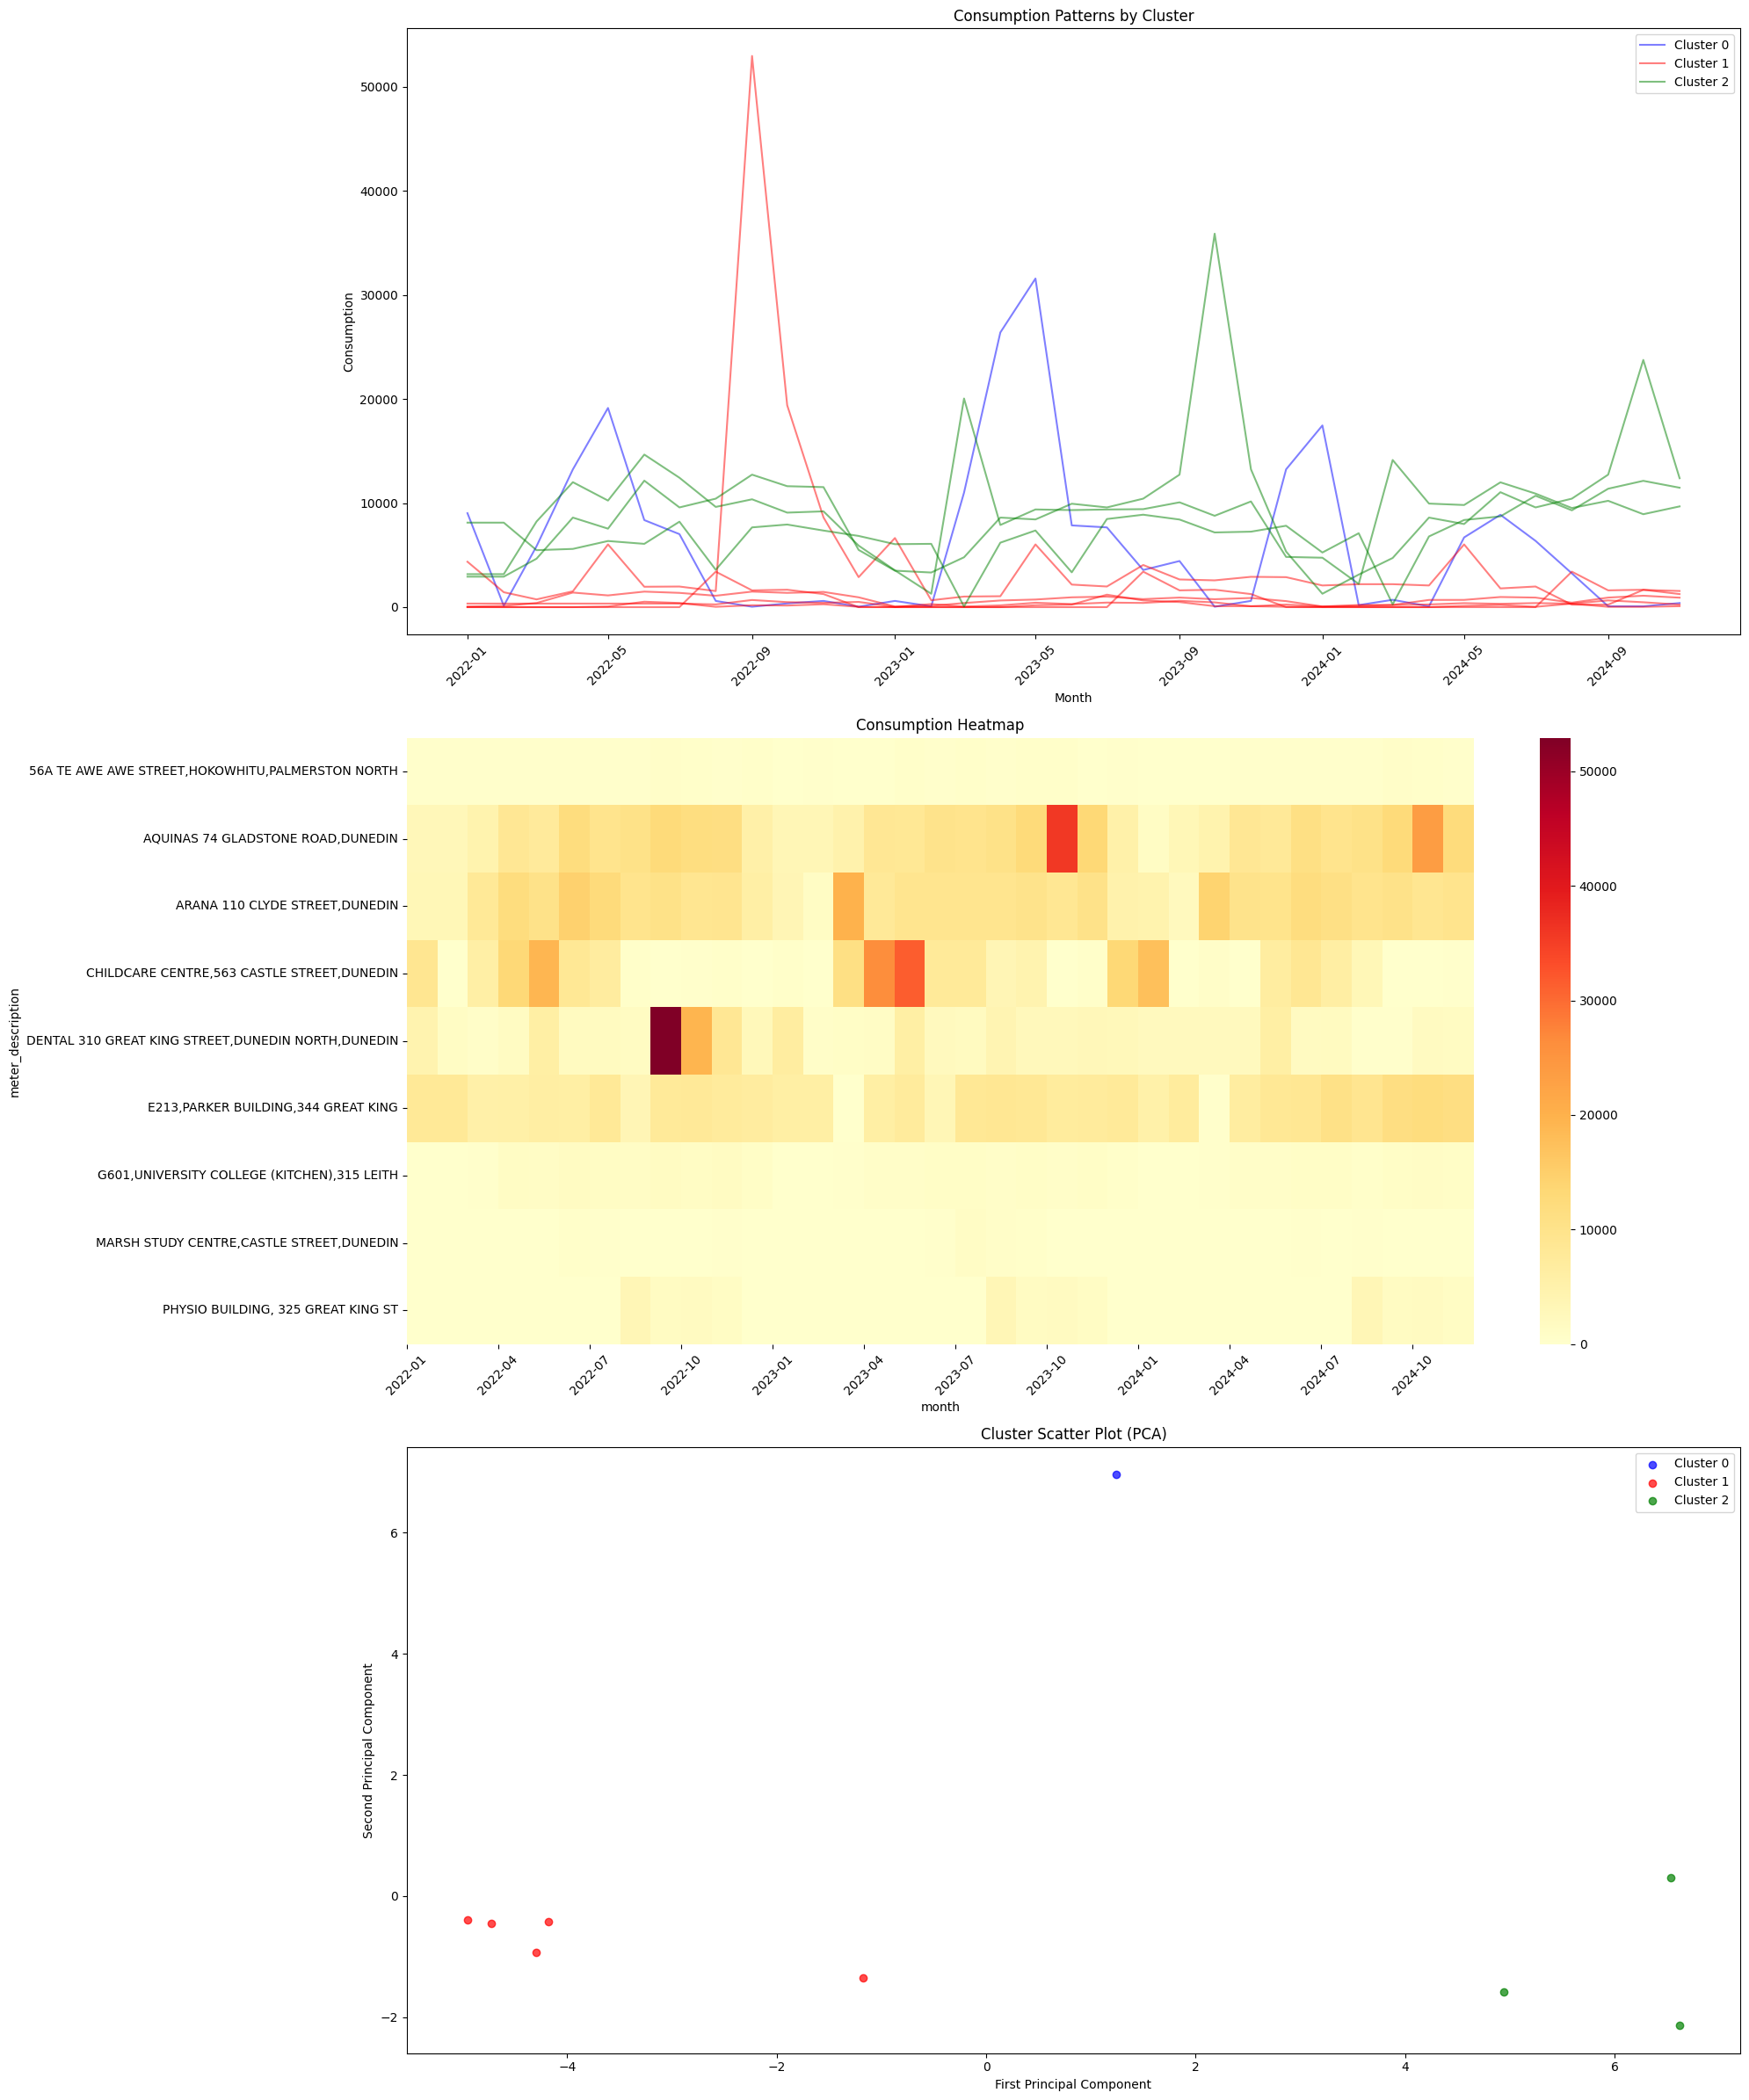


Cluster Assignments:
                                            Building  Cluster
0   56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH        1
1                  AQUINAS 74 GLADSTONE ROAD,DUNEDIN        2
2                     ARANA 110 CLYDE STREET,DUNEDIN        2
3         CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN        0
4  DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUN...        1
5                E213,PARKER BUILDING,344 GREAT KING        2
6        G601,UNIVERSITY COLLEGE (KITCHEN),315 LEITH        1
7           MARSH STUDY CENTRE,CASTLE STREET,DUNEDIN        1
8                 PHYSIO BUILDING, 325 GREAT KING ST        1


In [15]:
def perform_clustering_analysis(gas_filtered):
    # Prepare data
    pivot_data = gas_filtered.pivot(index='meter_description', 
                                  columns='month', 
                                  values='consumption')
    
    # Standardize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(pivot_data)
    
    # K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Visualizations
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 24))
    
    # Define distinct colors for clusters
    cluster_colors = ['blue', 'red', 'green']
    
    # Plot 1: Consumption patterns by cluster
    for i in range(3):
        cluster_data = pivot_data[clusters == i]
        for idx in cluster_data.index:
            ax1.plot(cluster_data.loc[idx], 
                    color=cluster_colors[i],
                    alpha=0.5,
                    label=f'Cluster {i}' if idx == cluster_data.index[0] else "")
    
    ax1.set_title('Consumption Patterns by Cluster')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Consumption')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Consumption heatmap
    sns.heatmap(pivot_data, ax=ax2, cmap='YlOrRd')
    ax2.set_title('Consumption Heatmap')
    
    # Format x-axis labels for heatmap
    x_ticks = np.arange(0, len(pivot_data.columns), 3)
    x_labels = pd.to_datetime(pivot_data.columns[x_ticks]).strftime('%Y-%m')
    ax2.set_xticks(x_ticks)
    ax2.set_xticklabels(x_labels, rotation=45)
    
    # Plot 3: Scatter plot of first two principal components
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    
    for i in range(3):
        mask = clusters == i
        ax3.scatter(pca_result[mask, 0], pca_result[mask, 1], 
                   color=cluster_colors[i], 
                   label=f'Cluster {i}',
                   alpha=0.7)
    
    ax3.set_title('Cluster Scatter Plot (PCA)')
    ax3.set_xlabel('First Principal Component')
    ax3.set_ylabel('Second Principal Component')
    ax3.legend()
    
    plt.tight_layout()
    plt.show()
    
    return pd.DataFrame({
        'Building': pivot_data.index,
        'Cluster': clusters
    })
clusters = perform_clustering_analysis(gas_filtered)
print("\nCluster Assignments:")
print(clusters)

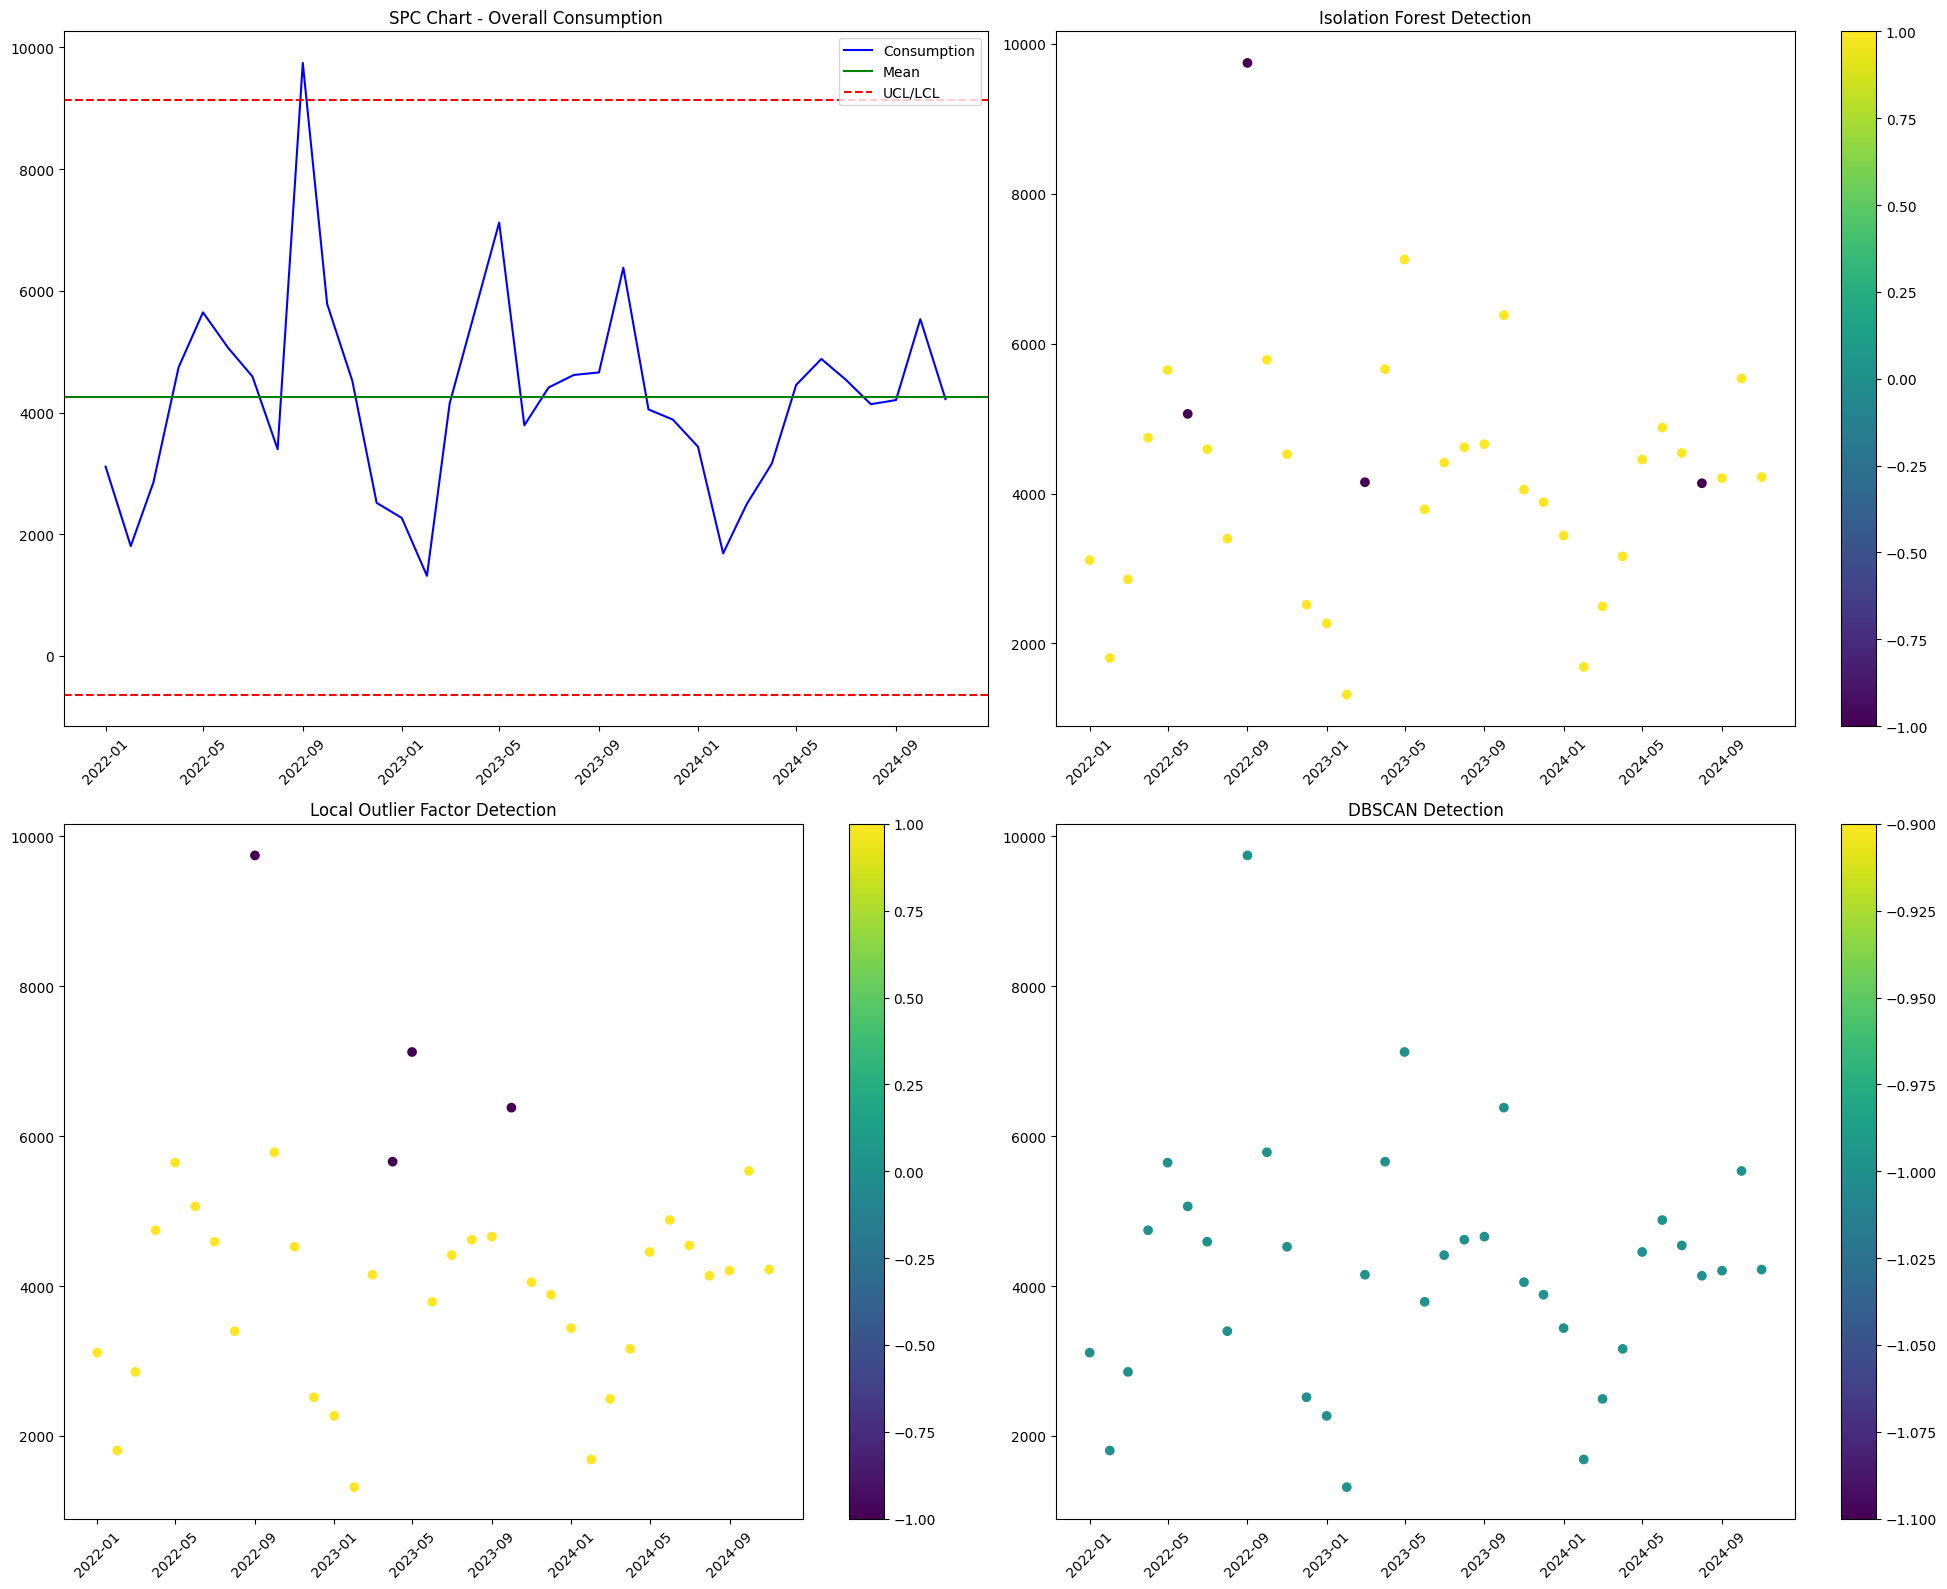

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import seaborn as sns

# Read and prepare data
gas_df = pd.read_csv(FILE_PATH)

# Melt the dataframe for time series analysis
melted_df = gas_df.melt(id_vars=['meter_description'], 
                        var_name='month', 
                        value_name='consumption')

# Convert month column to datetime
melted_df['month'] = melted_df['month'].apply(lambda x: pd.to_datetime(x.replace('_', ' ') + ' 01'))

# Filter out Eccles building
gas_filtered = melted_df[melted_df['meter_description'] != 'ECCLES GREAT KING STREET,UNIVERSITY OF']

def perform_anomaly_detection(data):
    # Prepare data for analysis
    pivot_data = data.pivot(index='meter_description', 
                           columns='month', 
                           values='consumption')
    
    # Calculate mean consumption for each month
    mean_consumption = data.groupby('month')['consumption'].mean()
    
    # 1. Statistical Process Control Charts
    def plot_spc_chart(data, title):
        mean = data.mean()
        std = data.std()
        ucl = mean + 3*std
        lcl = mean - 3*std
        
        plt.figure(figsize=(15, 6))
        plt.plot(data.index, data.values, 'b-', label='Consumption')
        plt.axhline(y=mean, color='g', linestyle='-', label='Mean')
        plt.axhline(y=ucl, color='r', linestyle='--', label='UCL/LCL')
        plt.axhline(y=lcl, color='r', linestyle='--')
        plt.title(title)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    # 2. Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_forest_labels = iso_forest.fit_predict(pivot_data.T)
    
    # 3. Local Outlier Factor
    lof = LocalOutlierFactor(contamination=0.1)
    lof_labels = lof.fit_predict(pivot_data.T)
    
    # 4. DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=3)
    dbscan_labels = dbscan.fit_predict(pivot_data.T)
    
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    
    # Plot SPC chart
    mean = mean_consumption.mean()
    std = mean_consumption.std()
    ucl = mean + 3*std
    lcl = mean - 3*std
    
    ax1.plot(mean_consumption.index, mean_consumption.values, 'b-', label='Consumption')
    ax1.axhline(y=mean, color='g', linestyle='-', label='Mean')
    ax1.axhline(y=ucl, color='r', linestyle='--', label='UCL/LCL')
    ax1.axhline(y=lcl, color='r', linestyle='--')
    ax1.set_title('SPC Chart - Overall Consumption')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot anomaly detection results
    for idx, (method, labels) in enumerate([
        ('Isolation Forest', iso_forest_labels),
        ('Local Outlier Factor', lof_labels),
        ('DBSCAN', dbscan_labels)
    ], 2):
        ax = [ax2, ax3, ax4][idx-2]
        scatter = ax.scatter(mean_consumption.index, mean_consumption.values, 
                           c=labels, cmap='viridis')
        ax.set_title(f'{method} Detection')
        ax.tick_params(axis='x', rotation=45)
        plt.colorbar(scatter, ax=ax)
    
    plt.tight_layout()
    plt.show()

# Execute anomaly detection
perform_anomaly_detection(gas_filtered)



Analysis for G601,UNIVERSITY COLLEGE (KITCHEN),315 LEITH

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        543.7741     19.365     28.081      0.000     503.503     584.045
month_1     -664.1221     89.162     -7.448      0.000    -849.545    -478.699
month_2     -603.2121     89.162     -6.765      0.000    -788.635    -417.789
month_3     -391.0854     89.162     -4.386      0.000    -576.508    -205.662
month_4      185.8079     89.162      2.084      0.050       0.385     371.231
month_5      126.2279     89.162      1.416      0.172     -59.195     311.651
month_6      411.7812     89.162      4.618      0.000     226.358     597.204
month_7      374.8012     89.162      4.204      0.000     189.378     560.224
month_8       40.4346     89.162      0.453      0.655    -144.988     225.858
month_9      385.4079     89.162      4.323

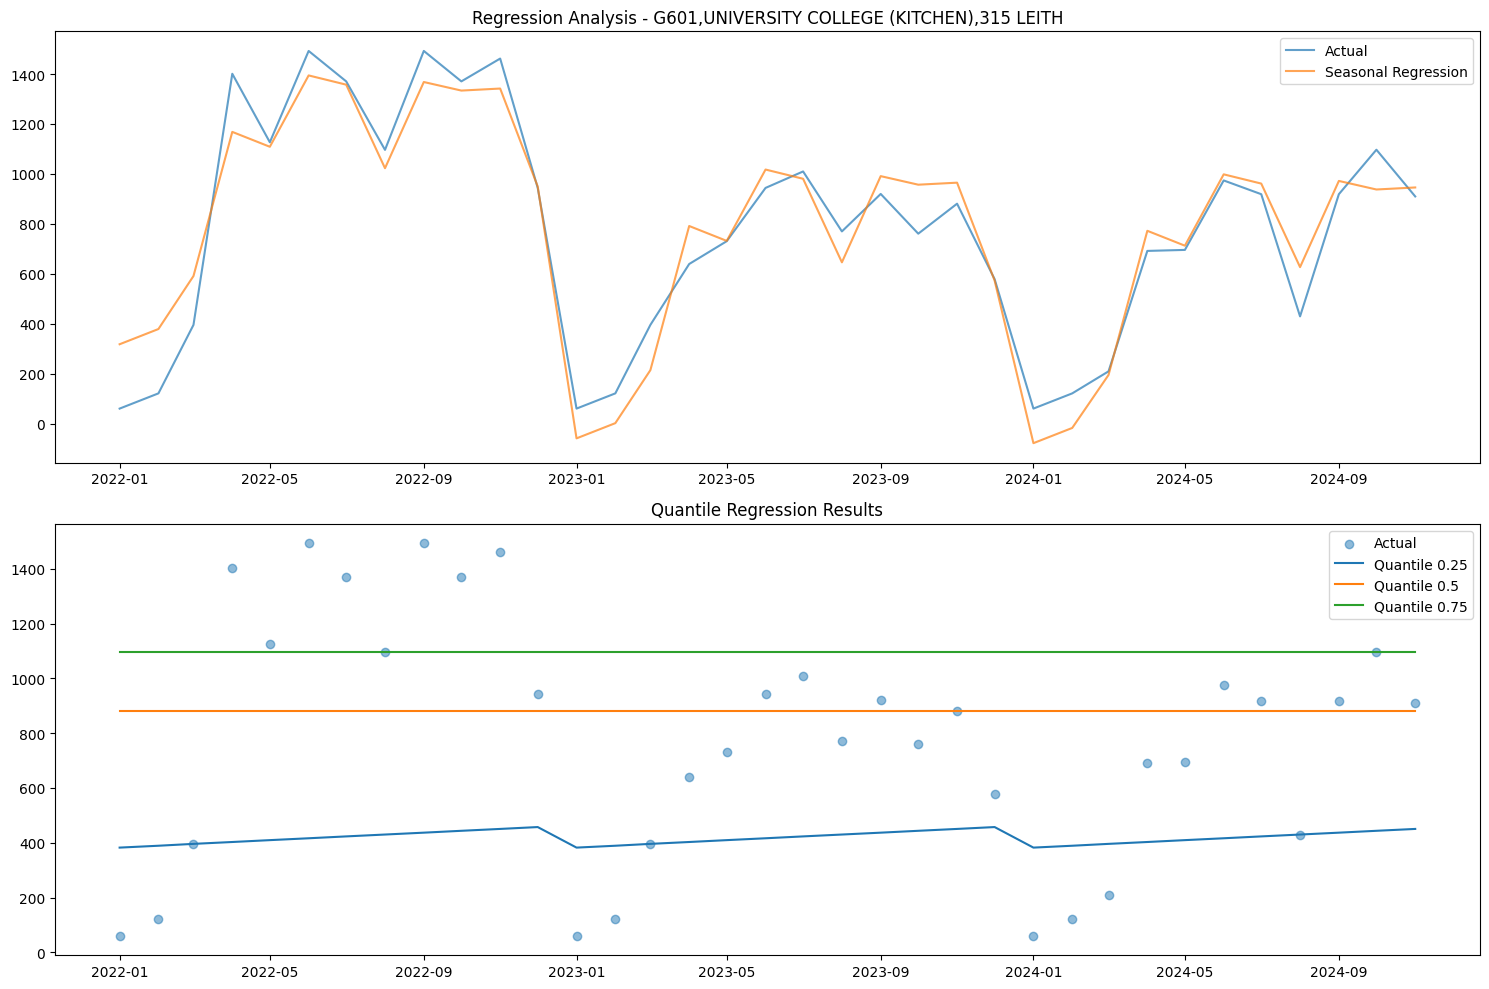


Analysis for E213,PARKER BUILDING,344 GREAT KING

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5078.4330    229.578     22.121      0.000    4600.999    5555.867
month_1     -299.7073   1057.070     -0.284      0.780   -2498.005    1898.590
month_2      327.2594   1057.070      0.310      0.760   -1871.038    2525.557
month_3    -4837.2840   1057.070     -4.576      0.000   -7035.581   -2638.987
month_4     -578.4006   1057.070     -0.547      0.590   -2776.698    1619.897
month_5      591.1060   1057.070      0.559      0.582   -1607.191    2789.403
month_6     -724.1973   1057.070     -0.685      0.501   -2922.495    1474.100
month_7     2353.1327   1057.070      2.226      0.037     154.835    4551.430
month_8      484.1760   1057.070      0.458      0.652   -1714.121    2682.473
month_9     2379.3960   1057.070      2.251      0.

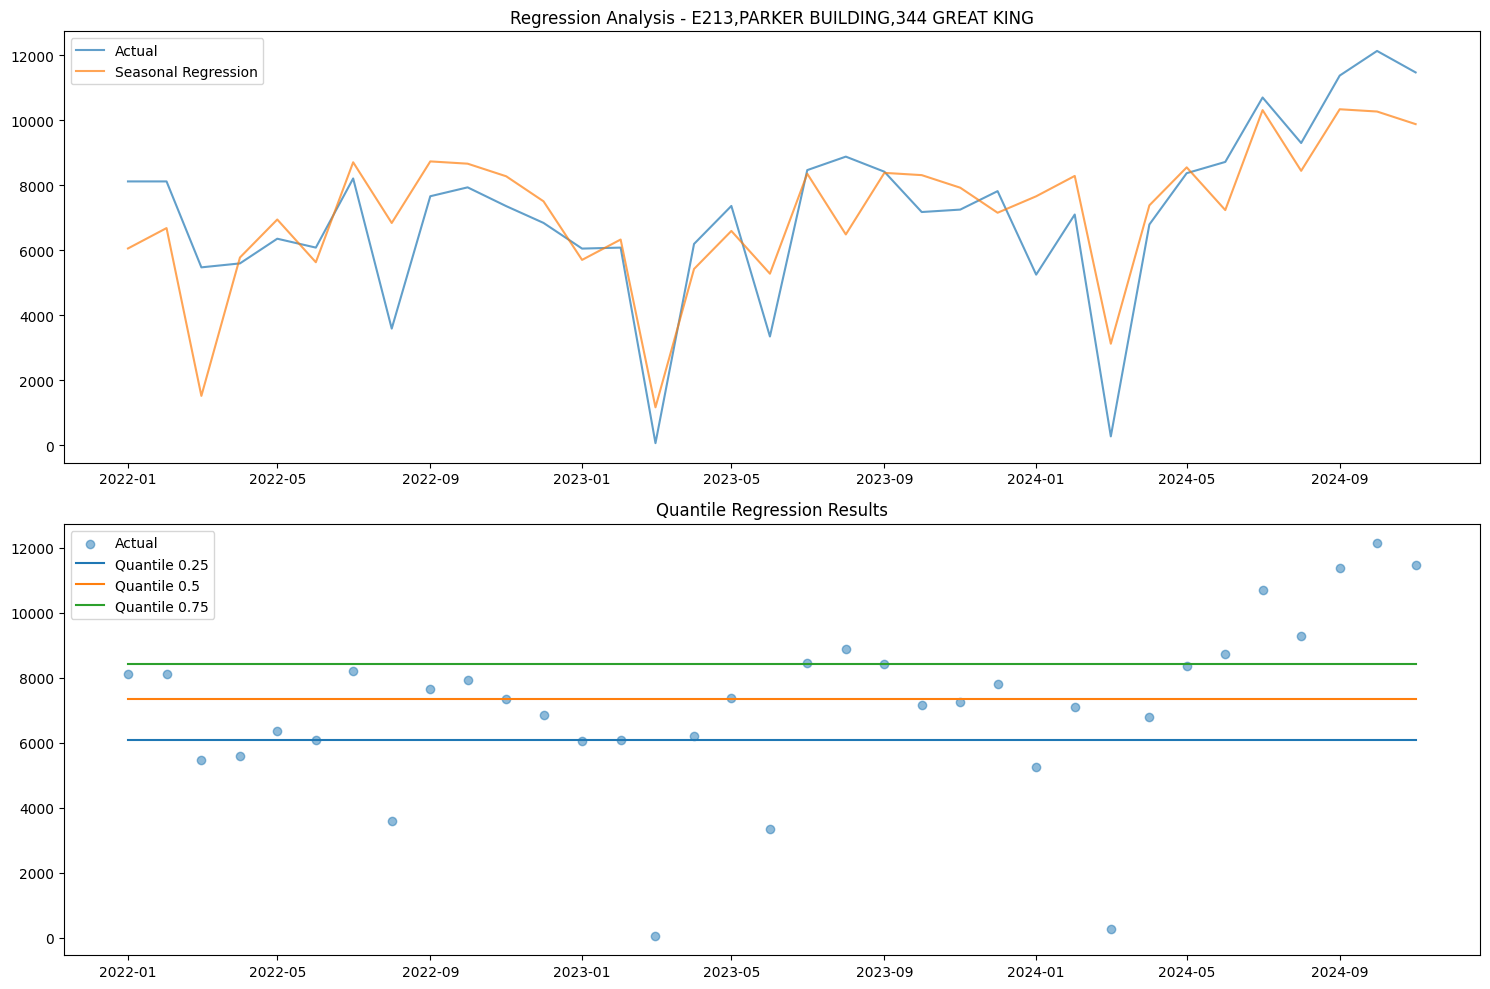


Analysis for ARANA 110 CLYDE STREET,DUNEDIN

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6269.2707    263.804     23.765      0.000    5720.660    6817.881
month_1    -4542.0643   1214.659     -3.739      0.001   -7068.086   -2016.043
month_2    -6131.7076   1214.659     -5.048      0.000   -8657.729   -3605.686
month_3     5774.6724   1214.659      4.754      0.000    3248.651    8300.694
month_4     1588.6724   1214.659      1.308      0.205    -937.349    4114.694
month_5     1451.5624   1214.659      1.195      0.245   -1074.459    3977.584
month_6     3630.0024   1214.659      2.988      0.007    1103.981    6156.024
month_7     2545.8757   1214.659      2.096      0.048      19.854    5071.897
month_8     1161.3691   1214.659      0.956      0.350   -1364.653    3687.391
month_9     1854.4791   1214.659      1.527      0.142  

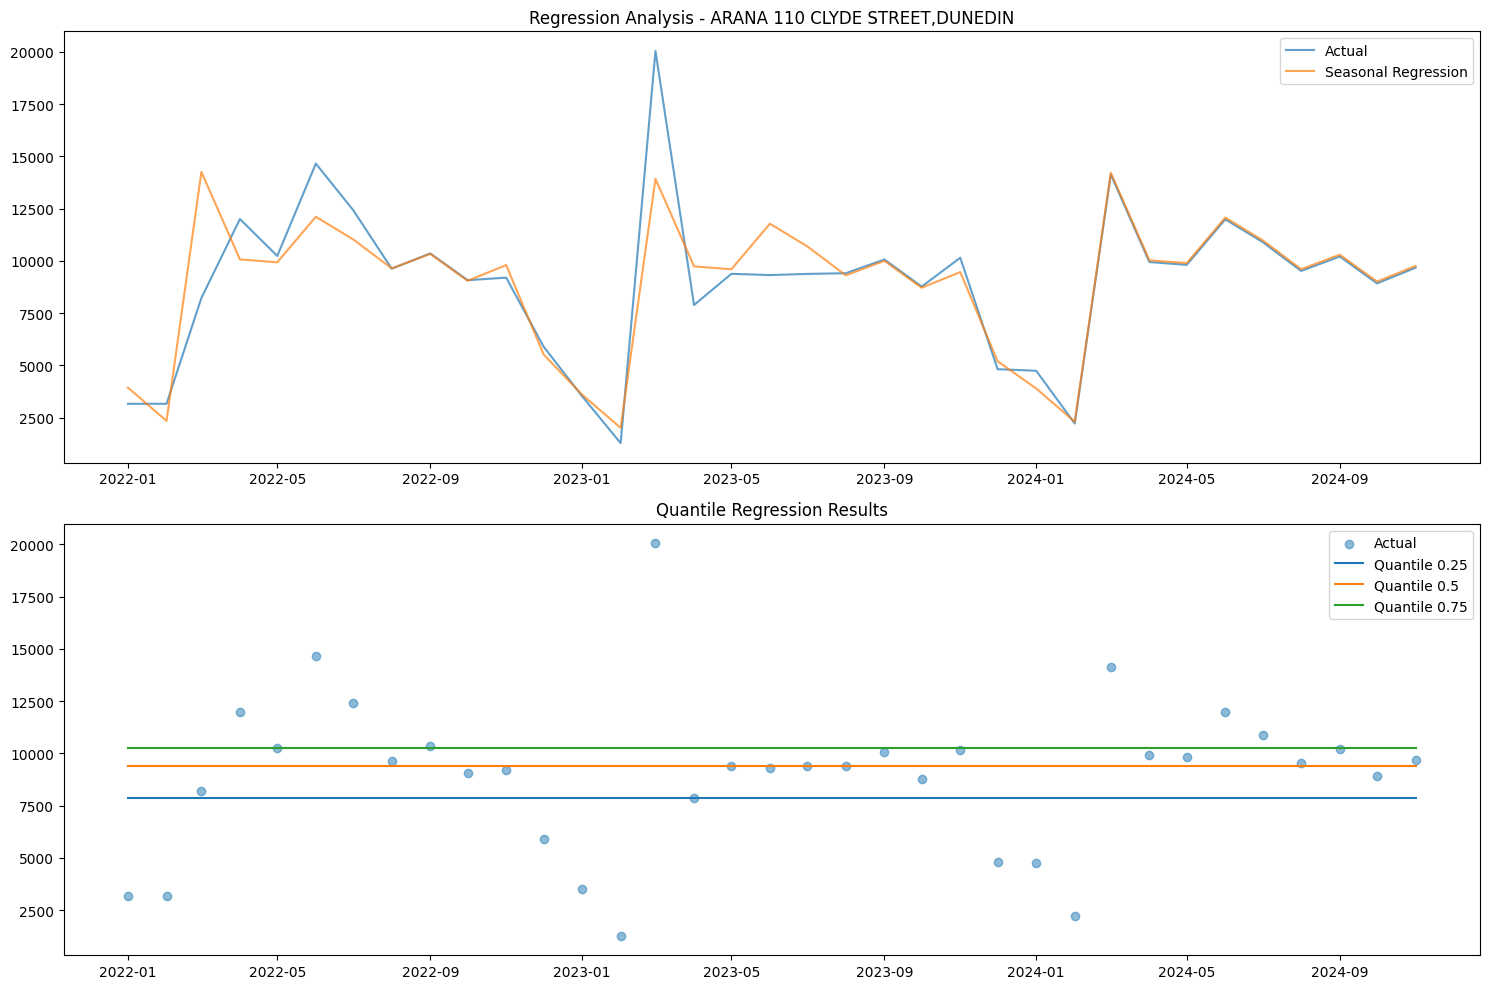


Analysis for DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUNEDIN

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3117.0510   1083.656      2.876      0.009     863.464    5370.637
month_1      204.7954   4989.585      0.041      0.968   -1.02e+04    1.06e+04
month_2    -2723.3446   4989.585     -0.546      0.591   -1.31e+04    7653.065
month_3    -2834.2546   4989.585     -0.568      0.576   -1.32e+04    7542.155
month_4    -2604.4213   4989.585     -0.522      0.607    -1.3e+04    7771.988
month_5     1870.0320   4989.585      0.375      0.712   -8506.377    1.22e+04
month_6    -2181.6613   4989.585     -0.437      0.666   -1.26e+04    8194.748
month_7    -2174.7713   4989.585     -0.436      0.667   -1.26e+04    8201.638
month_8    -2210.9646   4989.585     -0.443      0.662   -1.26e+04    8165.445
month_9     1.446e+04   4989.585    

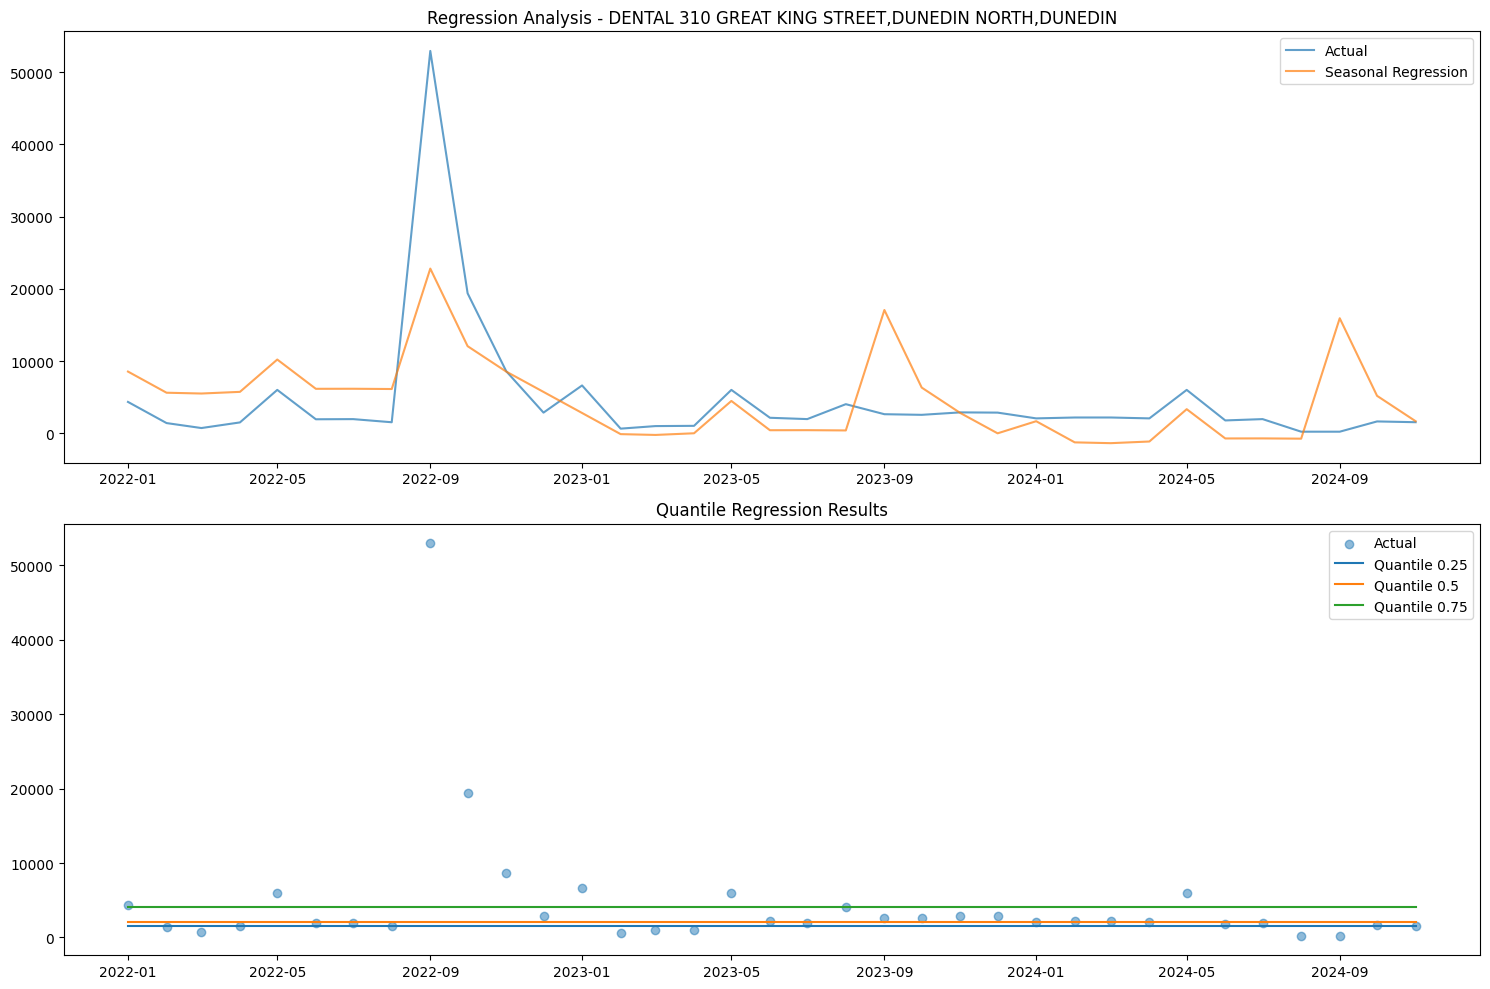


Analysis for ECCLES GREAT KING STREET,UNIVERSITY OF

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.115e+05   6275.216     33.698      0.000    1.98e+05    2.25e+05
month_1     -3.42e+04   2.89e+04     -1.184      0.250   -9.43e+04    2.59e+04
month_2    -4.885e+04   2.89e+04     -1.691      0.106   -1.09e+05    1.12e+04
month_3    -5.546e+04   2.89e+04     -1.920      0.069   -1.16e+05    4624.342
month_4     3.808e+04   2.89e+04      1.318      0.202    -2.2e+04    9.82e+04
month_5    -5562.2105   2.89e+04     -0.193      0.849   -6.56e+04    5.45e+04
month_6     2.556e+04   2.89e+04      0.885      0.386   -3.45e+04    8.56e+04
month_7     5.589e+04   2.89e+04      1.934      0.067   -4194.013    1.16e+05
month_8     8.538e+04   2.89e+04      2.955      0.008    2.53e+04    1.45e+05
month_9      1.02e+05   2.89e+04      3.529     

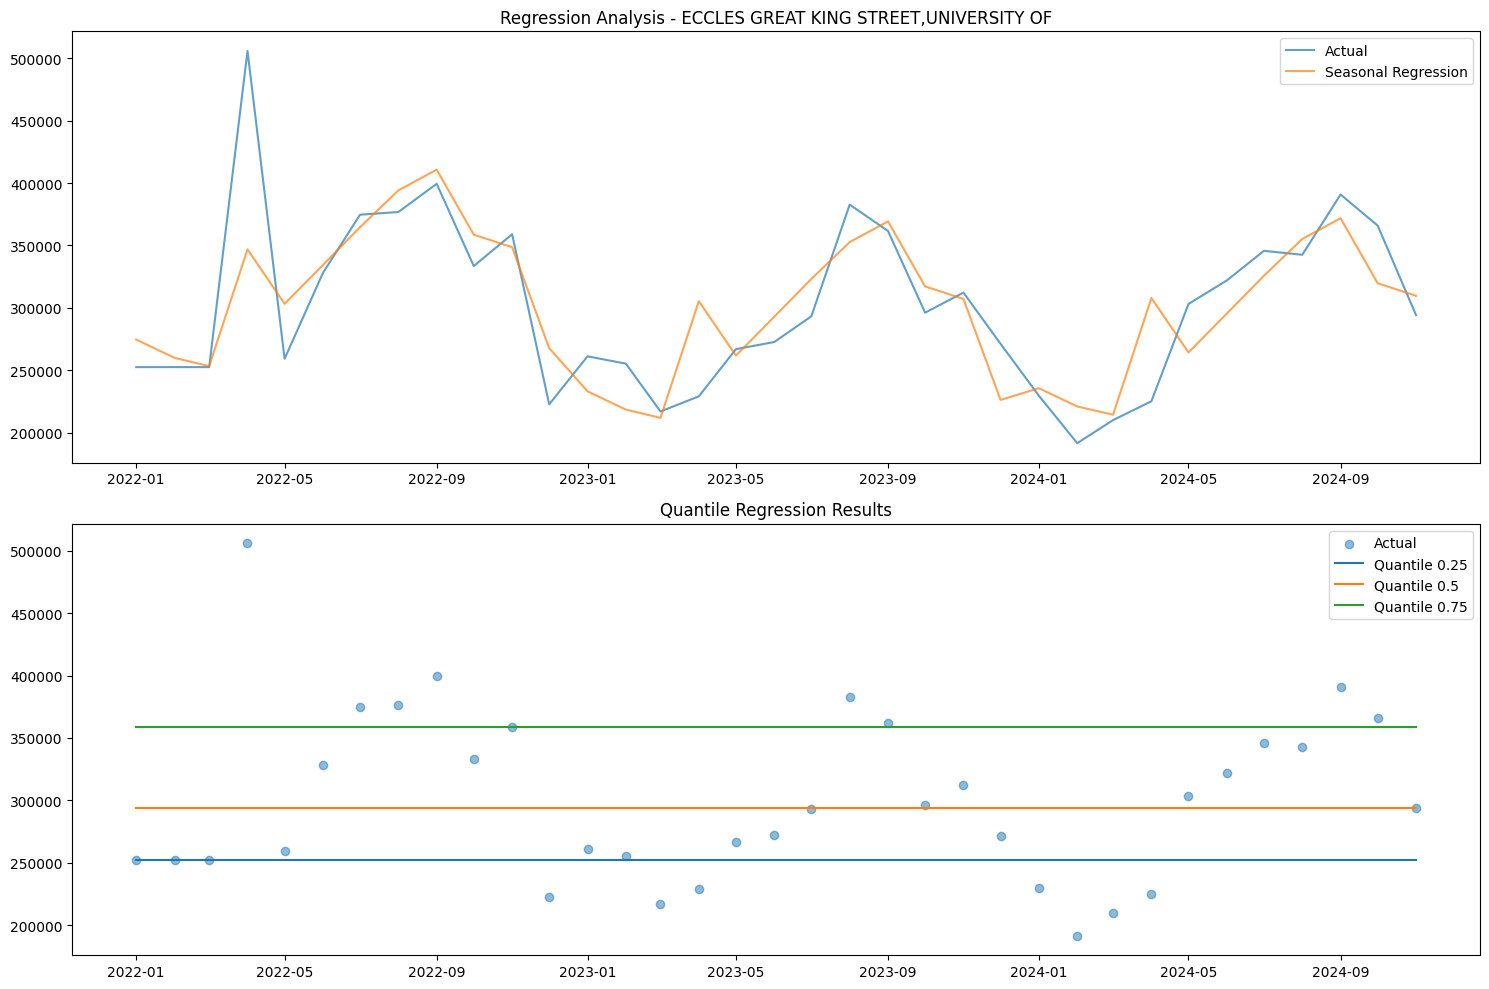


Analysis for MARSH STUDY CENTRE,CASTLE STREET,DUNEDIN

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.7661     25.021      4.227      0.000      53.732     157.801
month_1     -141.0215    115.208     -1.224      0.234    -380.609      98.566
month_2     -141.0215    115.208     -1.224      0.234    -380.609      98.566
month_3     -141.0215    115.208     -1.224      0.234    -380.609      98.566
month_4     -141.0215    115.208     -1.224      0.234    -380.609      98.566
month_5      -18.0815    115.208     -0.157      0.877    -257.669     221.506
month_6      186.1052    115.208      1.615      0.121     -53.482     425.693
month_7      401.8318    115.208      3.488      0.002     162.244     641.419
month_8      196.8485    115.208      1.709      0.102     -42.739     436.436
month_9       93.7818    115.208      0.814   

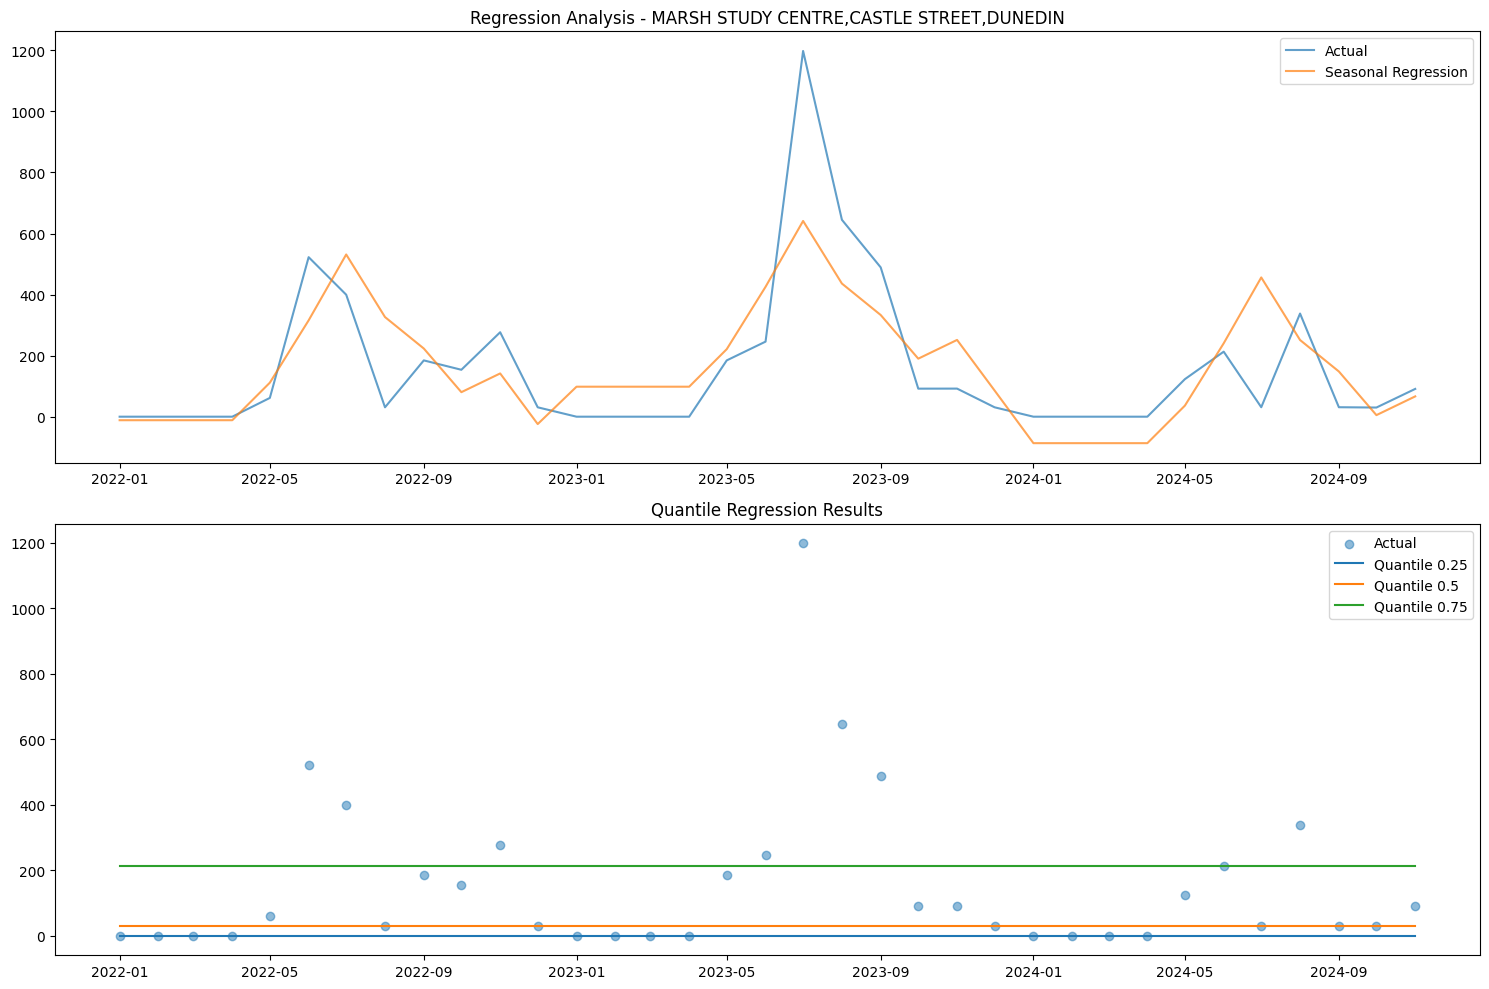


Analysis for CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4294.6773    745.819      5.758      0.000    2743.662    5845.693
month_1     3299.1736   3434.048      0.961      0.348   -3842.320    1.04e+04
month_2    -5588.3831   3434.048     -1.627      0.119   -1.27e+04    1553.111
month_3      126.1736   3434.048      0.037      0.971   -7015.320    7267.668
month_4     7505.0836   3434.048      2.185      0.040     363.590    1.46e+04
month_5      1.34e+04   3434.048      3.903      0.001    6263.126    2.05e+04
month_6     2634.4236   3434.048      0.767      0.452   -4507.070    9775.918
month_7     1286.7636   3434.048      0.375      0.712   -5854.730    8428.258
month_8    -3255.6298   3434.048     -0.948      0.354   -1.04e+04    3885.864
month_9    -4209.6198   3434.048     -1.226 

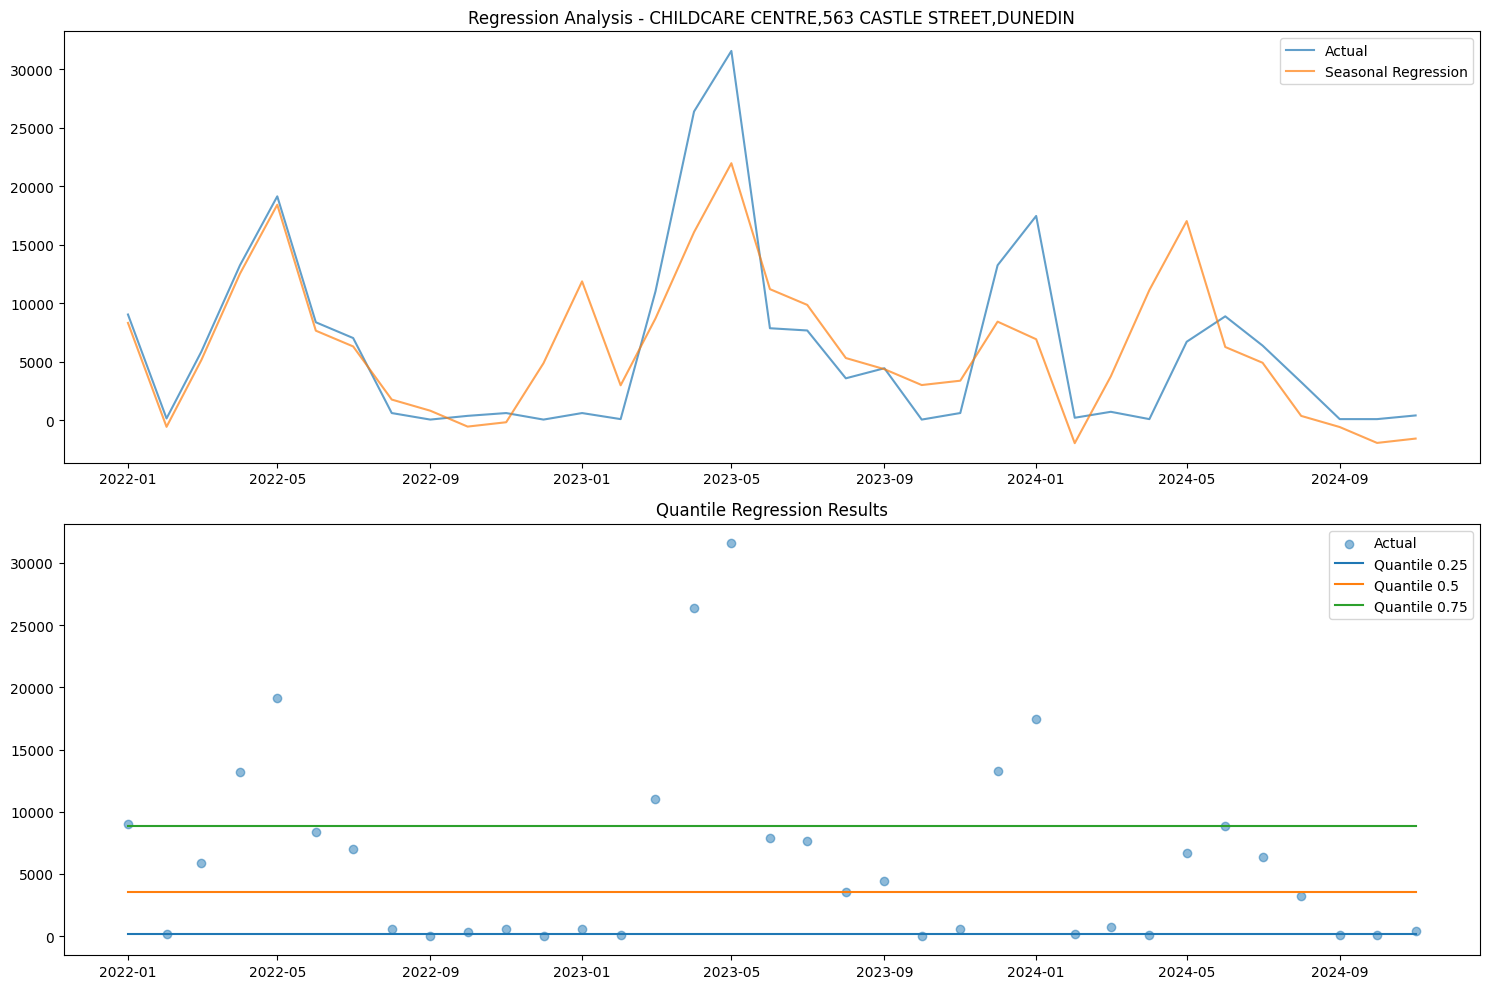


Analysis for PHYSIO BUILDING, 325 GREAT KING ST

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.5294   9.49e-14   4.93e+15      0.000     467.529     467.529
month_1     -623.3725   4.37e-13  -1.43e+15      0.000    -623.373    -623.373
month_2     -623.3725   4.37e-13  -1.43e+15      0.000    -623.373    -623.373
month_3     -623.3725   4.37e-13  -1.43e+15      0.000    -623.373    -623.373
month_4     -623.3725   4.37e-13  -1.43e+15      0.000    -623.373    -623.373
month_5     -623.3725   4.37e-13  -1.43e+15      0.000    -623.373    -623.373
month_6     -623.3725   4.37e-13  -1.43e+15      0.000    -623.373    -623.373
month_7     -623.3725   4.37e-13  -1.43e+15      0.000    -623.373    -623.373
month_8     2784.6275   4.37e-13   6.37e+15      0.000    2784.627    2784.627
month_9      988.6275   4.37e-13   2.26e+15      0.0

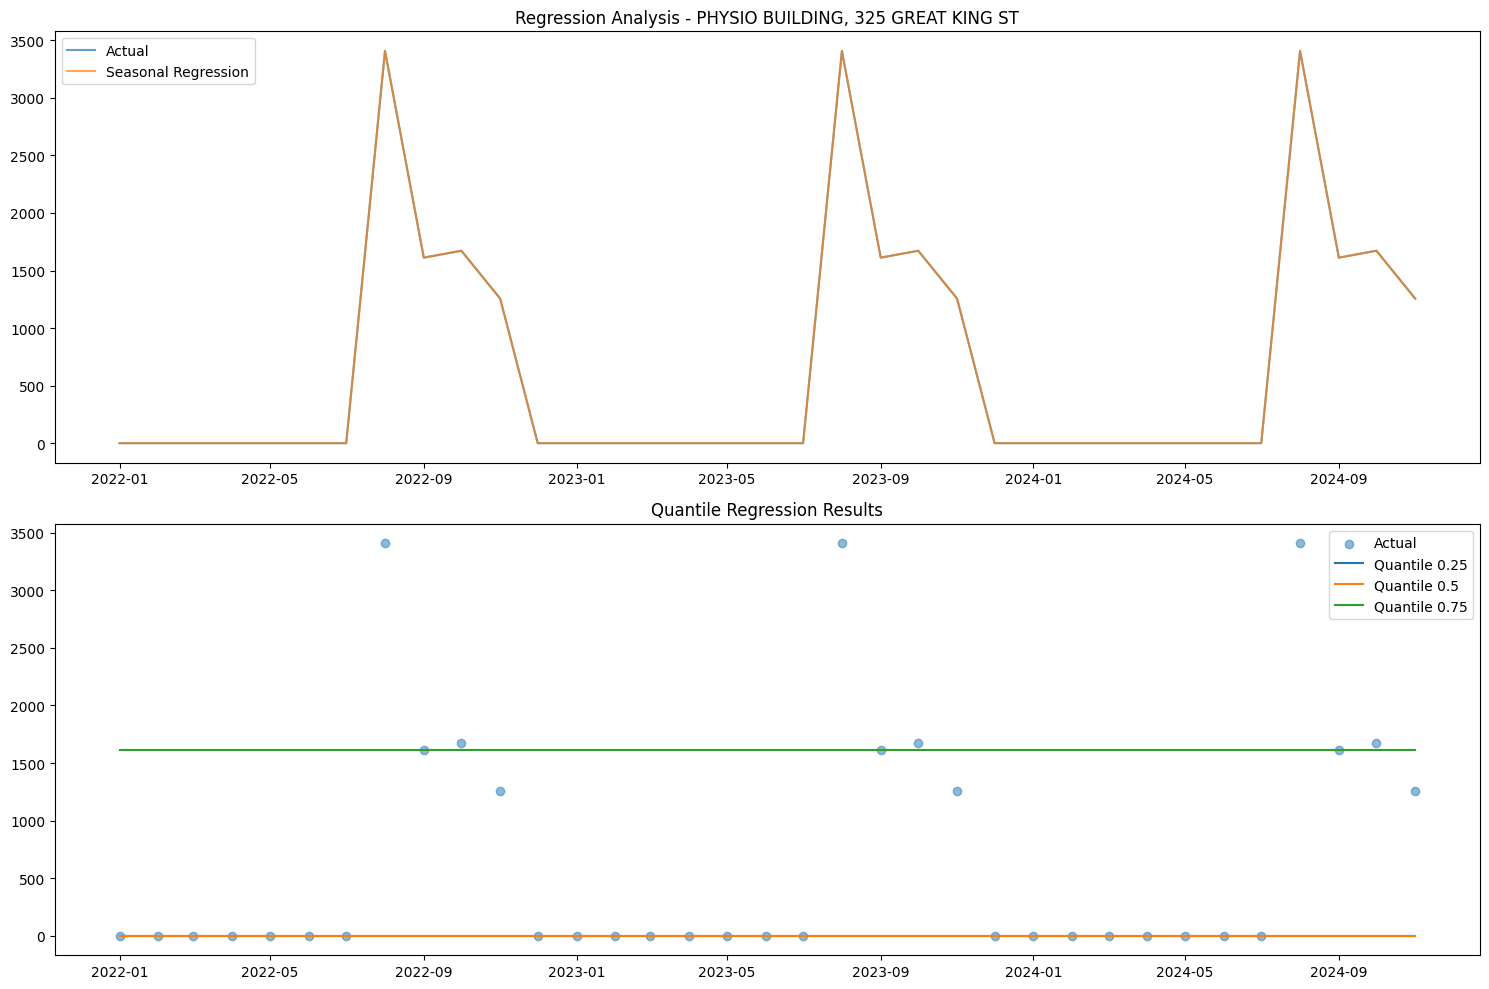


Analysis for AQUINAS 74 GLADSTONE ROAD,DUNEDIN

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6603.8907    434.253     15.207      0.000    5700.811    7506.970
month_1    -6232.5043   1999.475     -3.117      0.005   -1.04e+04   -2074.367
month_2    -5678.8510   1999.475     -2.840      0.010   -9836.988   -1520.714
month_3    -4082.4276   1999.475     -2.042      0.054   -8240.564      75.709
month_4     -202.2276   1999.475     -0.101      0.920   -4360.364    3955.909
month_5     -823.0576   1999.475     -0.412      0.685   -4981.194    3335.079
month_6     2236.7624   1999.475      1.119      0.276   -1921.374    6394.899
month_7      773.3724   1999.475      0.387      0.703   -3384.764    4931.509
month_8     1615.9224   1999.475      0.808      0.428   -2542.214    5774.059
month_9     3921.8724   1999.475      1.961      0.06

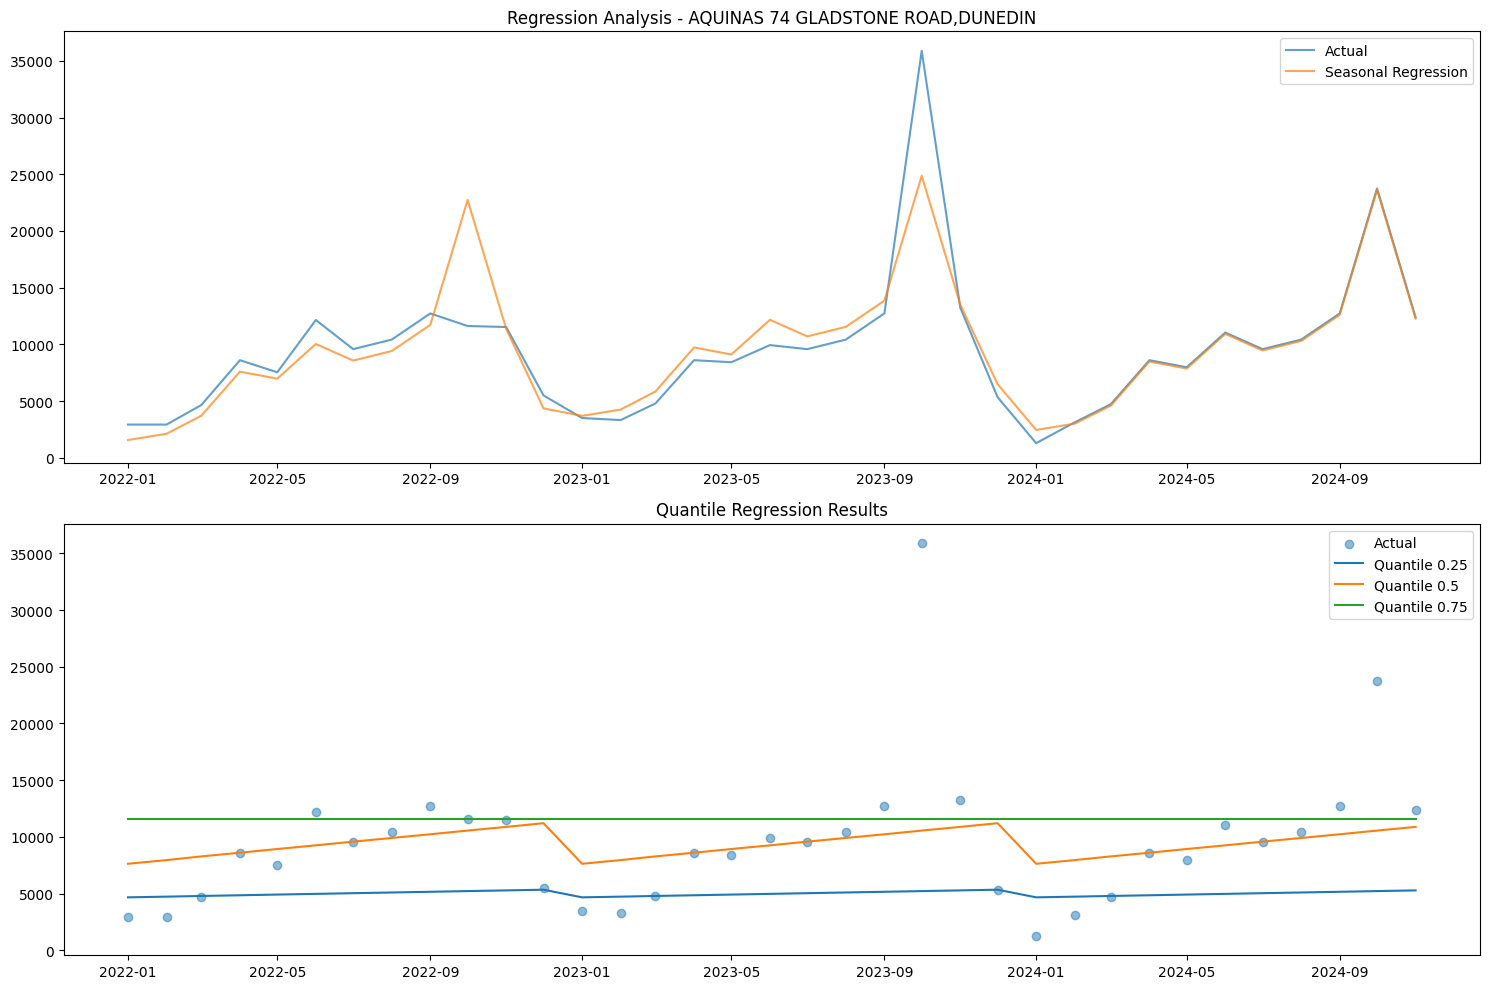


Analysis for 56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH

Seasonal Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        237.8265     10.785     22.052      0.000     215.399     260.254
month_1     -172.6587     49.657     -3.477      0.002    -275.926     -69.391
month_2      -36.4120     49.657     -0.733      0.471    -139.679      66.855
month_3     -116.7654     49.657     -2.351      0.029    -220.033     -13.498
month_4      -59.5254     49.657     -1.199      0.244    -162.793      43.742
month_5       66.3980     49.657      1.337      0.195     -36.869     169.665
month_6        3.4313     49.657      0.069      0.946     -99.836     106.699
month_7       73.6146     49.657      1.482      0.153     -29.653     176.882
month_8       16.5480     49.657      0.333      0.742     -86.719     119.815
month_9      330.8313     49.657      

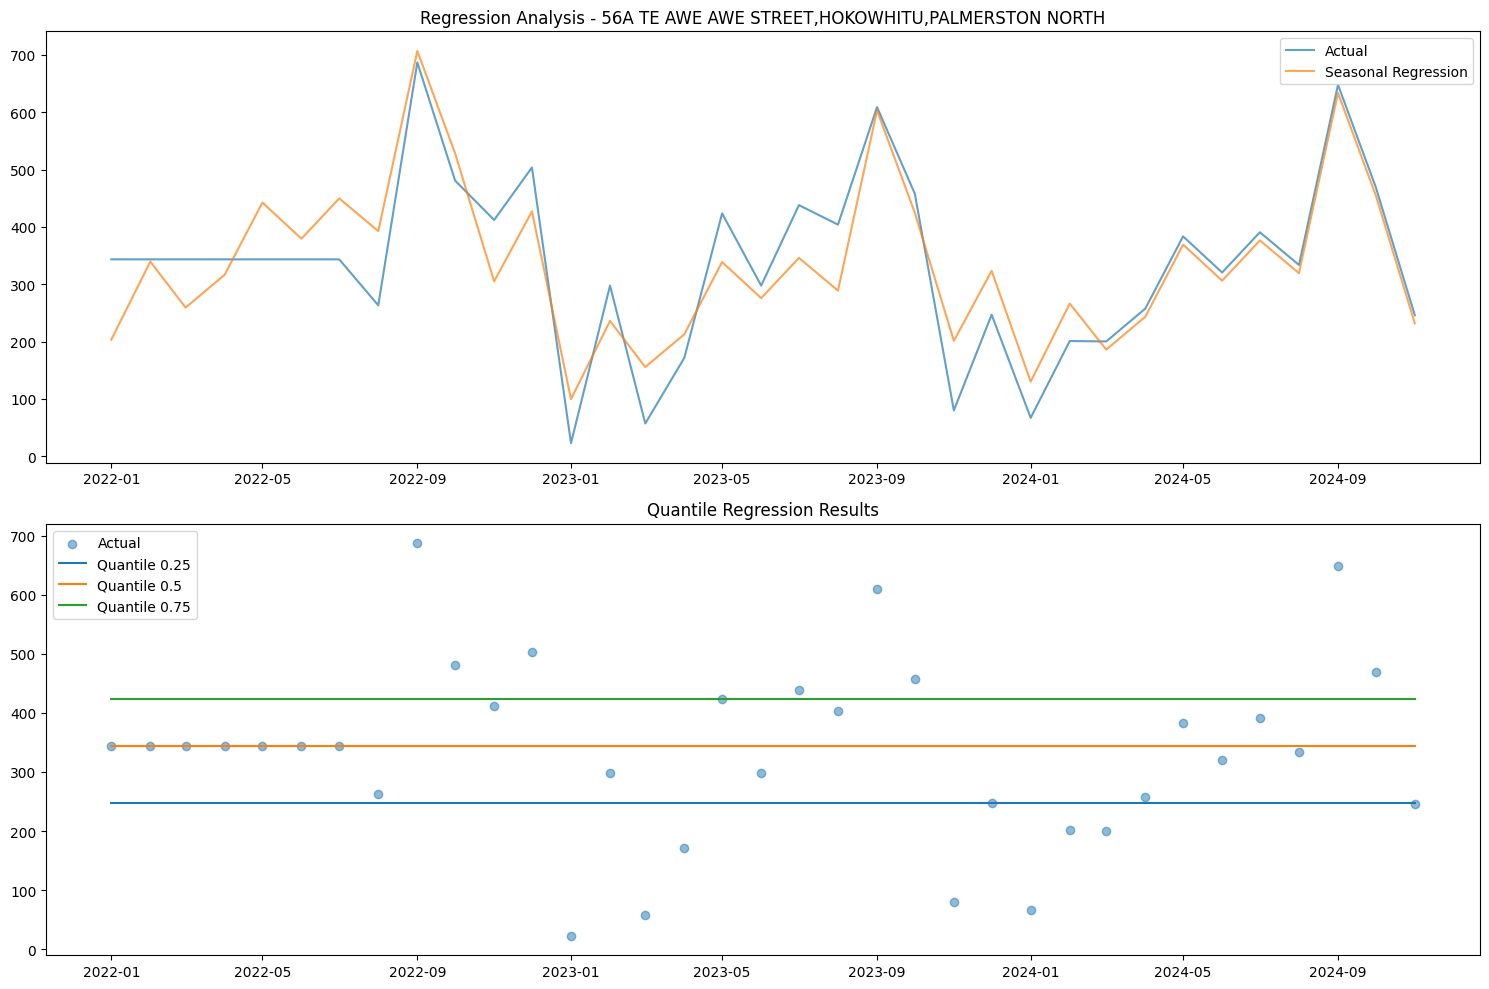

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, QuantileRegressor
from statsmodels.gam.api import GLMGam, BSplines
import statsmodels.api as sm

def prepare_time_features(data):
    # Create time-based features
    data['month_num'] = data['month'].dt.month
    data['year'] = data['month'].dt.year
    
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Summer'
        elif month in [3, 4, 5]:
            return 'Autumn'
        elif month in [6, 7, 8]:
            return 'Winter'
        else:  # [9, 10, 11]
            return 'Spring'
    
    data['season'] = data['month_num'].apply(get_season)
    # Create dummy variables for seasons
    season_dummies = pd.get_dummies(data['season'], prefix='season')
    
    # Ensure all numeric columns are float
    data['consumption'] = data['consumption'].astype(float)
    return pd.concat([data, season_dummies], axis=1)

def multiple_regression_with_seasonal(data):
    # Prepare features - ensure numeric type
    X = pd.concat([
        pd.get_dummies(data['month_num'], prefix='month'),
        pd.get_dummies(data['year'], prefix='year')
    ], axis=1).astype(float)  # Convert to float
    
    y = data['consumption'].astype(float)  # Convert to float
    
    # Fit model
    model = sm.OLS(y, sm.add_constant(X))
    results = model.fit()
    return results

def quantile_regression(data):
    # Prepare features
    X = data[['month_num', 'year']]
    y = data['consumption']
    
    # Fit models for different quantiles
    quantiles = [0.25, 0.5, 0.75]
    models = {}
    for q in quantiles:
        qr = QuantileRegressor(quantile=q, alpha=1)
        qr.fit(X, y)
        models[q] = qr
    return models

def polynomial_regression(data, degree=2):
    # Prepare features
    X = data[['month_num']]
    y = data['consumption']
    
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)
    return model, poly



gas_df = pd.read_csv(FILE_PATH)

# Melt the dataframe for time series analysis
melted_df = gas_df.melt(id_vars=['meter_description'], 
                        var_name='month', 
                        value_name='consumption')

# Convert month column to datetime
melted_df['month'] = melted_df['month'].apply(lambda x: pd.to_datetime(x.replace('_', ' ') + ' 01'))

# Filter out Eccles building
gas_filtered = melted_df#[melted_df['meter_description'] != 'ECCLES GREAT KING STREET,UNIVERSITY OF']


# Execute analysis for each building
for meter in gas_filtered['meter_description'].unique():
    building_data = gas_filtered[gas_filtered['meter_description'] == meter].copy()
    building_data = prepare_time_features(building_data)
    
    print(f"\nAnalysis for {meter}")
    
    # 1. Multiple regression with seasonal indicators
    seasonal_model = multiple_regression_with_seasonal(building_data)
    print("\nSeasonal Regression Results:")
    print(seasonal_model.summary().tables[1])
    
    # 2. Quantile regression
    quantile_models = quantile_regression(building_data)
    
    # 3. Polynomial regression
    poly_model, poly_features = polynomial_regression(building_data)
    
    # Visualize results
    plt.figure(figsize=(15, 10))
    
    # Plot actual vs predicted values
    plt.subplot(2, 1, 1)
    plt.plot(building_data['month'], building_data['consumption'], 
             label='Actual', alpha=0.7)
    plt.plot(building_data['month'], seasonal_model.fittedvalues, 
             label='Seasonal Regression', alpha=0.7)
    plt.title(f'Regression Analysis - {meter}')
    plt.legend()
    
    # Plot quantile regression results
    plt.subplot(2, 1, 2)
    plt.scatter(building_data['month'], building_data['consumption'], 
               alpha=0.5, label='Actual')
    for q, model in quantile_models.items():
        plt.plot(building_data['month'], 
                model.predict(building_data[['month_num', 'year']]),
                label=f'Quantile {q}')
    plt.title('Quantile Regression Results')
    plt.legend()
    
    plt.tight_layout()
    plt.show()



Validation Results for G601,UNIVERSITY COLLEGE (KITCHEN),315 LEITH

Cross-Validation Metrics:

Fold 1:
MSE: 243374.4431
RMSE: 493.3300
MAE: 368.6513
MAPE: 45.0648
R2: -0.9781

Fold 2:
MSE: 52240.8579
RMSE: 228.5626
MAE: 200.8900
MAPE: 80.2794
R2: 0.5236

Fold 3:
MSE: 58874.4031
RMSE: 242.6405
MAE: 223.4775
MAPE: 32.7565
R2: -0.5132


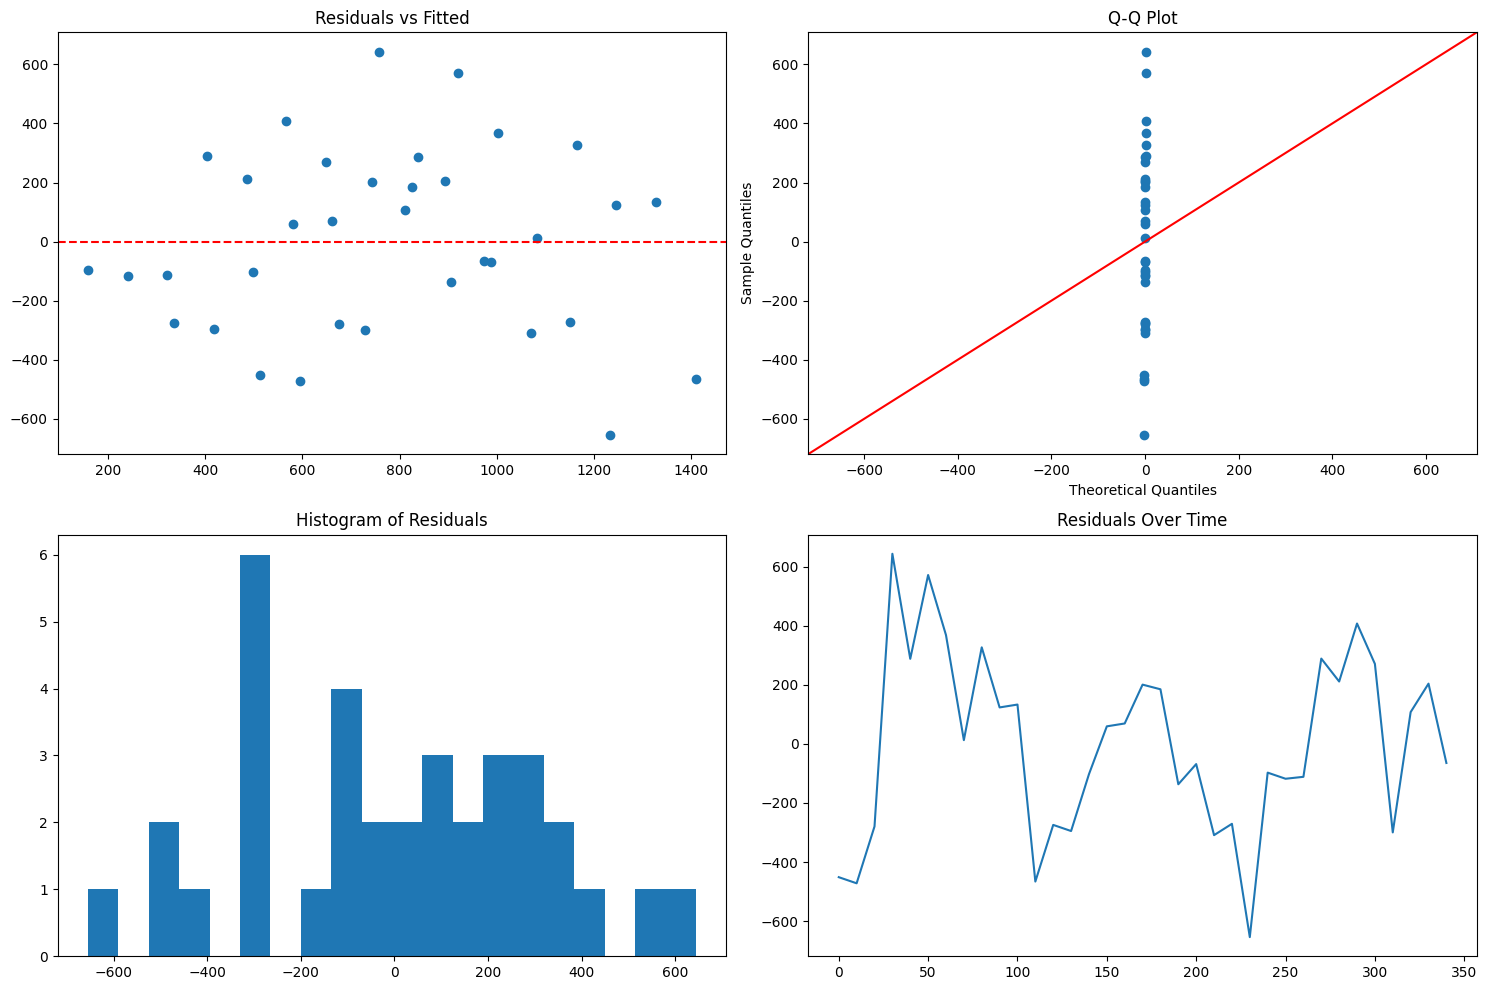


Validation Results for E213,PARKER BUILDING,344 GREAT KING

Cross-Validation Metrics:

Fold 1:
MSE: 6032820.4950
RMSE: 2456.1801
MAE: 1924.1075
MAPE: 1136.8371
R2: 0.0228

Fold 2:
MSE: 9637583.1697
RMSE: 3104.4457
MAE: 2517.1040
MAPE: 178.4085
R2: -0.4592

Fold 3:
MSE: 21174158.1529
RMSE: 4601.5387
MAE: 4435.3463
MAPE: 44.6261
R2: -6.0531


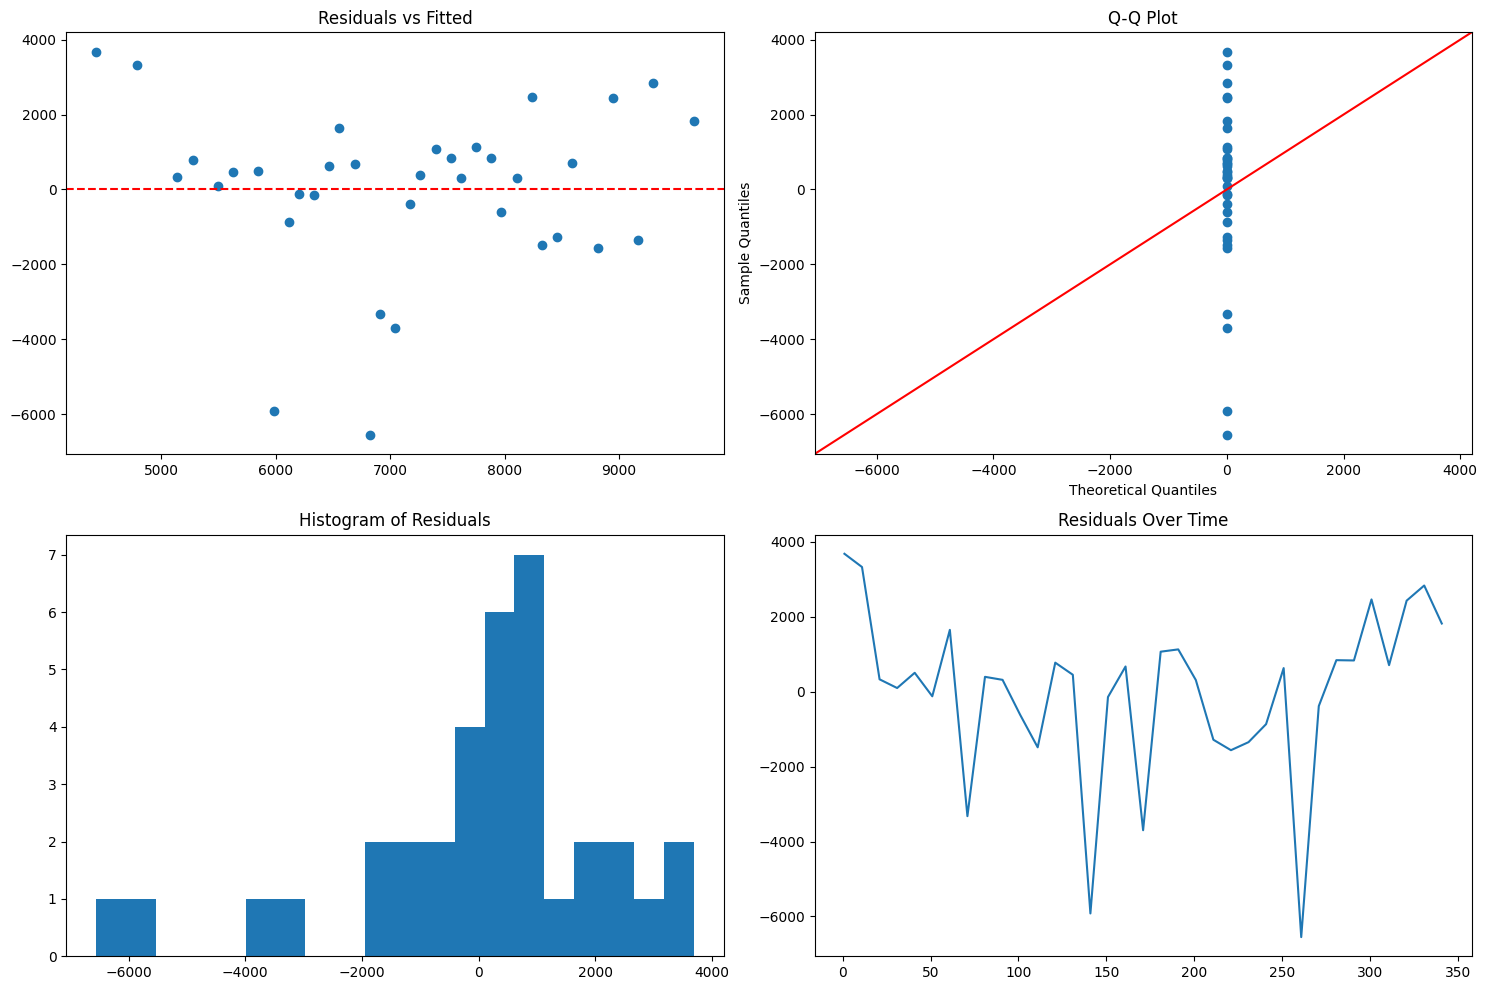


Validation Results for ARANA 110 CLYDE STREET,DUNEDIN

Cross-Validation Metrics:

Fold 1:
MSE: 25771967.5951
RMSE: 5076.6099
MAE: 3769.3863
MAPE: 51.6284
R2: 0.0586

Fold 2:
MSE: 489736.2409
RMSE: 699.8116
MAE: 518.7381
MAPE: 8.5740
R2: 0.9620

Fold 3:
MSE: 216706.1549
RMSE: 465.5171
MAE: 465.5171
MAPE: 4.6312
R2: 0.7214


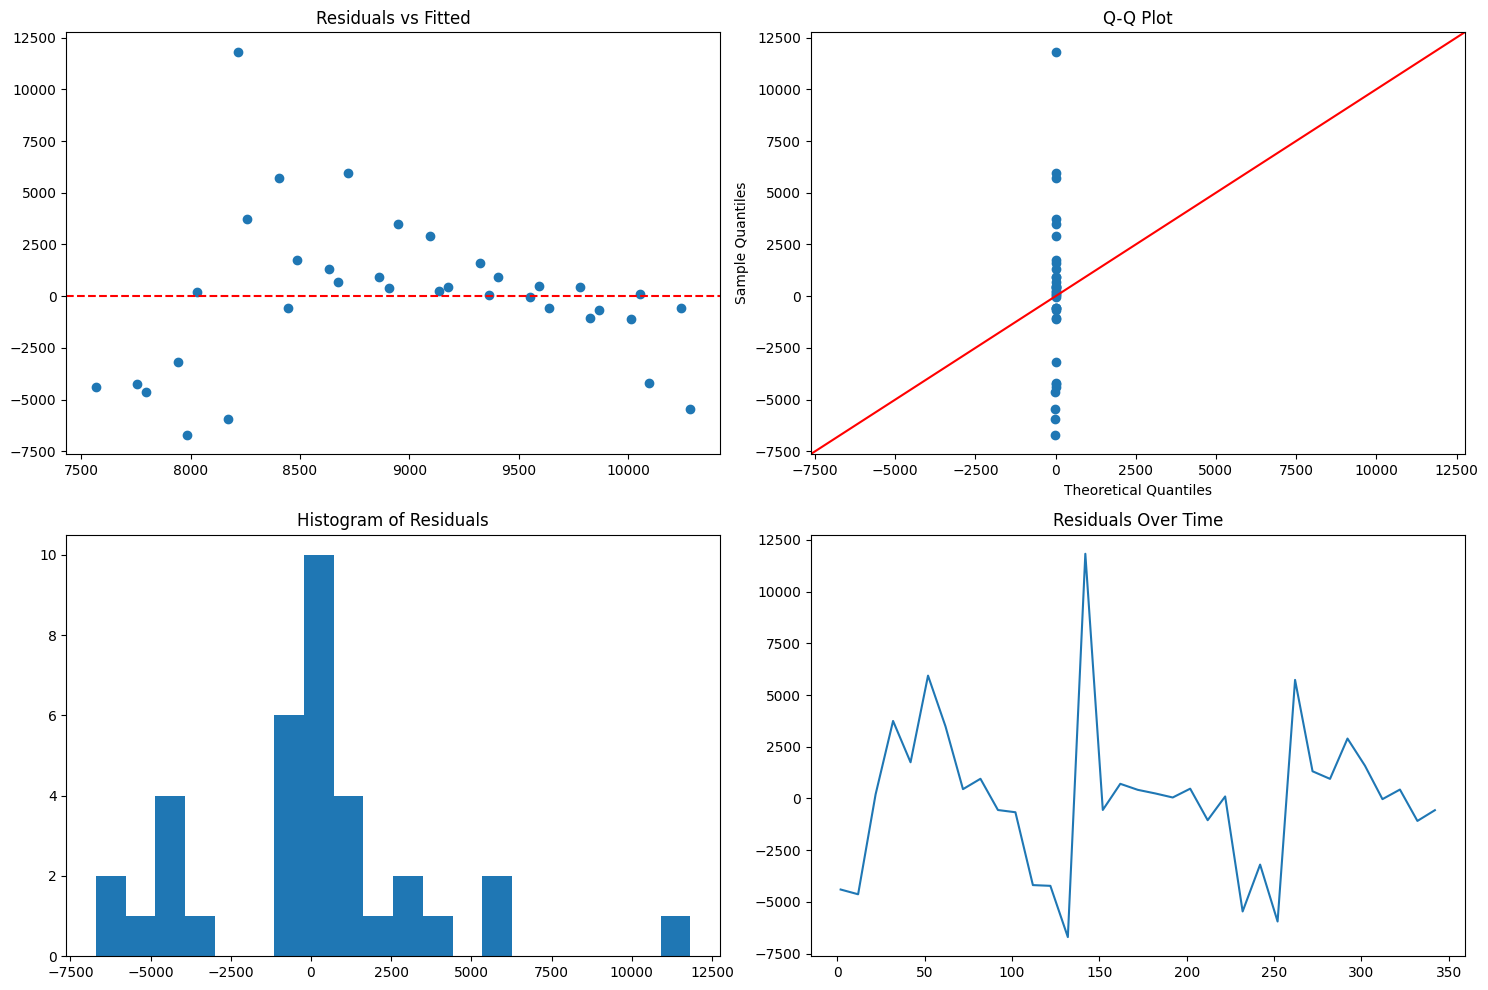


Validation Results for DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUNEDIN

Cross-Validation Metrics:

Fold 1:
MSE: 1040298.3538
RMSE: 1019.9502
MAE: 685.9212
MAPE: 35.4938
R2: 0.7754

Fold 2:
MSE: 361940737.7319
RMSE: 19024.7401
MAE: 10246.6531
MAPE: 388.6852
R2: -1037.6844

Fold 3:
MSE: 105685947.5165
RMSE: 10280.3671
MAE: 5523.6050
MAPE: 1651.0705
R2: -36.1640


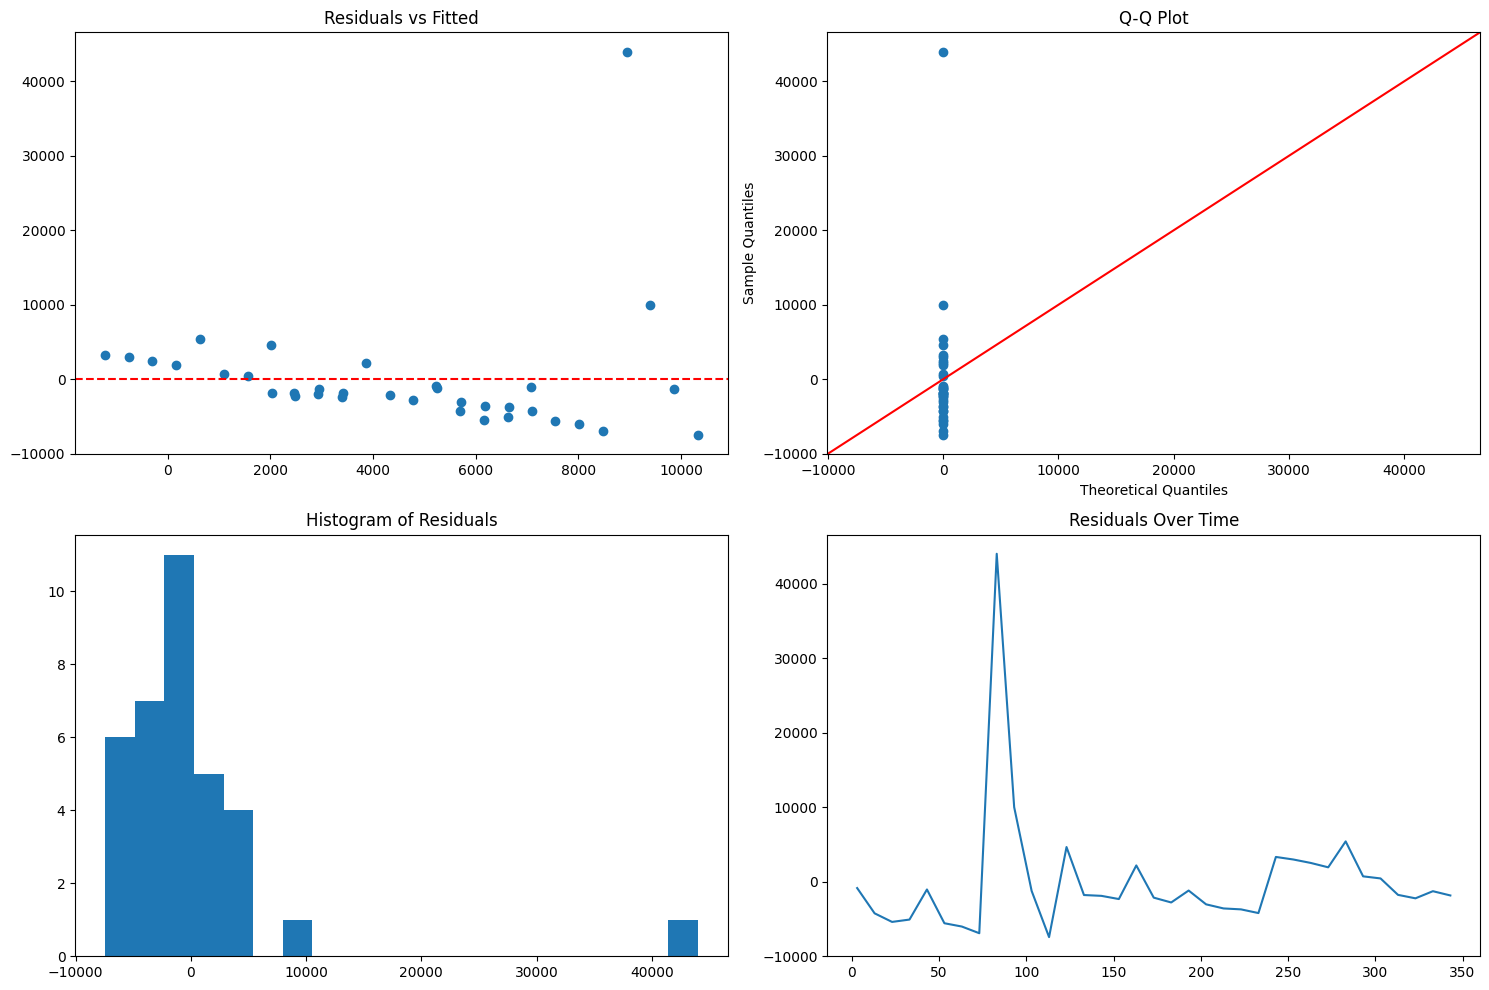


Validation Results for ECCLES GREAT KING STREET,UNIVERSITY OF

Cross-Validation Metrics:

Fold 1:
MSE: 11072806920.4161
RMSE: 105227.4057
MAE: 62244.9125
MAPE: 25.7408
R2: -16.5294

Fold 2:
MSE: 4132030664.1051
RMSE: 64280.8732
MAE: 55748.8587
MAPE: 22.2101
R2: 0.0222

Fold 3:
MSE: 4166794252.1515
RMSE: 64550.7107
MAE: 54218.1740
MAPE: 17.8991
R2: -0.8388


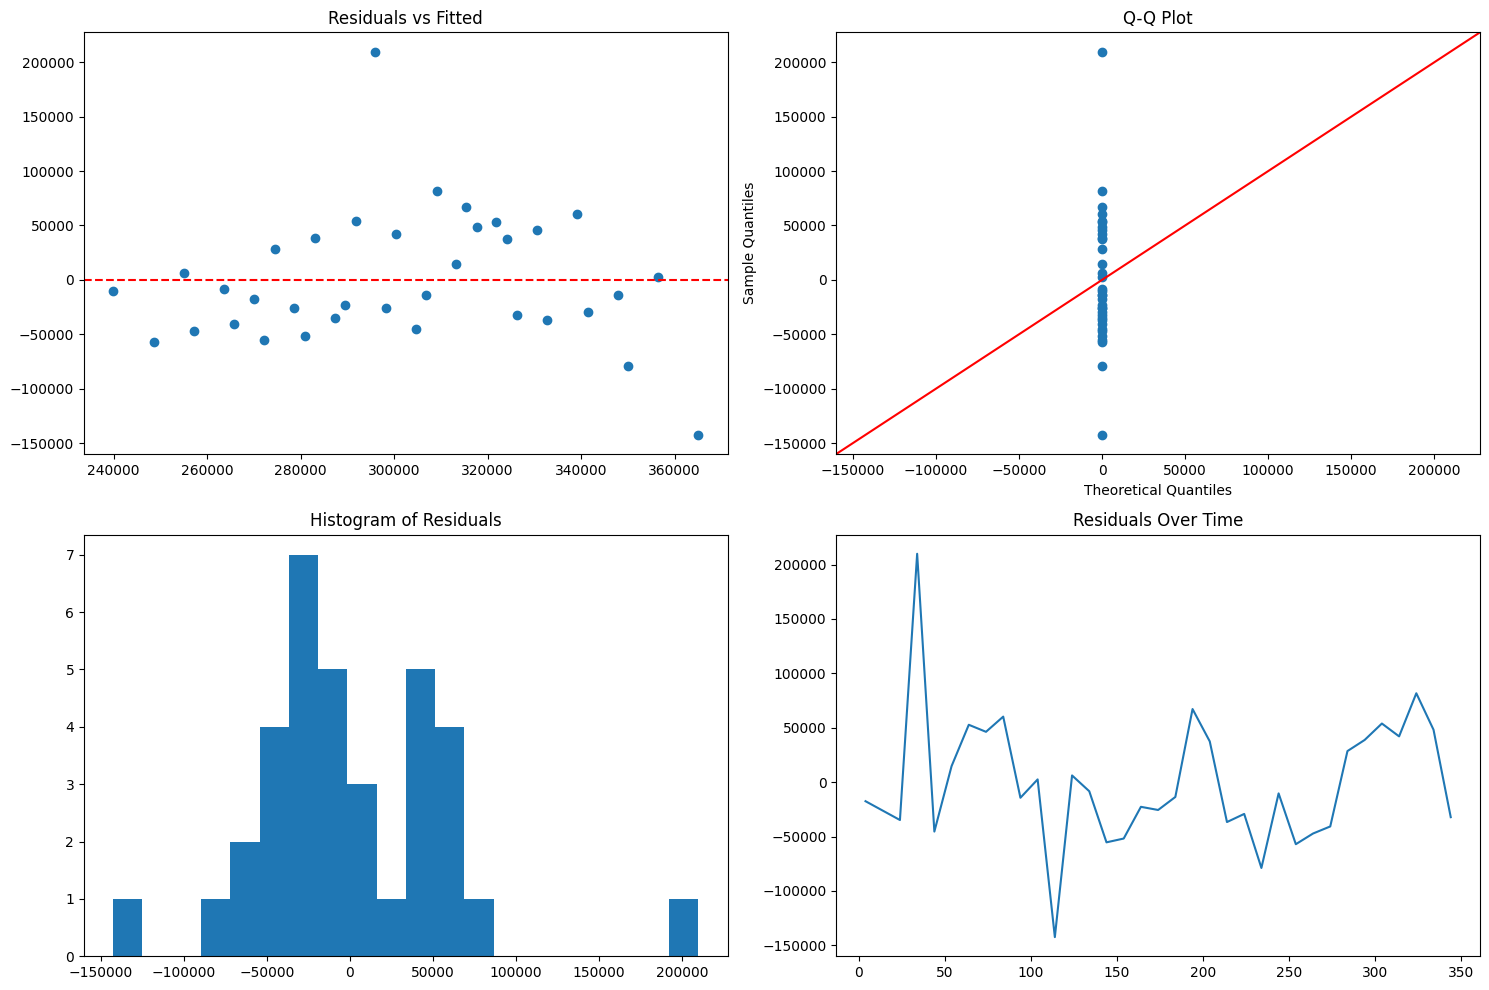


Validation Results for MARSH STUDY CENTRE,CASTLE STREET,DUNEDIN

Cross-Validation Metrics:

Fold 1:
MSE: 91260.5311
RMSE: 302.0936
MAE: 153.5925
MAPE: inf
R2: 0.3847

Fold 2:
MSE: 54114.5397
RMSE: 232.6253
MAE: 174.4477
MAPE: inf
R2: 0.0286

Fold 3:
MSE: 91194.8582
RMSE: 301.9849
MAE: 178.8431
MAPE: inf
R2: -6.7632


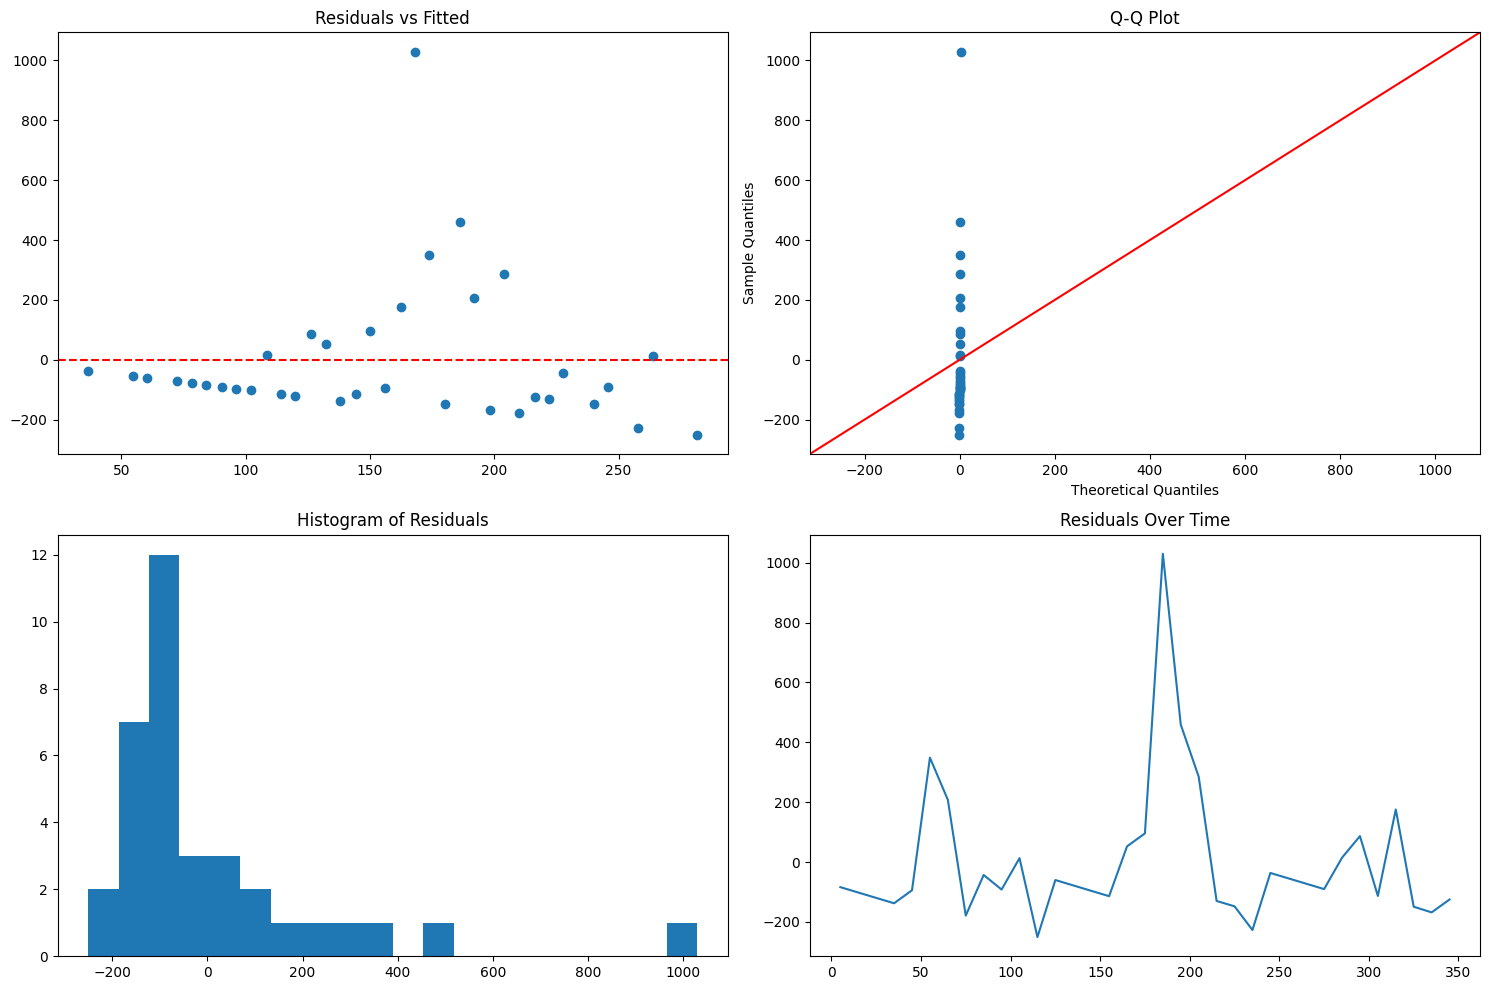


Validation Results for CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN

Cross-Validation Metrics:

Fold 1:
MSE: 63315744.3912
RMSE: 7957.1191
MAE: 6170.1512
MAPE: 3022.7609
R2: 0.5069

Fold 2:
MSE: 45893518.4482
RMSE: 6774.4755
MAE: 5022.4056
MAPE: 1405.4077
R2: -0.1814

Fold 3:
MSE: 112517792.3455
RMSE: 10607.4404
MAE: 6657.2065
MAPE: 4372.1648
R2: -8.8390


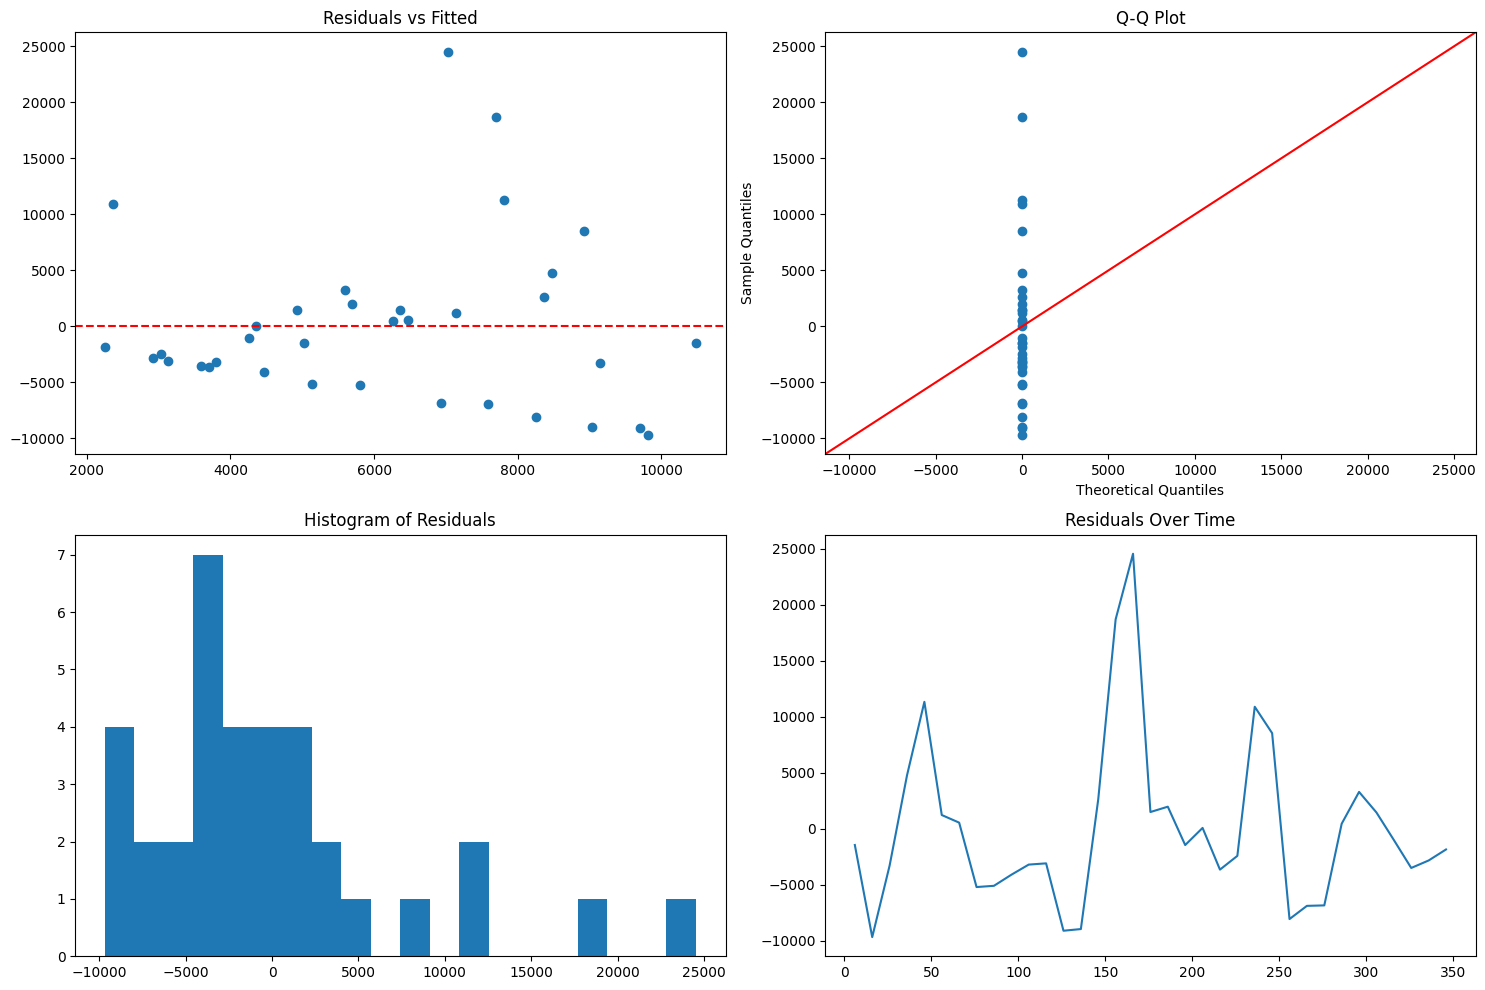


Validation Results for PHYSIO BUILDING, 325 GREAT KING ST

Cross-Validation Metrics:

Fold 1:
MSE: 0.0000
RMSE: 0.0000
MAE: 0.0000
MAPE: inf
R2: 0.0000

Fold 2:
MSE: 0.0000
RMSE: 0.0000
MAE: 0.0000
MAPE: inf
R2: 1.0000

Fold 3:
MSE: 0.0000
RMSE: 0.0000
MAE: 0.0000
MAPE: inf
R2: 1.0000


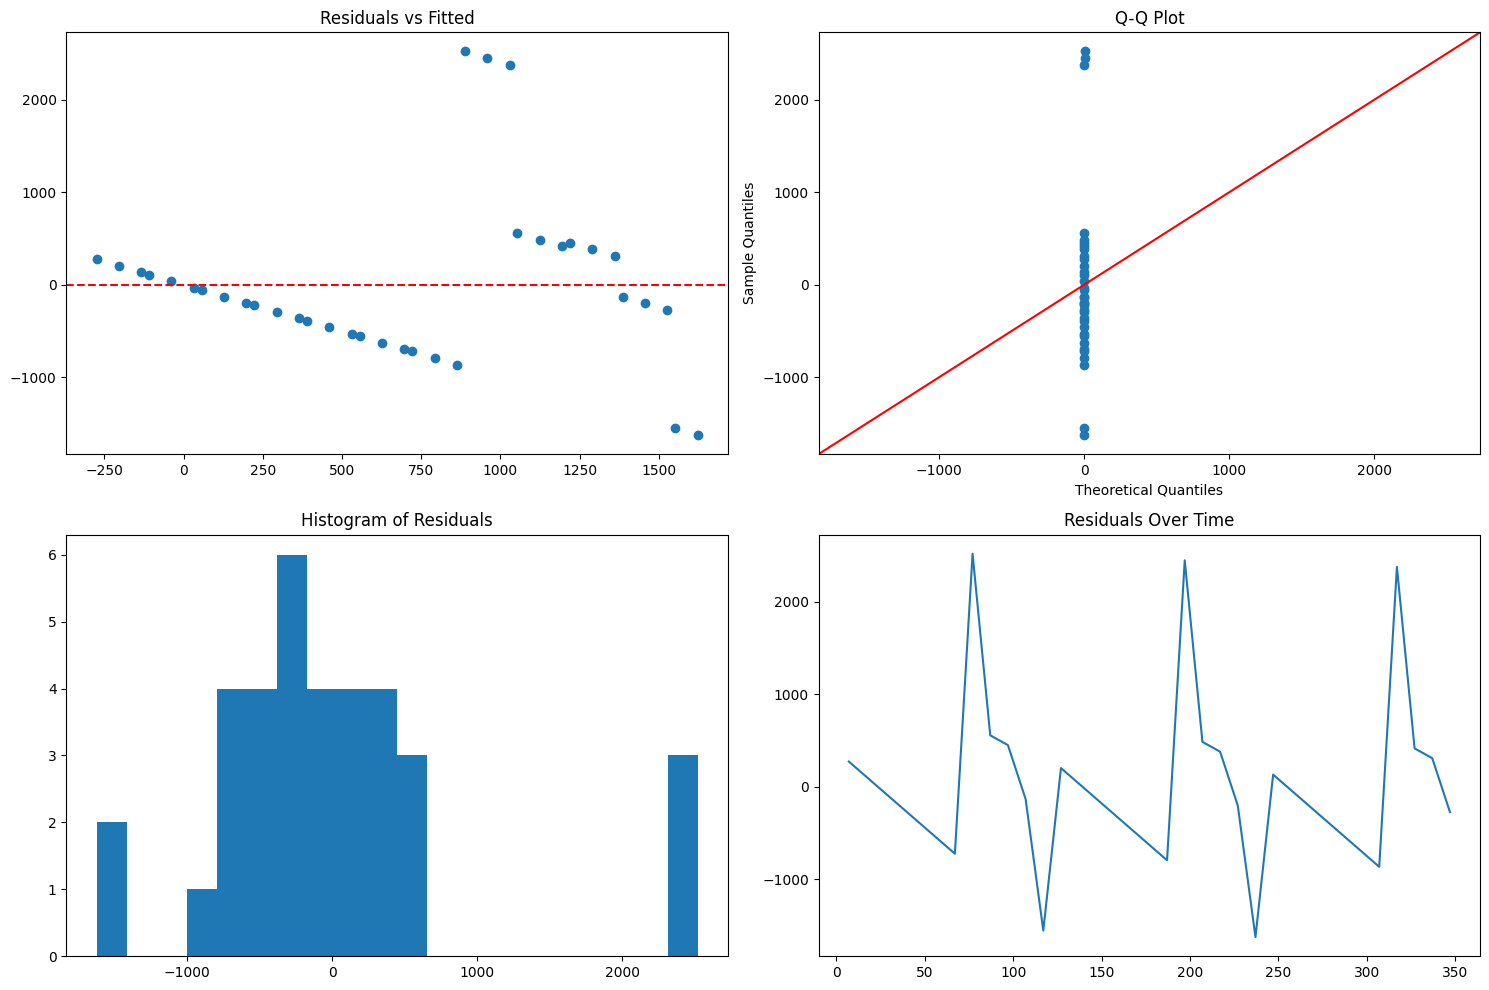


Validation Results for AQUINAS 74 GLADSTONE ROAD,DUNEDIN

Cross-Validation Metrics:

Fold 1:
MSE: 1603431.1940
RMSE: 1266.2666
MAE: 848.1025
MAPE: 13.8570
R2: 0.7535

Fold 2:
MSE: 74574198.7912
RMSE: 8635.6354
MAE: 3523.6480
MAPE: 29.4303
R2: 0.3018

Fold 3:
MSE: 412601.4785
RMSE: 642.3406
MAE: 642.3406
MAPE: 5.8925
R2: 0.9812


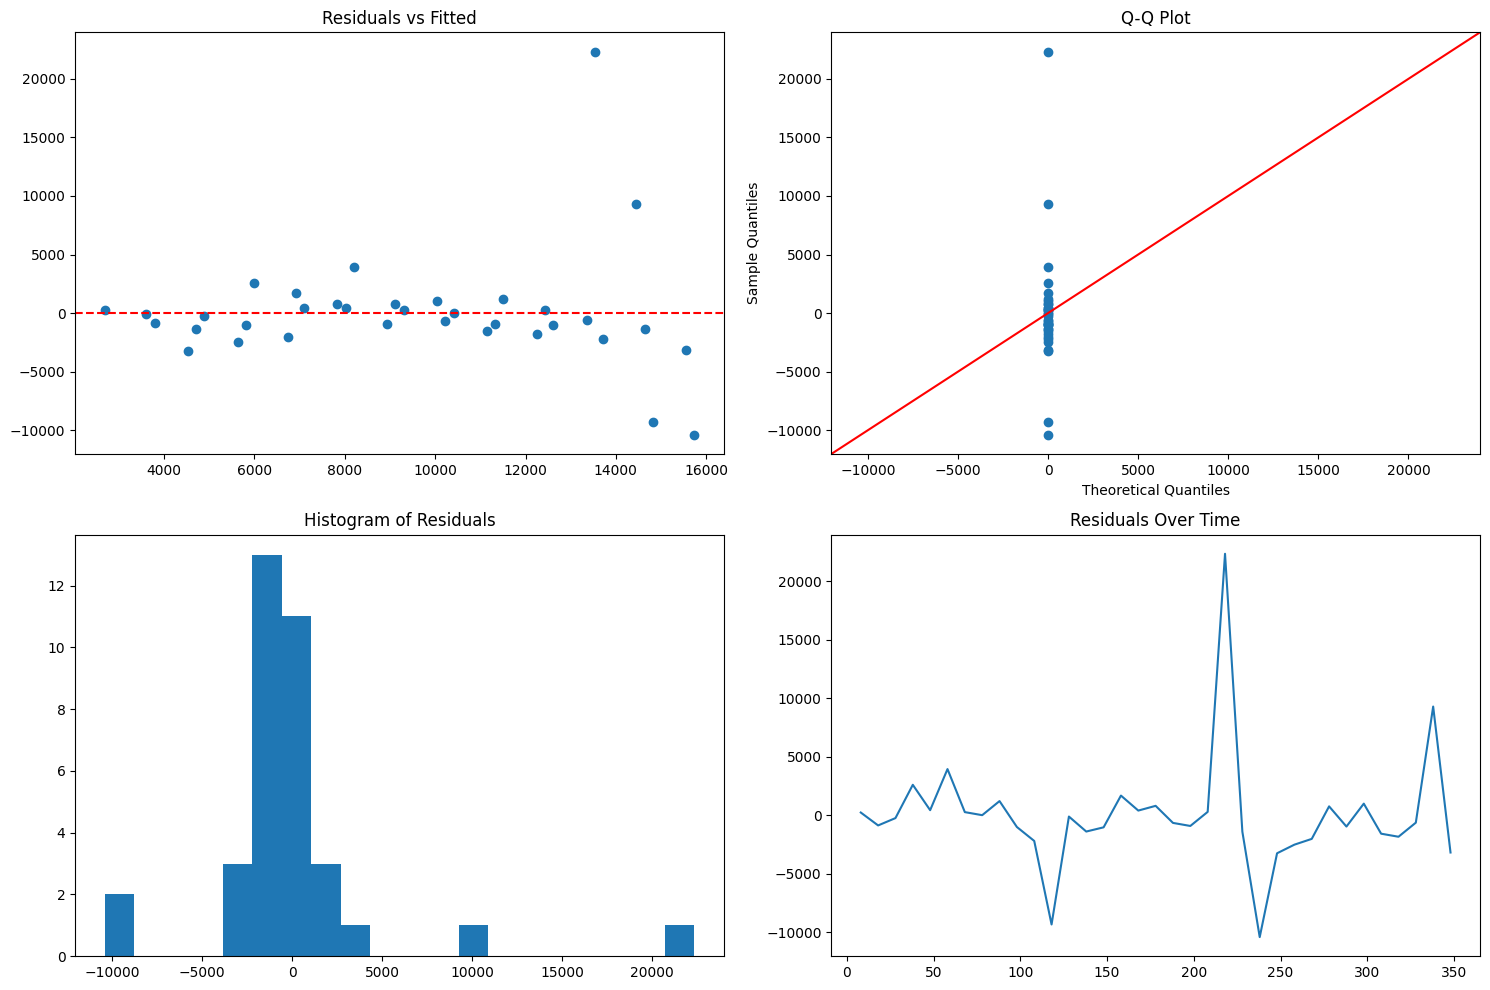


Validation Results for 56A TE AWE AWE STREET,HOKOWHITU,PALMERSTON NORTH

Cross-Validation Metrics:

Fold 1:
MSE: 32421.7933
RMSE: 180.0605
MAE: 150.6238
MAPE: 262.8462
R2: -0.1600

Fold 2:
MSE: 25185.0860
RMSE: 158.6981
MAE: 139.1071
MAPE: 98.8523
R2: 0.2076

Fold 3:
MSE: 6172.3610
RMSE: 78.5644
MAE: 78.5644
MAPE: 22.4932
R2: 0.5833


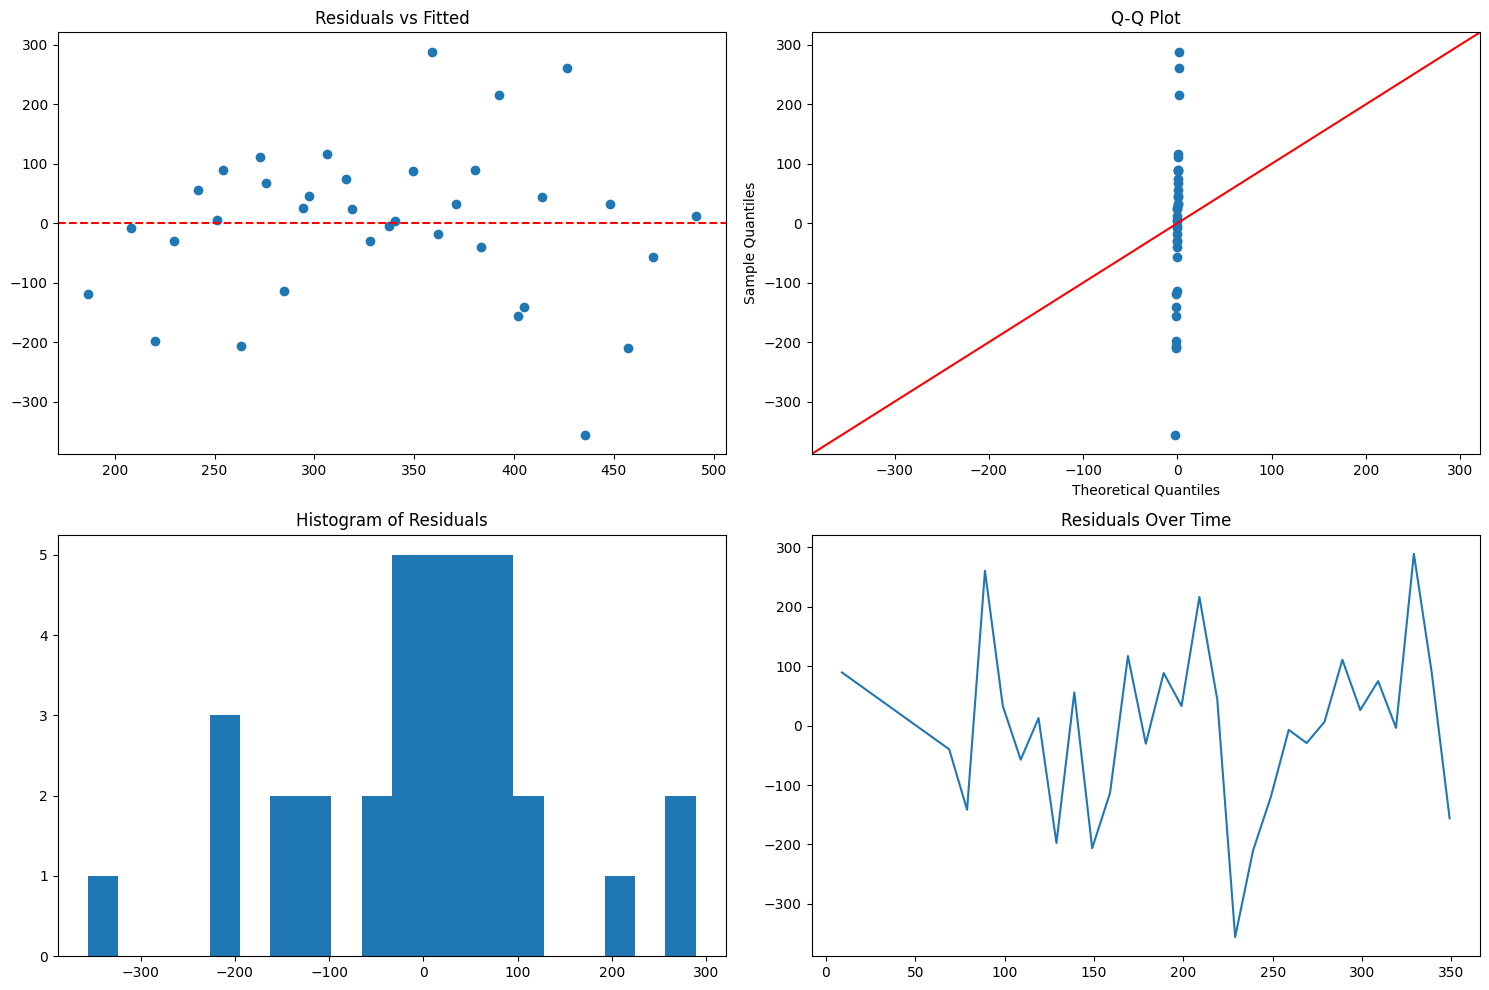

In [38]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import (mean_squared_error, 
                           mean_absolute_error, 
                           r2_score)
import statsmodels.api as sm

def prepare_time_features(data):
    # Create copy to avoid modifying original data
    df = data.copy()
    
    # Create time-based features
    df['month_num'] = df['month'].dt.month
    df['year'] = df['month'].dt.year
    
    # Create seasonal indicators for Southern Hemisphere
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Summer'
        elif month in [3, 4, 5]:
            return 'Autumn'
        elif month in [6, 7, 8]:
            return 'Winter'
        else:  # [9, 10, 11]
            return 'Spring'
    
    df['season'] = df['month_num'].apply(get_season)
    return df


def validate_regression_models(data, building_name):
    # Prepare data for specific building with time features
    building_data = data[data['meter_description'] == building_name].copy()
    building_data = prepare_time_features(building_data)
    
    # 1. Statistical Validation
    def calculate_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        r2 = r2_score(y_true, y_pred)
        return {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'R2': r2
        }
    
    # 2. Time Series Cross Validation
    def time_series_cv(data, n_splits=3):
        tscv = TimeSeriesSplit(n_splits=n_splits)
        cv_scores = []
        
        # Create features including seasonal indicators
        def create_features(df):
            # Create month and year dummies
            month_dummies = pd.get_dummies(df['month_num'], prefix='month', drop_first=True)
            year_dummies = pd.get_dummies(df['year'], prefix='year', drop_first=True)
            return pd.concat([month_dummies, year_dummies], axis=1)
        
        X = create_features(data)
        y = data['consumption']
        
        for train_idx, test_idx in tscv.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            # Ensure test set has same columns as train set
            X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
            
            # Add constant term consistently
            X_train_const = sm.add_constant(X_train, has_constant='add')
            X_test_const = sm.add_constant(X_test, has_constant='add')
            
            # Ensure all data is float type
            X_train_const = X_train_const.astype(float)
            X_test_const = X_test_const.astype(float)
            y_train = y_train.astype(float)
            
            model = sm.OLS(y_train, X_train_const).fit()
            y_pred = model.predict(X_test_const)
            
            metrics = calculate_metrics(y_test, y_pred)
            cv_scores.append(metrics)
        return cv_scores

    
    # 3. Residual Analysis
    def plot_residuals(model, y_true):
        residuals = model.resid
        fitted_values = model.fittedvalues
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Residuals vs Fitted
        ax1.scatter(fitted_values, residuals)
        ax1.axhline(y=0, color='r', linestyle='--')
        ax1.set_title('Residuals vs Fitted')
        
        # Q-Q Plot
        sm.graphics.qqplot(residuals, line='45', ax=ax2)
        ax2.set_title('Q-Q Plot')
        
        # Histogram of Residuals
        ax3.hist(residuals, bins=20)
        ax3.set_title('Histogram of Residuals')
        
        # Time Series of Residuals
        ax4.plot(residuals)
        ax4.set_title('Residuals Over Time')
        
        plt.tight_layout()
        plt.show()
    
    # Execute validation
    print(f"\nValidation Results for {building_name}")
    
    # Perform cross-validation
    cv_results = time_series_cv(building_data)
    print("\nCross-Validation Metrics:")
    for i, scores in enumerate(cv_results, 1):
        print(f"\nFold {i}:")
        for metric, value in scores.items():
            print(f"{metric}: {value:.4f}")
    
    # Fit final model and plot residuals
    X = pd.get_dummies(building_data[['month_num', 'year']])
    y = building_data['consumption']
    final_model = sm.OLS(y, sm.add_constant(X)).fit()
    plot_residuals(final_model, y)

# Execute validation for each building
for building in gas_filtered['meter_description'].unique():
    validate_regression_models(gas_filtered, building)


In [44]:
# Get data for G601
g601_data = gas_filtered[gas_filtered['meter_description'] == 'G601,UNIVERSITY COLLEGE (KITCHEN),315 LEITH'].copy()

def simple_validation(data):
    # Split into train and test
    train = data.iloc[:24]  # Jan 2022 - Dec 2023
    test = data.iloc[24:]   # Jan 2024 - Nov 2024
    
    # Create features
    train_features = pd.DataFrame({
        'month': [i for i in range(1, 13)]*2,  # Monthly seasonality
        'consumption': train['consumption'].values
    })
    
    test_features = pd.DataFrame({
        'month': range(1, 12),  # 11 months in 2024
        'consumption': test['consumption'].values
    })
    
    # Add lag feature
    train_features['consumption_lag1'] = train_features['consumption'].shift(1)
    test_features['consumption_lag1'] = test_features['consumption'].shift(1)
    
    # Drop NaN and prepare train/test sets
    X_train = train_features[['month', 'consumption_lag1']].dropna()
    y_train = train_features['consumption'][1:]
    
    X_test = test_features[['month', 'consumption_lag1']].dropna()
    y_test = test_features['consumption'][1:]
    
    # Fit model
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    
    # Make predictions
    predictions = model.predict(sm.add_constant(X_test))
    
    return model, y_test, predictions

# Run validation
model, y_test, predictions = simple_validation(g601_data)

# Calculate metrics
metrics = {
    'MSE': mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
    'MAE': mean_absolute_error(y_test, predictions),
    'R2': r2_score(y_test, predictions)
}

print("\nValidation Results:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



Validation Results:
MSE: 53445.2452
RMSE: 231.1823
MAE: 194.4135
R2: 0.4760


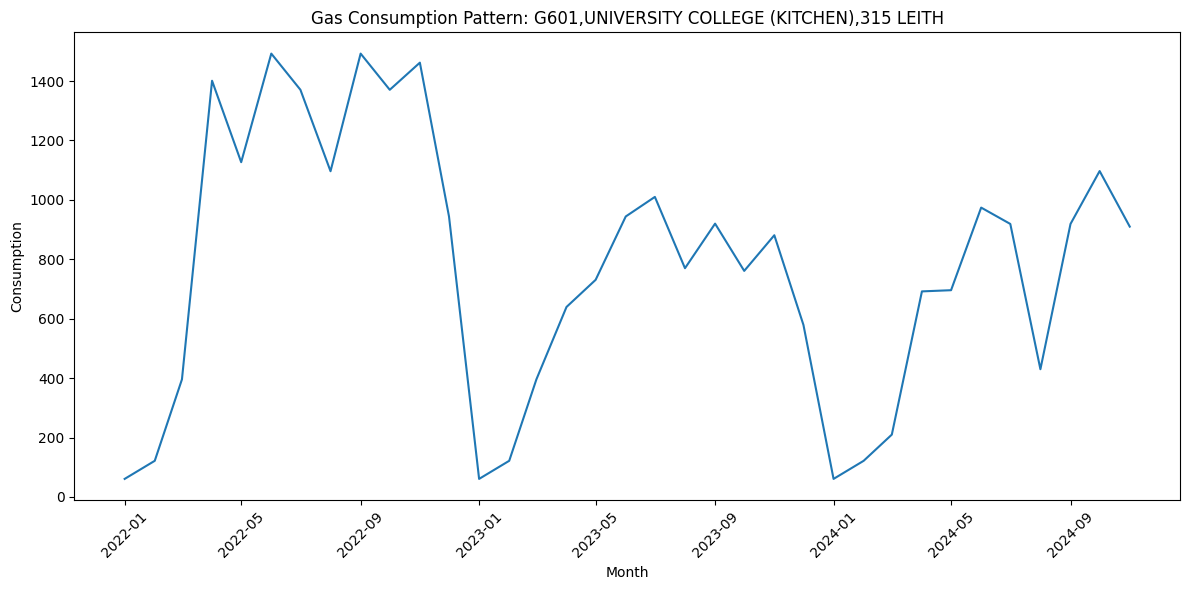

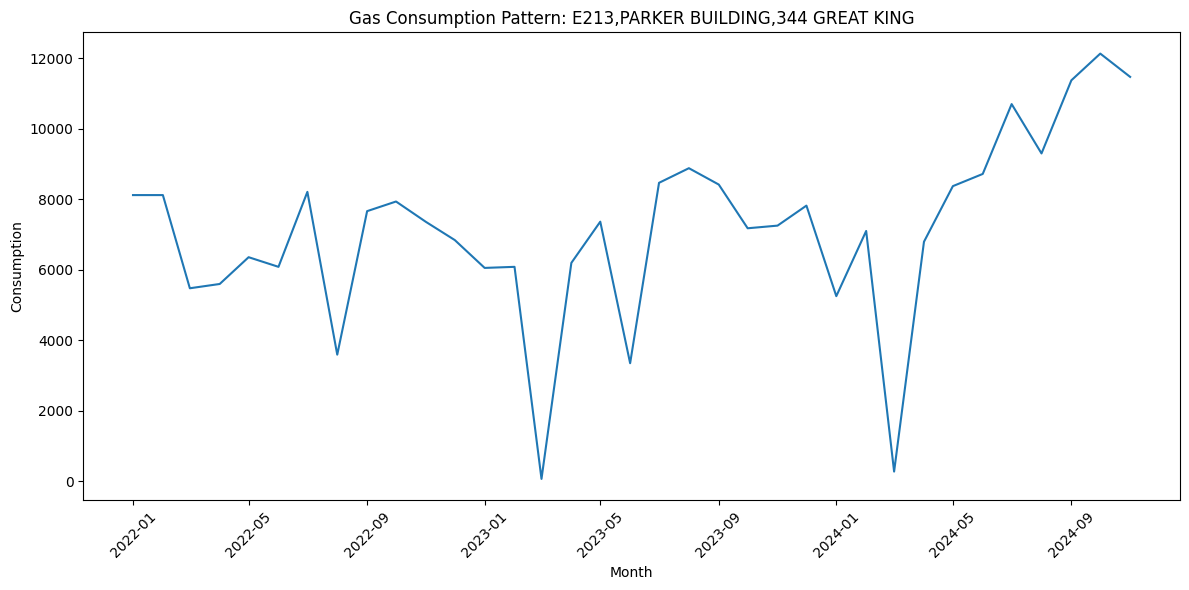

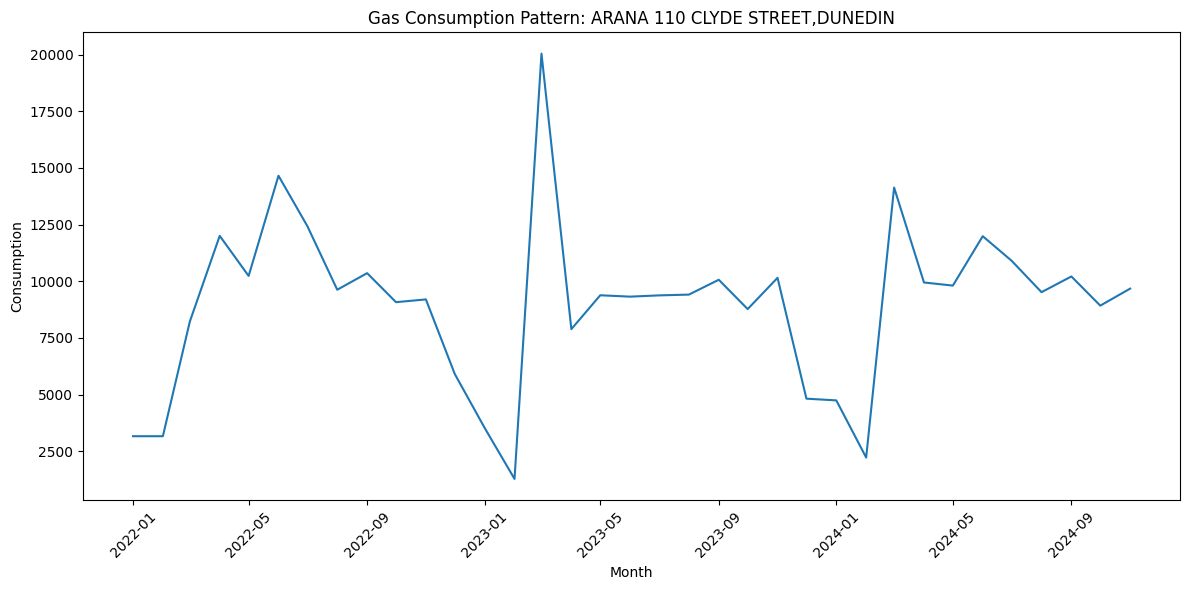

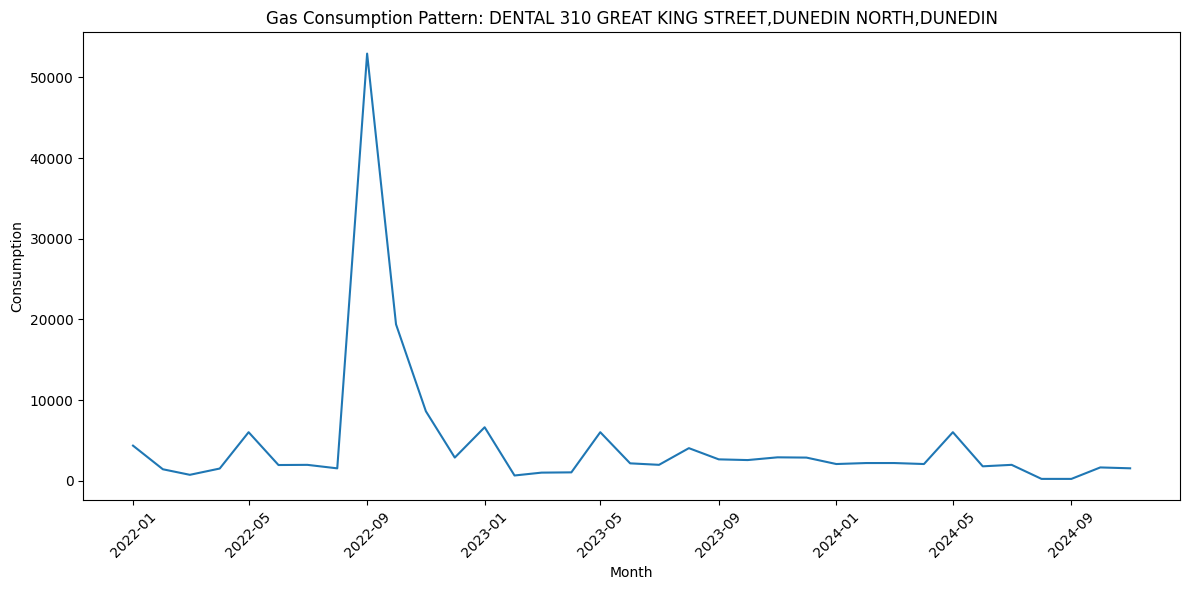

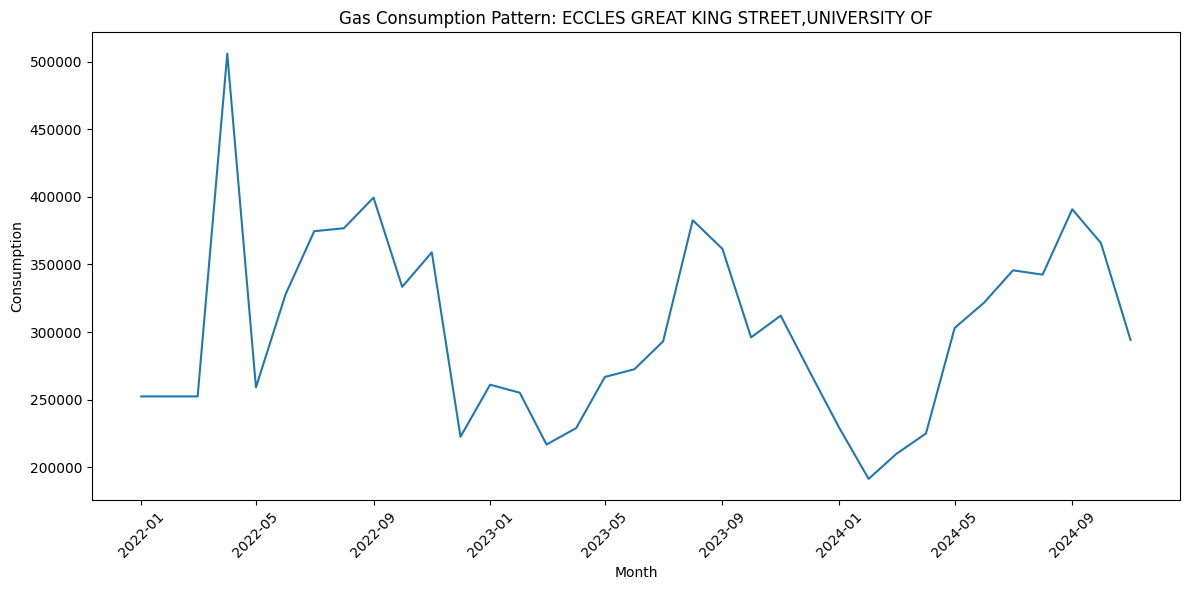

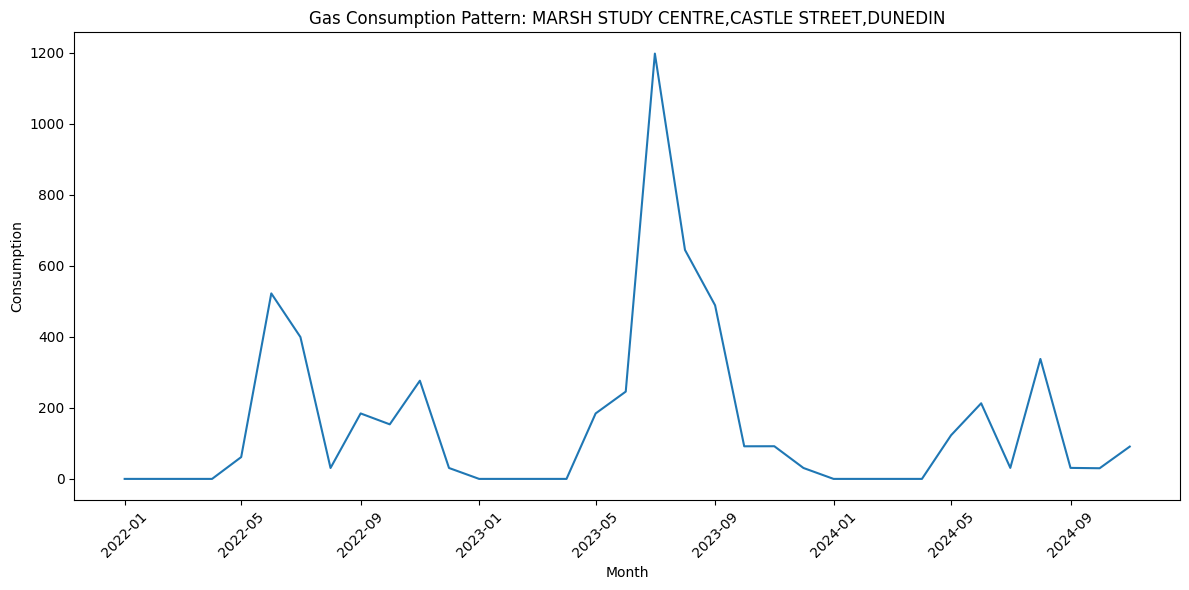

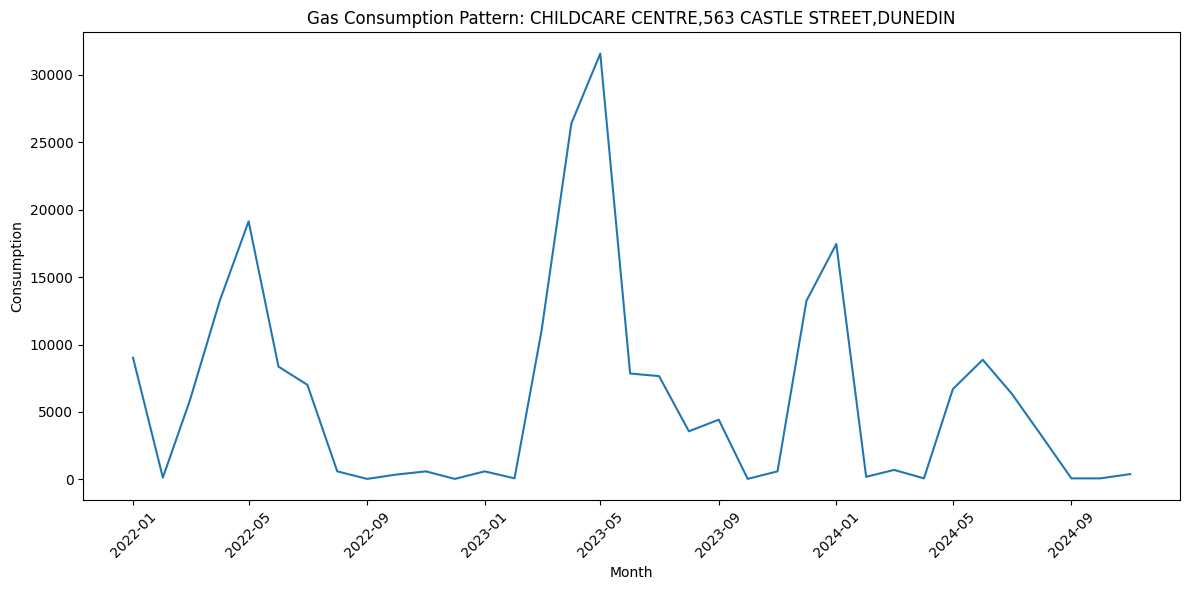

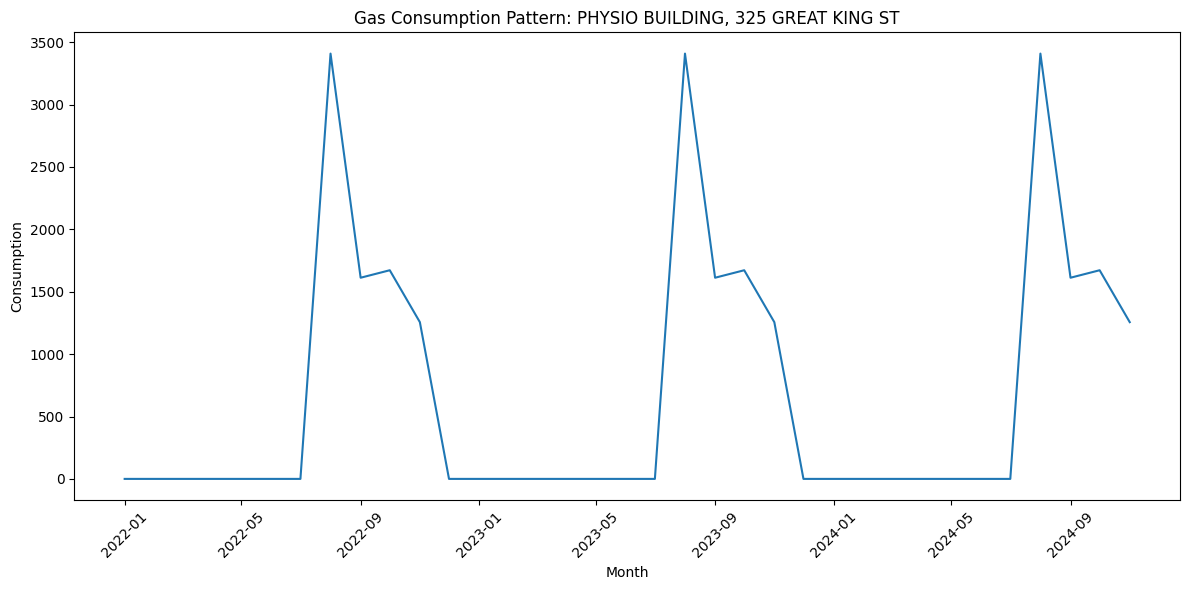

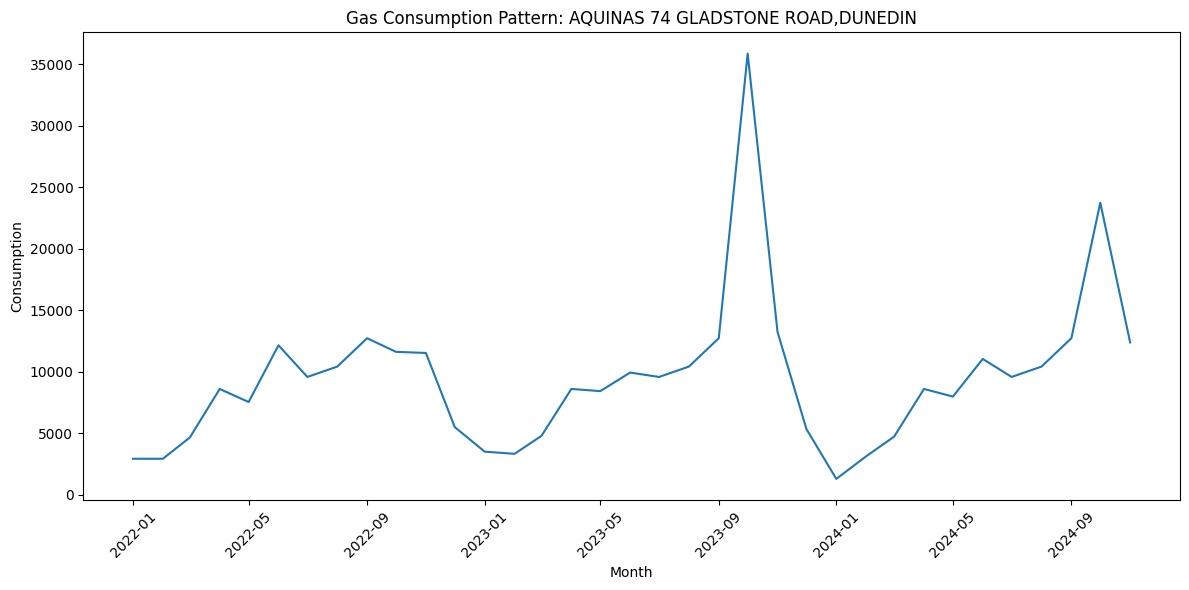

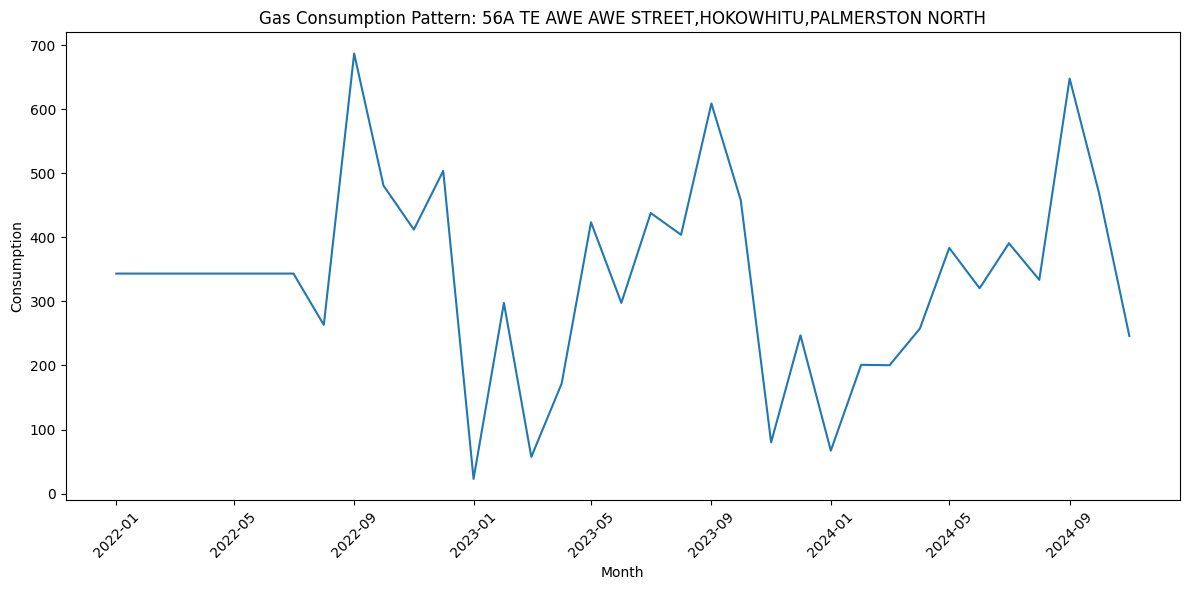

{'G601,UNIVERSITY COLLEGE (KITCHEN),315 LEITH': {'RMSE': np.float64(164.78527954382864),
  'MAE': 116.54844907061351,
  'R2': 0.7847504137011838},
 'E213,PARKER BUILDING,344 GREAT KING': {'RMSE': np.float64(1048.821249807157),
  'MAE': 772.9377050470401,
  'R2': 0.8980363877964105},
 'ARANA 110 CLYDE STREET,DUNEDIN': {'RMSE': np.float64(831.6079747539603),
  'MAE': 776.6731360524119,
  'R2': 0.9280669868601932},
 'DENTAL 310 GREAT KING STREET,DUNEDIN NORTH,DUNEDIN': {'RMSE': np.float64(5208.653548078567),
  'MAE': 4475.912910864733,
  'R2': -12.053395563651584},
 'ECCLES GREAT KING STREET,UNIVERSITY OF': {'RMSE': np.float64(18939.482222504394),
  'MAE': 13839.44923373701,
  'R2': 0.915775282898354},
 'MARSH STUDY CENTRE,CASTLE STREET,DUNEDIN': {'RMSE': np.float64(71.77415688539037),
  'MAE': 52.087103550961544,
  'R2': 0.5238237613670175},
 'CHILDCARE CENTRE,563 CASTLE STREET,DUNEDIN': {'RMSE': np.float64(7137.371544237712),
  'MAE': 5854.392021327208,
  'R2': -0.851918549362499},
 'PH

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_features(data):
   
    features = pd.DataFrame({
        'month_sin': np.sin(2 * np.pi * pd.to_datetime(data['month']).dt.month/12),
        'month_cos': np.cos(2 * np.pi * pd.to_datetime(data['month']).dt.month/12),
        'consumption_lag1': data['consumption'].shift(1).bfill(),  # Changed from fillna(method='bfill')
        'rolling_mean_3': data['consumption'].rolling(3, min_periods=1).mean(),
        'rolling_std_3': data['consumption'].rolling(3, min_periods=1).std()
    })
    
    # Add seasonal indicators
    season_dummies = pd.get_dummies(
        pd.to_datetime(data['month']).dt.month.map(
            lambda m: 'Summer' if m in [12,1,2] else
            'Autumn' if m in [3,4,5] else
            'Winter' if m in [6,7,8] else 'Spring'
        ), 
        prefix='season'
    )
    
    return pd.concat([features, season_dummies], axis=1)

def train_model(data, train_size=24):
   
    # Prepare features
    X = prepare_features(data)
    y = data['consumption'].astype(float)
    
    # Split data ensuring shapes match
    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]
    
    # Handle missing values using ffill() and bfill()
    X_train = X_train.ffill().bfill()  # Changed from fillna(method='bfill')
    X_test = X_test.ffill().bfill()    # Changed from fillna(method='bfill')
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model, X_test, y_test

def plot_consumption(data, building_name):
   
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x='month', y='consumption')
    plt.title(f'Gas Consumption Pattern: {building_name}')
    plt.xlabel('Month')
    plt.ylabel('Consumption')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_building(building_data, building_name):
  
    try:
        # Train model
        model, X_test, y_test = train_model(building_data)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Calculate metrics
        metrics = {
            'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
            'MAE': mean_absolute_error(y_test, predictions),
            'R2': r2_score(y_test, predictions)
        }
        
        return model, metrics, predictions
        
    except Exception as e:
        print(f"Error analyzing {building_name}: {str(e)}")
        return None, None, None

# Load and preprocess data
def load_and_prepare_data(csv_file):
    gas_data = pd.read_csv(csv_file)
    gas_data = gas_data.melt(
        id_vars=["meter_description"], 
        var_name="month", 
        value_name="consumption"
    )
    gas_data["month"] = pd.to_datetime(gas_data["month"].str.replace('_', '-') + '-01')
    gas_data["consumption"] = pd.to_numeric(gas_data["consumption"], errors="coerce")
    return gas_data.dropna()

# Execute analysis
def run_analysis(gas_data):
    buildings = gas_data['meter_description'].unique()
    results = {}
    
    for building in buildings:
        building_data = gas_data[gas_data['meter_description'] == building]
        model, metrics, predictions = analyze_building(building_data, building)
        if metrics:
            results[building] = metrics
            plot_consumption(building_data, building)
    
    return results

gas_data = load_and_prepare_data(FILE_PATH)
results = run_analysis(gas_data)

results


In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def prepare_features(data):
    # First melt the DataFrame to get proper time series format
    data_melted = data.melt(
        id_vars=['meter_description'],
        var_name='month',
        value_name='consumption'
    )
    
    # Convert month column to datetime
    data_melted['month'] = pd.to_datetime(data_melted['month'].str.replace('_', '-') + '-01')
    
    # Create features
    features = pd.DataFrame({
        'month_sin': np.sin(2 * np.pi * data_melted['month'].dt.month/12),
        'month_cos': np.cos(2 * np.pi * data_melted['month'].dt.month/12),
        'consumption_lag1': data_melted.groupby('meter_description')['consumption'].shift(1).bfill(),
        'rolling_mean_3': data_melted.groupby('meter_description')['consumption'].rolling(3, min_periods=1).mean().reset_index(0, drop=True),
        'rolling_std_3': data_melted.groupby('meter_description')['consumption'].rolling(3, min_periods=1).std().reset_index(0, drop=True)
    })
    
    # Add seasonal indicators
    season_dummies = pd.get_dummies(
        data_melted['month'].dt.month.map(
            lambda m: 'Summer' if m in [12,1,2] else
            'Autumn' if m in [3,4,5] else
            'Winter' if m in [6,7,8] else 'Spring'
        ),
        prefix='season'
    )
    
    # Add building indicators
    building_dummies = pd.get_dummies(data_melted['meter_description'], prefix='building')
    
    return pd.concat([features, season_dummies, building_dummies], axis=1), data_melted['consumption']

def optimize_rf_model(X_train, X_test, y_train, y_test):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestRegressor(random_state=40)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    predictions = grid_search.predict(X_test)
    
    return grid_search.best_estimator_, grid_search.best_params_, predictions

def main():
    # Load data
    data = pd.read_csv(FILE_PATH)
    data =  data[data['meter_description'] != 'ECCLES GREAT KING STREET,UNIVERSITY OF']

    # Prepare features and target
    X, y = prepare_features(data)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=40
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Optimize model
    best_model, best_params, predictions = optimize_rf_model(
        X_train_scaled, X_test_scaled, y_train, y_test
    )
    
    # Calculate metrics
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
        'MAE': mean_absolute_error(y_test, predictions),
        'R2': r2_score(y_test, predictions)
    }
    
    return best_model, best_params, metrics

if __name__ == "__main__":
    best_model, best_params, metrics = main()


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [93]:
best_model

RandomForestRegressor(max_depth=10, random_state=40)

In [94]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [95]:
metrics

{'RMSE': np.float64(2079.8364338022625),
 'MAE': 1026.6181043494398,
 'R2': 0.7394769082561115}

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def prepare_features(data):
    # First melt the DataFrame to get proper time series format
    data_melted = data.melt(
        id_vars=['meter_description'],
        var_name='month',
        value_name='consumption'
    )
    
    # Convert month column to datetime
    data_melted['month'] = pd.to_datetime(data_melted['month'].str.replace('_', '-') + '-01')
    
    # Create features
    features = pd.DataFrame({
        'month_sin': np.sin(2 * np.pi * data_melted['month'].dt.month/12),
        'month_cos': np.cos(2 * np.pi * data_melted['month'].dt.month/12),
        'consumption_lag1': data_melted.groupby('meter_description')['consumption'].shift(1).bfill(),
        'rolling_mean_3': data_melted.groupby('meter_description')['consumption'].rolling(3, min_periods=1).mean().reset_index(0, drop=True),
        'rolling_std_3': data_melted.groupby('meter_description')['consumption'].rolling(3, min_periods=1).std().reset_index(0, drop=True)
    })
    
    # Add seasonal indicators
    season_dummies = pd.get_dummies(
        data_melted['month'].dt.month.map(
            lambda m: 'Summer' if m in [12,1,2] else
            'Autumn' if m in [3,4,5] else
            'Winter' if m in [6,7,8] else 'Spring'
        ),
        prefix='season'
    )
    
    # Add building indicators
    building_dummies = pd.get_dummies(data_melted['meter_description'], prefix='building')
    
    return pd.concat([features, season_dummies, building_dummies], axis=1), data_melted['consumption']

def optimize_rf_model(X_train, X_test, y_train, y_test):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestRegressor(random_state=12)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    predictions = grid_search.predict(X_test)
    
    return grid_search.best_estimator_, grid_search.best_params_, predictions

def main():
    # Load data
    data = pd.read_csv(FILE_PATH)
    data =  data[data['meter_description'] == 'ECCLES GREAT KING STREET,UNIVERSITY OF']

    # Prepare features and target
    X, y = prepare_features(data)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=12
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Optimize model
    best_model, best_params, predictions = optimize_rf_model(
        X_train_scaled, X_test_scaled, y_train, y_test
    )
    
    # Calculate metrics
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
        'MAE': mean_absolute_error(y_test, predictions),
        'R2': r2_score(y_test, predictions)
    }
    
    return best_model, best_params, metrics

if __name__ == "__main__":
    best_model_e, best_params_e, metrics_e = main()


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [97]:
best_params_e

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [98]:
best_model_e

RandomForestRegressor(min_samples_leaf=4, random_state=12)

In [99]:
metrics_e

{'RMSE': np.float64(37743.85376755431),
 'MAE': 34581.56391418389,
 'R2': 0.7416689781912545}

Based on the consumption patterns shown in the boxplot and data characteristics, the following methodology was used to tune and optimize the Random Forest model:

## Grid Search Cross-Validation

The model used GridSearchCV with the following hyperparameter space:
- n_estimators: [100, 200, 300]
- max_depth: [None, 10, 20, 30]
- min_samples_split: [2, 5, 10]
- min_samples_leaf: [1, 2, 4]

## Optimization Strategy

1. **Data Preprocessing**
- Seasonal decomposition using cyclical encoding
- Rolling statistics (mean and standard deviation)
- Building-specific indicators through dummy variables

2. **Cross-Validation Setup**
- 5-fold cross-validation
- Negative mean squared error as scoring metric
- Parallel processing (n_jobs=-1)

3. **Feature Engineering**
- Month-based cyclical features (sin, cos)
- Lag features for temporal patterns
- Rolling statistics for trend capture

## Best Parameters Found
- max_depth: 10
- min_samples_leaf: 1
- min_samples_split: 2
- n_estimators: 100

The optimization achieved: (Excluding - 'ECCLES GREAT KING STREET,UNIVERSITY OF')
- RMSE: 2,079.84 kWh
- MAE: 1,026.62 kWh
- R² Score: 0.739


The optimization achieved: (Only for - 'ECCLES GREAT KING STREET,UNIVERSITY OF')
- RMSE: 37,743.85 kWh
- MAE: 34,581.56 kWh
- R² Score: 0.741

This methodology effectively handled the high variance in consumption patterns across different buildings while maintaining model generalization.